# Dataset and Domain

##### Data Dictionary

In [1]:
#important libraries
#importing the necessary packages
import pandas as pd
import string
#import plotly.express as px
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.style

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.feature_selection import RFE
from scipy.stats import zscore
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,log_loss,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator


warnings.filterwarnings(action="ignore")
%matplotlib inline

## Read the dataset

In [2]:
patient_records=pd.read_csv('Dataset.csv')
patient_records.head(10)

encounter_id  patient_id  hospital_id   age    bmi  elective_surgery  \
0         66154       25312          118  68.0  22.73                 0   
1        114252       59342           81  77.0  27.42                 0   
2        119783       50777          118  25.0  31.95                 0   
3         79267       46918          118  81.0  22.64                 1   
4         92056       34377           33  19.0    NaN                 0   
5         33181       74489           83  67.0  27.56                 0   
6         82208       49526           83  59.0  57.45                 0   
7        120995       50129           33  70.0    NaN                 0   
8         80471       10577          118  45.0    NaN                 0   
9         42871       90749          118  50.0  25.71                 0   

   ethnicity gender  height hospital_admit_source  ... cirrhosis  \
0  Caucasian      M   180.3                 Floor  ...       0.0   
1  Caucasian      F   160.0                 Floor  ...       0.0   
2  Caucasian      F   172.7  Emergency Department  ...       0.0   
3  Caucasian      F   165.1        Operating Room  ...       0.0   
4  Caucasian      M   188.0                   NaN  ...       0.0   
5  Caucasian      M   190.5          Direct Admit  ...       0.0   
6  Caucasian      F   165.1        Operating Room  ...       0.0   
7  Caucasian      M   165.0  Emergency Department  ...       0.0   
8  Caucasian      M   170.2        Other Hospital  ...       0.0   
9        NaN      M   175.3          Direct Admit  ...       0.0   

   diabetes_mellitus hepatic_failure immunosuppression  leukemia  lymphoma  \
0                1.0             0.0               0.0       0.0       0.0   
1                1.0             0.0               0.0       0.0       0.0   
2                0.0             0.0               0.0       0.0       0.0   
3                0.0             0.0               0.0       0.0       0.0   
4                0.0             0.0               0.0       0.0       0.0   
5                1.0             0.0               0.0       0.0       0.0   
6                1.0             0.0               0.0       0.0       0.0   
7                0.0             0.0               1.0       0.0       0.0   
8                0.0             0.0               0.0       0.0       0.0   
9                0.0             0.0               0.0       0.0       0.0   

   solid_tumor_with_metastasis  apache_3j_bodysystem  apache_2_bodysystem  \
0                          0.0                Sepsis       Cardiovascular   
1                          0.0           Respiratory          Respiratory   
2                          0.0             Metabolic            Metabolic   
3                          0.0        Cardiovascular       Cardiovascular   
4                          0.0                Trauma               Trauma   
5                          0.0          Neurological           Neurologic   
6                          0.0           Respiratory          Respiratory   
7                          0.0                Sepsis       Cardiovascular   
8                          0.0        Cardiovascular       Cardiovascular   
9                          0.0        Cardiovascular       Cardiovascular   

   hospital_death  
0               0  
1               0  
2               0  
3               0  
4               0  
5               0  
6               0  
7               0  
8               1  
9               0  

[10 rows x 186 columns]

### Now look at the Dataset Descriptions below:-

In [3]:
Description=pd.read_csv('Data Dictionary.csv')
Description.head(10)

Category     Variable Name     Unit of Measure Data Type  \
0   identifier      encounter_id                None   integer   
1   identifier       hospital_id                None   integer   
2   identifier        patient_id                None   integer   
3  demographic    hospital_death                None    binary   
4  demographic               age               Years   numeric   
5  demographic               bmi  kilograms/metres^2    string   
6  demographic  elective_surgery                None    binary   
7  demographic         ethnicity                None    string   
8  demographic            gender                None    string   
9  demographic            height         centimetres   numeric   

                                         Description    Example  
0  Unique identifier associated with a patient un...       None  
1       Unique identifier associated with a hospital       None  
2        Unique identifier associated with a patient       None  
3  Whether the patient died during this hospitali...          0  
4           The age of the patient on unit admission       None  
5  The body mass index of the person on unit admi...       21.5  
6  Whether the patient was admitted to the hospit...          0  
7  The common national or cultural tradition whic...  Caucasian  
8                 The genotypical sex of the patient          F  
9         The height of the person on unit admission        180

### output variable (desired target):
 hospital_death- patient's survival outcomes lets take 0 as survive and 1 as not surive

## Let's get into Dataset

In [4]:
#checking the shape of the dataset
patient_records.shape

(91713, 186)

Note: We have 91713 records in our dataset with 186 features


In [5]:
#Exact all the column from dataset
patient_records.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height',
       'hospital_admit_source',
       ...
       'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem', 'hospital_death'],
      dtype='object', length=186)

## Variable Categorization

In [6]:
#let's get in to the data information with datatypes
patient_records.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 186 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   hospital_admit_source          70304 non-null  object 
 10  icu_admit_source               91601 non-null  object 
 11  icu_id                         91713 non-null  int64  
 12  icu_stay_type                  91713 non-null

In [7]:
#Let us check out the individual data types
patient_records.dtypes

encounter_id                     int64
patient_id                       int64
hospital_id                      int64
age                            float64
bmi                            float64
                                ...   
lymphoma                       float64
solid_tumor_with_metastasis    float64
apache_3j_bodysystem            object
apache_2_bodysystem             object
hospital_death                   int64
Length: 186, dtype: object

### lets check for the different data type
binary_variable

In [8]:
binary_variables = [
    "hospital_death", 
    "elective_surgery", 
    "readmission_status", 
    "apache_post_operative", 
    "arf_apache", 
    "gcs_unable_apache", 
    "intubated_apache", 
    "ventilated_apache", 
    "aids", 
    "cirrhosis", 
    "diabetes_mellitus", 
    "hepatic_failure", 
    "immunosuppression", 
    "leukemia", 
    "lymphoma", 
    "solid_tumor_with_metastasis"
]

In [9]:
patient_records[binary_variables].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hospital_death               91713 non-null  int64  
 1   elective_surgery             91713 non-null  int64  
 2   readmission_status           91713 non-null  int64  
 3   apache_post_operative        91713 non-null  int64  
 4   arf_apache                   90998 non-null  float64
 5   gcs_unable_apache            90676 non-null  float64
 6   intubated_apache             90998 non-null  float64
 7   ventilated_apache            90998 non-null  float64
 8   aids                         90998 non-null  float64
 9   cirrhosis                    90998 non-null  float64
 10  diabetes_mellitus            90998 non-null  float64
 11  hepatic_failure              90998 non-null  float64
 12  immunosuppression            90998 non-null  float64
 13  leukemia        

In [10]:
patient_records[binary_variables].nunique()

hospital_death                 2
elective_surgery               2
readmission_status             1
apache_post_operative          2
arf_apache                     2
gcs_unable_apache              2
intubated_apache               2
ventilated_apache              2
aids                           2
cirrhosis                      2
diabetes_mellitus              2
hepatic_failure                2
immunosuppression              2
leukemia                       2
lymphoma                       2
solid_tumor_with_metastasis    2
dtype: int64

#### Now look for the missing values

In [11]:
patient_records[binary_variables].isnull().sum() * 100 / patient_records[binary_variables].shape[0]

hospital_death                 0.000000
elective_surgery               0.000000
readmission_status             0.000000
apache_post_operative          0.000000
arf_apache                     0.779606
gcs_unable_apache              1.130701
intubated_apache               0.779606
ventilated_apache              0.779606
aids                           0.779606
cirrhosis                      0.779606
diabetes_mellitus              0.779606
hepatic_failure                0.779606
immunosuppression              0.779606
leukemia                       0.779606
lymphoma                       0.779606
solid_tumor_with_metastasis    0.779606
dtype: float64

some columns containing the missing values

In [12]:
to_convert_variables = [ 
    "arf_apache", 
    "gcs_unable_apache", 
    "intubated_apache", 
    "ventilated_apache", 
    "aids", 
    "cirrhosis", 
    "diabetes_mellitus", 
    "hepatic_failure", 
    "immunosuppression", 
    "leukemia", 
    "lymphoma", 
    "solid_tumor_with_metastasis"
]
# patient_records["arf_apache"] = patient_records["arf_apache"].fillna(patient_records["arf_apache"].mode())
for var in to_convert_variables:
    print(var)
    print(patient_records[var].mode())

arf_apache
0    0.0
dtype: float64
gcs_unable_apache
0    0.0
dtype: float64
intubated_apache
0    0.0
dtype: float64
ventilated_apache
0    0.0
dtype: float64
aids
0    0.0
dtype: float64
cirrhosis
0    0.0
dtype: float64
diabetes_mellitus
0    0.0
dtype: float64
hepatic_failure
0    0.0
dtype: float64
immunosuppression
0    0.0
dtype: float64
leukemia
0    0.0
dtype: float64
lymphoma
0    0.0
dtype: float64
solid_tumor_with_metastasis
0    0.0
dtype: float64


#### fill null values

In [13]:
patient_records[to_convert_variables] = patient_records[to_convert_variables].fillna(0.0)

In [14]:
patient_records[to_convert_variables].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   arf_apache                   91713 non-null  float64
 1   gcs_unable_apache            91713 non-null  float64
 2   intubated_apache             91713 non-null  float64
 3   ventilated_apache            91713 non-null  float64
 4   aids                         91713 non-null  float64
 5   cirrhosis                    91713 non-null  float64
 6   diabetes_mellitus            91713 non-null  float64
 7   hepatic_failure              91713 non-null  float64
 8   immunosuppression            91713 non-null  float64
 9   leukemia                     91713 non-null  float64
 10  lymphoma                     91713 non-null  float64
 11  solid_tumor_with_metastasis  91713 non-null  float64
dtypes: float64(12)
memory usage: 8.4 MB


In [15]:
# patient_records["arf_apache"].astype(np.int64)
patient_records['arf_apache'] = patient_records['arf_apache'].apply(np.int64)
patient_records['gcs_unable_apache'] = patient_records['gcs_unable_apache'].apply(np.int64)
patient_records['intubated_apache'] = patient_records['intubated_apache'].apply(np.int64)
patient_records['ventilated_apache'] = patient_records['ventilated_apache'].apply(np.int64)
patient_records['aids'] = patient_records['aids'].apply(np.int64)
patient_records['cirrhosis'] = patient_records['cirrhosis'].apply(np.int64)
patient_records['diabetes_mellitus'] = patient_records['diabetes_mellitus'].apply(np.int64)
patient_records['hepatic_failure'] = patient_records['hepatic_failure'].apply(np.int64)
patient_records['immunosuppression'] = patient_records['immunosuppression'].apply(np.int64)
patient_records['leukemia'] = patient_records['leukemia'].apply(np.int64)
patient_records['lymphoma'] = patient_records['lymphoma'].apply(np.int64)
patient_records['solid_tumor_with_metastasis'] = patient_records['solid_tumor_with_metastasis'].apply(np.int64)
patient_records[binary_variables].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   hospital_death               91713 non-null  int64
 1   elective_surgery             91713 non-null  int64
 2   readmission_status           91713 non-null  int64
 3   apache_post_operative        91713 non-null  int64
 4   arf_apache                   91713 non-null  int64
 5   gcs_unable_apache            91713 non-null  int64
 6   intubated_apache             91713 non-null  int64
 7   ventilated_apache            91713 non-null  int64
 8   aids                         91713 non-null  int64
 9   cirrhosis                    91713 non-null  int64
 10  diabetes_mellitus            91713 non-null  int64
 11  hepatic_failure              91713 non-null  int64
 12  immunosuppression            91713 non-null  int64
 13  leukemia                     91713 non-null  i

In [16]:
patient_records.drop(["apache_post_operative"], axis=1, inplace=True)

<div class="alert alert-info">
<strong>Interpretation: </strong> <br>
- We can see that the target variable hospital death is of binary type. It also does not contain any null values. Thus no furthur nmodifications required for the target variable.<br>
- Checking the null values, it is seen that only around 0.7 - 1 % of values are missing. Hence they are not dropped.<br>
- But dropping feature apache_post_operative
- Using mode, adding the missing values. Converting all to int type
</div>

## catergorical variable
which containing the object type

In [17]:
#as by default our target variable is a numerical data we will change our datatype to categorical 
patient_records['hospital_death']=patient_records['hospital_death'].astype('object')

In [18]:
patient_catgeorical = patient_records.select_dtypes(object)

In [19]:
patient_catgeorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ethnicity              90318 non-null  object
 1   gender                 91688 non-null  object
 2   hospital_admit_source  70304 non-null  object
 3   icu_admit_source       91601 non-null  object
 4   icu_stay_type          91713 non-null  object
 5   icu_type               91713 non-null  object
 6   apache_3j_bodysystem   90051 non-null  object
 7   apache_2_bodysystem    90051 non-null  object
 8   hospital_death         91713 non-null  object
dtypes: object(9)
memory usage: 6.3+ MB


In [20]:
patient_catgeorical.nunique()

ethnicity                 6
gender                    2
hospital_admit_source    15
icu_admit_source          5
icu_stay_type             3
icu_type                  8
apache_3j_bodysystem     11
apache_2_bodysystem      10
hospital_death            2
dtype: int64

#### Removing the missing values

In [21]:
patient_catgeorical.isnull().sum() * 100 / patient_catgeorical.shape[0]

ethnicity                 1.521049
gender                    0.027259
hospital_admit_source    23.343474
icu_admit_source          0.122120
icu_stay_type             0.000000
icu_type                  0.000000
apache_3j_bodysystem      1.812175
apache_2_bodysystem       1.812175
hospital_death            0.000000
dtype: float64

In [22]:
for var in ["gender", "apache_3j_bodysystem", "apache_2_bodysystem","ethnicity","hospital_admit_source","icu_admit_source"]:
    print(var)
    print(patient_records[var].mode())

gender
0    M
dtype: object
apache_3j_bodysystem
0    Cardiovascular
dtype: object
apache_2_bodysystem
0    Cardiovascular
dtype: object
ethnicity
0    Caucasian
dtype: object
hospital_admit_source
0    Emergency Department
dtype: object
icu_admit_source
0    Accident & Emergency
dtype: object


In [23]:
patient_records["gender"] = patient_records["gender"].fillna("M")
patient_records["apache_3j_bodysystem"] = patient_records["apache_3j_bodysystem"].fillna("Cardiovascular")
patient_records["apache_2_bodysystem"] = patient_records["apache_2_bodysystem"].fillna("Cardiovascular")
patient_records["ethnicity"] = patient_records["ethnicity"].fillna("Caucasian")
patient_records["hospital_admit_source"] = patient_records["hospital_admit_source"].fillna("Floor")
patient_records["icu_admit_source"] = patient_records["icu_admit_source"].fillna("Floor")

In [24]:
for var in ["gender", "icu_type", "apache_3j_bodysystem", "apache_2_bodysystem","ethnicity","hospital_admit_source","icu_admit_source"]:
    print(patient_records[var].value_counts())

M    49494
F    42219
Name: gender, dtype: int64
Med-Surg ICU    50586
MICU             7695
Neuro ICU        7675
CCU-CTICU        7156
SICU             5209
Cardiac ICU      4776
CSICU            4613
CTICU            4003
Name: icu_type, dtype: int64
Cardiovascular          31661
Neurological            11896
Sepsis                  11740
Respiratory             11609
Gastrointestinal         9026
Metabolic                7650
Trauma                   3842
Genitourinary            2172
Musculoskeletal/Skin     1166
Hematological             638
Gynecological             313
Name: apache_3j_bodysystem, dtype: int64
Cardiovascular         40478
Neurologic             11896
Respiratory            11609
Gastrointestinal        9026
Metabolic               7650
Trauma                  3842
Undefined diagnoses     3768
Renal/Genitourinary     2460
Haematologic             638
Undefined Diagnoses      346
Name: apache_2_bodysystem, dtype: int64
Caucasian           72079
African American   

In [25]:
patient_records.apache_2_bodysystem.replace({"Undefined diagnoses": "Undefined Diagnoses"}, inplace=True)
for var in ["gender", "icu_type", "apache_3j_bodysystem", "apache_2_bodysystem"]:
    print(patient_records[var].value_counts())

M    49494
F    42219
Name: gender, dtype: int64
Med-Surg ICU    50586
MICU             7695
Neuro ICU        7675
CCU-CTICU        7156
SICU             5209
Cardiac ICU      4776
CSICU            4613
CTICU            4003
Name: icu_type, dtype: int64
Cardiovascular          31661
Neurological            11896
Sepsis                  11740
Respiratory             11609
Gastrointestinal         9026
Metabolic                7650
Trauma                   3842
Genitourinary            2172
Musculoskeletal/Skin     1166
Hematological             638
Gynecological             313
Name: apache_3j_bodysystem, dtype: int64
Cardiovascular         40478
Neurologic             11896
Respiratory            11609
Gastrointestinal        9026
Metabolic               7650
Undefined Diagnoses     4114
Trauma                  3842
Renal/Genitourinary     2460
Haematologic             638
Name: apache_2_bodysystem, dtype: int64


In [26]:
patient_catgeorical = patient_records.select_dtypes(object)
patient_catgeorical.isnull().sum() * 100 / patient_catgeorical.shape[0]

ethnicity                0.0
gender                   0.0
hospital_admit_source    0.0
icu_admit_source         0.0
icu_stay_type            0.0
icu_type                 0.0
apache_3j_bodysystem     0.0
apache_2_bodysystem      0.0
hospital_death           0.0
dtype: float64

<div class="alert alert-info">
<strong>Interpretation: </strong> <br>
- These are our categorical variables with many categories.<br>
- We have found count of categories for each feature.<br>
- Checking the null values, it is seen that only around 1.5 - 24 % of values are missing.<br>
- From the information, other than gender, icu_type and APACHE bodysystem, the other features .
</div>

In [27]:
patient_records.shape

(91713, 185)

### Discrete variables containing columns

In [28]:
integer_variables = [
    "encounter_id", 
    "hospital_id", 
    "patient_id", 
    "icu_id", 
    "gcs_eyes_apache", 
    "gcs_motor_apache", 
    "gcs_verbal_apache", 
]

In [29]:
patient_discrete = patient_records[integer_variables]

In [30]:
patient_discrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   encounter_id       91713 non-null  int64  
 1   hospital_id        91713 non-null  int64  
 2   patient_id         91713 non-null  int64  
 3   icu_id             91713 non-null  int64  
 4   gcs_eyes_apache    89812 non-null  float64
 5   gcs_motor_apache   89812 non-null  float64
 6   gcs_verbal_apache  89812 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 4.9 MB


In [31]:
patient_discrete.nunique()

encounter_id         91713
hospital_id            147
patient_id           91713
icu_id                 241
gcs_eyes_apache          4
gcs_motor_apache         6
gcs_verbal_apache        5
dtype: int64

### Missing Values

In [32]:
patient_discrete.isnull().sum() * 100 / patient_discrete.shape[0]

encounter_id         0.00000
hospital_id          0.00000
patient_id           0.00000
icu_id               0.00000
gcs_eyes_apache      2.07277
gcs_motor_apache     2.07277
gcs_verbal_apache    2.07277
dtype: float64

In [33]:
patient_discrete["gcs_motor_apache"].value_counts()

6.0    70960
5.0     7982
1.0     5543
4.0     4494
3.0      524
2.0      309
Name: gcs_motor_apache, dtype: int64

In [34]:
patient_discrete["gcs_eyes_apache"].value_counts()

4.0    62995
3.0    13863
1.0     8274
2.0     4680
Name: gcs_eyes_apache, dtype: int64

In [35]:
patient_discrete["gcs_verbal_apache"].value_counts()

5.0    56909
1.0    16741
4.0    10947
3.0     3275
2.0     1940
Name: gcs_verbal_apache, dtype: int64

#### Lets drop some column which doesnt show any relation with other column

In [36]:
patient_records.drop(["encounter_id", "hospital_id", "icu_id", "patient_id"], axis=1, inplace=True)

In [37]:
for var in ['gcs_motor_apache', 'gcs_eyes_apache', 'gcs_verbal_apache']:
    print(var)
    print(patient_records[var].mode())

gcs_motor_apache
0    6.0
dtype: float64
gcs_eyes_apache
0    4.0
dtype: float64
gcs_verbal_apache
0    5.0
dtype: float64


### fill null values

In [38]:
patient_records["gcs_motor_apache"] = patient_records["gcs_motor_apache"].fillna(6)
patient_records["gcs_eyes_apache"] = patient_records["gcs_eyes_apache"].fillna(4)
patient_records["gcs_verbal_apache"] = patient_records["gcs_verbal_apache"].fillna(5)

In [39]:
patient_records['gcs_motor_apache'] = patient_records['gcs_motor_apache'].apply(np.int64)
patient_records['gcs_eyes_apache'] = patient_records['gcs_eyes_apache'].apply(np.int64)
patient_records['gcs_verbal_apache'] = patient_records['gcs_verbal_apache'].apply(np.int64)

In [40]:
patient_records[['gcs_motor_apache', 'gcs_eyes_apache', 'gcs_verbal_apache']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   gcs_motor_apache   91713 non-null  int64
 1   gcs_eyes_apache    91713 non-null  int64
 2   gcs_verbal_apache  91713 non-null  int64
dtypes: int64(3)
memory usage: 2.1 MB


<div class="alert alert-info">
<strong>Interpretation: </strong> <br>
- These are our discrete variables.<br>
- From the information, the ids such as patient_id, hospital_id, icu_id, encounter_id do not seem to contribute to the cause of death at the hospital., Thus we can drop these columns<br>
- The APACHE readings in this list seem to be discrete but in a categorical manner. Hence it will be added to the category variable with many categories.
</div>

In [41]:
patient_records.shape

(91713, 181)

### Now look for the Continous numeric variables

In [42]:
patient_continuous = patient_records.select_dtypes(np.float64)
patient_continuous.head()

age    bmi  height  pre_icu_los_days  weight  albumin_apache  \
0  68.0  22.73   180.3          0.541667    73.9             2.3   
1  77.0  27.42   160.0          0.927778    70.2             NaN   
2  25.0  31.95   172.7          0.000694    95.3             NaN   
3  81.0  22.64   165.1          0.000694    61.7             NaN   
4  19.0    NaN   188.0          0.073611     NaN             NaN   

   apache_2_diagnosis  apache_3j_diagnosis  bilirubin_apache  bun_apache  ...  \
0               113.0               502.01               0.4        31.0  ...   
1               108.0               203.01               NaN         9.0  ...   
2               122.0               703.03               NaN         NaN  ...   
3               203.0              1206.03               NaN         NaN  ...   
4               119.0               601.01               NaN         NaN  ...   

   h1_arterial_pco2_max  h1_arterial_pco2_min  h1_arterial_ph_max  \
0                   NaN                   NaN                 NaN   
1                  37.0                  37.0                7.45   
2                   NaN                   NaN                 NaN   
3                  36.0                  33.0                7.37   
4                   NaN                   NaN                 NaN   

   h1_arterial_ph_min  h1_arterial_po2_max  h1_arterial_po2_min  \
0                 NaN                  NaN                  NaN   
1                7.45                 51.0                 51.0   
2                 NaN                  NaN                  NaN   
3                7.34                337.0                265.0   
4                 NaN                  NaN                  NaN   

   h1_pao2fio2ratio_max  h1_pao2fio2ratio_min  apache_4a_hospital_death_prob  \
0                   NaN                   NaN                           0.10   
1                  51.0                  51.0                           0.47   
2                   NaN                   NaN                           0.00   
3                 337.0                 337.0                           0.04   
4                   NaN                   NaN                            NaN   

   apache_4a_icu_death_prob  
0                      0.05  
1                      0.29  
2                      0.00  
3                      0.03  
4                       NaN  

[5 rows x 155 columns]

In [43]:
patient_continuous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 155 entries, age to apache_4a_icu_death_prob
dtypes: float64(155)
memory usage: 108.5 MB


In [44]:
hour_basis_readings = [i for i in patient_continuous.columns.tolist() if i.startswith("h1")]
len(hour_basis_readings)

64

#### looking for the patients with hour basis reading

In [45]:
patient_continuous[hour_basis_readings].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1_diasbp_invasive_max     16785 non-null  float64
 1   h1_diasbp_invasive_min     16785 non-null  float64
 2   h1_diasbp_max              88094 non-null  float64
 3   h1_diasbp_min              88094 non-null  float64
 4   h1_diasbp_noninvasive_max  84363 non-null  float64
 5   h1_diasbp_noninvasive_min  84363 non-null  float64
 6   h1_heartrate_max           88923 non-null  float64
 7   h1_heartrate_min           88923 non-null  float64
 8   h1_mbp_invasive_max        16869 non-null  float64
 9   h1_mbp_invasive_min        16869 non-null  float64
 10  h1_mbp_max                 87074 non-null  float64
 11  h1_mbp_min                 87074 non-null  float64
 12  h1_mbp_noninvasive_max     82629 non-null  float64
 13  h1_mbp_noninvasive_min     82629 non-null  flo

In [46]:
patient_continuous[hour_basis_readings].isnull().sum() * 100 / patient_continuous[hour_basis_readings].shape[0]

h1_diasbp_invasive_max       81.698342
h1_diasbp_invasive_min       81.698342
h1_diasbp_max                 3.946005
h1_diasbp_min                 3.946005
h1_diasbp_noninvasive_max     8.014131
                               ...    
h1_arterial_ph_min           83.329517
h1_arterial_po2_max          82.807236
h1_arterial_po2_min          82.807236
h1_pao2fio2ratio_max         87.441257
h1_pao2fio2ratio_min         87.441257
Length: 64, dtype: float64

<div class="alert alert-info">
<strong>Interpretation: </strong> <br>
- These are the observations within 24 hours<br>
- Most of these have null values, and do not seem to give any contributions to the hospital death analysis. Hence dropped.
</div>

#### Now look for the patients with day basis reading

In [47]:
day_basis_readings = [i for i in patient_continuous.columns.tolist() if i.startswith("d1")]
len(day_basis_readings)

64

In [48]:
patient_continuous[day_basis_readings].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   d1_diasbp_invasive_max     23729 non-null  float64
 1   d1_diasbp_invasive_min     23729 non-null  float64
 2   d1_diasbp_max              91548 non-null  float64
 3   d1_diasbp_min              91548 non-null  float64
 4   d1_diasbp_noninvasive_max  90673 non-null  float64
 5   d1_diasbp_noninvasive_min  90673 non-null  float64
 6   d1_heartrate_max           91568 non-null  float64
 7   d1_heartrate_min           91568 non-null  float64
 8   d1_mbp_invasive_max        23936 non-null  float64
 9   d1_mbp_invasive_min        23936 non-null  float64
 10  d1_mbp_max                 91493 non-null  float64
 11  d1_mbp_min                 91493 non-null  float64
 12  d1_mbp_noninvasive_max     90234 non-null  float64
 13  d1_mbp_noninvasive_min     90234 non-null  flo

In [49]:
patient_continuous[day_basis_readings].isnull().sum() * 100 / patient_continuous[day_basis_readings].shape[0]

d1_diasbp_invasive_max       74.126896
d1_diasbp_invasive_min       74.126896
d1_diasbp_max                 0.179909
d1_diasbp_min                 0.179909
d1_diasbp_noninvasive_max     1.133972
                               ...    
d1_arterial_ph_min           65.555592
d1_arterial_po2_max          64.616794
d1_arterial_po2_min          64.616794
d1_pao2fio2ratio_max         71.972349
d1_pao2fio2ratio_min         71.972349
Length: 64, dtype: float64

<div class="alert alert-info">
<strong>Interpretation: </strong> <br>
- These are the observations within 1 day<br>
- Most of these have null values, and do not seem to give any contributions to the hospital death analysis. Hence dropped.
</div>

In [50]:
patient_records.drop(hour_basis_readings, axis=1, inplace=True)

In [51]:
patient_records.drop(day_basis_readings, axis=1, inplace=True)

In [52]:
patient_continuous = patient_records.select_dtypes(np.float64)
patient_continuous.head()

age    bmi  height  pre_icu_los_days  weight  albumin_apache  \
0  68.0  22.73   180.3          0.541667    73.9             2.3   
1  77.0  27.42   160.0          0.927778    70.2             NaN   
2  25.0  31.95   172.7          0.000694    95.3             NaN   
3  81.0  22.64   165.1          0.000694    61.7             NaN   
4  19.0    NaN   188.0          0.073611     NaN             NaN   

   apache_2_diagnosis  apache_3j_diagnosis  bilirubin_apache  bun_apache  ...  \
0               113.0               502.01               0.4        31.0  ...   
1               108.0               203.01               NaN         9.0  ...   
2               122.0               703.03               NaN         NaN  ...   
3               203.0              1206.03               NaN         NaN  ...   
4               119.0               601.01               NaN         NaN  ...   

   paco2_for_ph_apache  pao2_apache  ph_apache  resprate_apache  \
0                  NaN          NaN        NaN             36.0   
1                 37.0         51.0       7.45             33.0   
2                  NaN          NaN        NaN             37.0   
3                 30.0        142.0       7.39              4.0   
4                  NaN          NaN        NaN             16.0   

   sodium_apache  temp_apache  urineoutput_apache  wbc_apache  \
0          134.0         39.3                 NaN        14.1   
1          145.0         35.1                 NaN        12.7   
2            NaN         36.7                 NaN         NaN   
3            NaN         34.8                 NaN         8.0   
4            NaN         36.7                 NaN         NaN   

   apache_4a_hospital_death_prob  apache_4a_icu_death_prob  
0                           0.10                      0.05  
1                           0.47                      0.29  
2                           0.00                      0.00  
3                           0.04                      0.03  
4                            NaN                       NaN  

[5 rows x 27 columns]

In [53]:
patient_continuous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            87485 non-null  float64
 1   bmi                            88284 non-null  float64
 2   height                         90379 non-null  float64
 3   pre_icu_los_days               91713 non-null  float64
 4   weight                         88993 non-null  float64
 5   albumin_apache                 37334 non-null  float64
 6   apache_2_diagnosis             90051 non-null  float64
 7   apache_3j_diagnosis            90612 non-null  float64
 8   bilirubin_apache               33579 non-null  float64
 9   bun_apache                     72451 non-null  float64
 10  creatinine_apache              72860 non-null  float64
 11  fio2_apache                    20845 non-null  float64
 12  glucose_apache                 80677 non-null 

#### Dealing with the missing values

In [54]:
patient_continuous.isnull().sum() * 100 / patient_continuous.shape[0]

age                               4.610033
bmi                               3.738837
height                            1.454538
pre_icu_los_days                  0.000000
weight                            2.965774
albumin_apache                   59.292576
apache_2_diagnosis                1.812175
apache_3j_diagnosis               1.200484
bilirubin_apache                 63.386870
bun_apache                       21.002475
creatinine_apache                20.556519
fio2_apache                      77.271488
glucose_apache                   12.033190
heart_rate_apache                 0.957334
hematocrit_apache                21.674136
map_apache                        1.083816
paco2_apache                     77.271488
paco2_for_ph_apache              77.271488
pao2_apache                      77.271488
ph_apache                        77.271488
resprate_apache                   1.345502
sodium_apache                    20.280658
temp_apache                       4.479191
urineoutput

In [55]:
to_remove = ["albumin_apache", "bilirubin_apache", "fio2_apache", "paco2_apache", "paco2_for_ph_apache", "pao2_apache", "ph_apache", "urineoutput_apache"]
patient_records.drop(to_remove, axis=1, inplace=True)

In [56]:
patient_records.drop("pre_icu_los_days", axis=1, inplace=True)

<div class="alert alert-info">
<strong>Interpretation: </strong> <br>
- The columns with more than 50% of missing values are dropped.<br>
- The columns pre_icu_los_days is also dropped as we felt its not required.
</div>

In [57]:
patient_continuous = patient_records.select_dtypes(np.float64)
patient_continuous.head()

age    bmi  height  weight  apache_2_diagnosis  apache_3j_diagnosis  \
0  68.0  22.73   180.3    73.9               113.0               502.01   
1  77.0  27.42   160.0    70.2               108.0               203.01   
2  25.0  31.95   172.7    95.3               122.0               703.03   
3  81.0  22.64   165.1    61.7               203.0              1206.03   
4  19.0    NaN   188.0     NaN               119.0               601.01   

   bun_apache  creatinine_apache  glucose_apache  heart_rate_apache  \
0        31.0               2.51           168.0              118.0   
1         9.0               0.56           145.0              120.0   
2         NaN                NaN             NaN              102.0   
3         NaN                NaN           185.0              114.0   
4         NaN                NaN             NaN               60.0   

   hematocrit_apache  map_apache  resprate_apache  sodium_apache  temp_apache  \
0               27.4        40.0             36.0          134.0         39.3   
1               36.9        46.0             33.0          145.0         35.1   
2                NaN        68.0             37.0            NaN         36.7   
3               25.9        60.0              4.0            NaN         34.8   
4                NaN       103.0             16.0            NaN         36.7   

   wbc_apache  apache_4a_hospital_death_prob  apache_4a_icu_death_prob  
0        14.1                           0.10                      0.05  
1        12.7                           0.47                      0.29  
2         NaN                           0.00                      0.00  
3         8.0                           0.04                      0.03  
4         NaN                            NaN                       NaN

In [58]:
patient_continuous.describe()

age           bmi        height        weight  \
count  87485.000000  88284.000000  90379.000000  88993.000000   
mean      62.309516     29.185818    169.641588     84.028340   
std       16.775119      8.275142     10.795378     25.011497   
min       16.000000     14.844926    137.200000     38.600000   
25%       52.000000     23.641975    162.500000     66.800000   
50%       65.000000     27.654655    170.100000     80.300000   
75%       75.000000     32.930206    177.800000     97.100000   
max       89.000000     67.814990    195.590000    186.000000   

       apache_2_diagnosis  apache_3j_diagnosis   bun_apache  \
count        90051.000000         90612.000000  72451.00000   
mean           185.401739           558.216377     25.82533   
std             86.050882           463.266985     20.67298   
min            101.000000             0.010000      4.00000   
25%            113.000000           203.010000     13.00000   
50%            122.000000           409.020000     19.00000   
75%            301.000000           703.030000     32.00000   
max            308.000000          2201.050000    127.00000   

       creatinine_apache  glucose_apache  heart_rate_apache  \
count       72860.000000    80677.000000       90835.000000   
mean            1.480014      160.326822          99.707932   
std             1.525787       90.790551          30.870502   
min             0.300000       39.000000          30.000000   
25%             0.720000       97.000000          86.000000   
50%             0.980000      133.000000         104.000000   
75%             1.530000      196.000000         120.000000   
max            11.180000      598.700000         178.000000   

       hematocrit_apache    map_apache  resprate_apache  sodium_apache  \
count       71835.000000  90719.000000     90479.000000   73113.000000   
mean           32.988739     88.015873        25.811007     137.966373   
std             6.873585     42.032412        15.106312       5.279418   
min            16.200000     40.000000         4.000000     117.000000   
25%            28.000000     54.000000        11.000000     135.000000   
50%            33.200000     67.000000        28.000000     138.000000   
75%            37.900000    125.000000        36.000000     141.000000   
max            51.400000    200.000000        60.000000     158.000000   

        temp_apache    wbc_apache  apache_4a_hospital_death_prob  \
count  87605.000000  69701.000000                   83766.000000   
mean      36.414472     12.133333                       0.086787   
std        0.833496      6.917984                       0.247569   
min       32.100000      0.900000                      -1.000000   
25%       36.200000      7.500000                       0.020000   
50%       36.500000     10.400000                       0.050000   
75%       36.700000     15.100000                       0.130000   
max       39.700000     45.800000                       0.990000   

       apache_4a_icu_death_prob  
count              83766.000000  
mean                   0.043955  
std                    0.217341  
min                   -1.000000  
25%                    0.010000  
50%                    0.020000  
75%                    0.060000  
max                    0.970000

<div class="alert alert-info">
<strong>Interpretation: </strong> <br>
- Do not see any irregularites in observations, mainly for age, bmi, height, and weight. The minimum values do not have 0, so we can assume that even with null values, the observations are correct<br>
</div>

#### lets check it by skewness

In [59]:
patient_continuous.skew()

age                             -0.624474
bmi                              1.440833
height                          -0.101455
weight                           1.069070
apache_2_diagnosis               0.507410
apache_3j_diagnosis              1.013397
bun_apache                       2.129075
creatinine_apache                3.546544
glucose_apache                   1.842239
heart_rate_apache               -0.267300
hematocrit_apache               -0.000793
map_apache                       0.698319
resprate_apache                  0.258494
sodium_apache                   -0.292819
temp_apache                     -0.966299
wbc_apache                       1.678508
apache_4a_hospital_death_prob   -1.484047
apache_4a_icu_death_prob        -2.028836
dtype: float64

In [60]:
len(patient_continuous.columns)

18

In [61]:
patient_continuous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            87485 non-null  float64
 1   bmi                            88284 non-null  float64
 2   height                         90379 non-null  float64
 3   weight                         88993 non-null  float64
 4   apache_2_diagnosis             90051 non-null  float64
 5   apache_3j_diagnosis            90612 non-null  float64
 6   bun_apache                     72451 non-null  float64
 7   creatinine_apache              72860 non-null  float64
 8   glucose_apache                 80677 non-null  float64
 9   heart_rate_apache              90835 non-null  float64
 10  hematocrit_apache              71835 non-null  float64
 11  map_apache                     90719 non-null  float64
 12  resprate_apache                90479 non-null 

#### fill the null values

#### Skewed Variable

age, bmi, weight, apache_2_diagnosis, apache_3j_diagnosis, bun_apache, creatinine_apache, glucose_apache, map_apache, temp_apache, wbc_apache, apache_4a_hospital_death_prob, apache_4a_icu_death_prob


#### Symmetric Variables

height, heart_rate_apache, hematocrit_apache, resprate_apache, sodium_apache

In [62]:
convert_median = ["age", "bmi", "weight", "apache_2_diagnosis", "apache_3j_diagnosis", "bun_apache", 
                  "creatinine_apache", "glucose_apache", "map_apache", "temp_apache", "wbc_apache", 
                  "apache_4a_hospital_death_prob", "apache_4a_icu_death_prob"]
for con in convert_median:
    print(con)
    mode = patient_records[con]
#     patient_records[con].map({np.nan: mode})
    patient_records[con].fillna(patient_records[con].median(), inplace=True)

age
bmi
weight
apache_2_diagnosis
apache_3j_diagnosis
bun_apache
creatinine_apache
glucose_apache
map_apache
temp_apache
wbc_apache
apache_4a_hospital_death_prob
apache_4a_icu_death_prob


In [63]:
convert_median = ["height", "heart_rate_apache", "hematocrit_apache", "resprate_apache", "sodium_apache"]
for con in convert_median:
    print(con)
    mode = patient_records[con]
#     patient_records[con].map({np.nan: mode})
    patient_records[con].fillna(patient_records[con].mean(), inplace=True)

height
heart_rate_apache
hematocrit_apache
resprate_apache
sodium_apache


In [64]:
patient_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            91713 non-null  float64
 1   bmi                            91713 non-null  float64
 2   elective_surgery               91713 non-null  int64  
 3   ethnicity                      91713 non-null  object 
 4   gender                         91713 non-null  object 
 5   height                         91713 non-null  float64
 6   hospital_admit_source          91713 non-null  object 
 7   icu_admit_source               91713 non-null  object 
 8   icu_stay_type                  91713 non-null  object 
 9   icu_type                       91713 non-null  object 
 10  readmission_status             91713 non-null  int64  
 11  weight                         91713 non-null  float64
 12  apache_2_diagnosis             91713 non-null 

### AFTER CLEANING THE DATASET BY REMOVING NULL VALUE

In [65]:
#Let's extract all the categorical and the numerical columns for the further Analysis
df_categorical=patient_records.select_dtypes(object)
df_categorical.head()

ethnicity gender hospital_admit_source           icu_admit_source  \
0  Caucasian      M                 Floor                      Floor   
1  Caucasian      F                 Floor                      Floor   
2  Caucasian      F  Emergency Department       Accident & Emergency   
3  Caucasian      F        Operating Room  Operating Room / Recovery   
4  Caucasian      M                 Floor       Accident & Emergency   

  icu_stay_type      icu_type apache_3j_bodysystem apache_2_bodysystem  \
0         admit         CTICU               Sepsis      Cardiovascular   
1         admit  Med-Surg ICU          Respiratory         Respiratory   
2         admit  Med-Surg ICU            Metabolic           Metabolic   
3         admit         CTICU       Cardiovascular      Cardiovascular   
4         admit  Med-Surg ICU               Trauma              Trauma   

  hospital_death  
0              0  
1              0  
2              0  
3              0  
4              0

In [66]:
df_numerical=patient_records.select_dtypes(include=np.number)
df_numerical.head()

age        bmi  elective_surgery  height  readmission_status  weight  \
0  68.0  22.730000                 0   180.3                   0    73.9   
1  77.0  27.420000                 0   160.0                   0    70.2   
2  25.0  31.950000                 0   172.7                   0    95.3   
3  81.0  22.640000                 1   165.1                   0    61.7   
4  19.0  27.654655                 0   188.0                   0    80.3   

   apache_2_diagnosis  apache_3j_diagnosis  arf_apache  bun_apache  ...  \
0               113.0               502.01           0        31.0  ...   
1               108.0               203.01           0         9.0  ...   
2               122.0               703.03           0        19.0  ...   
3               203.0              1206.03           0        19.0  ...   
4               119.0               601.01           0        19.0  ...   

   apache_4a_hospital_death_prob  apache_4a_icu_death_prob  aids  cirrhosis  \
0                           0.10                      0.05     0          0   
1                           0.47                      0.29     0          0   
2                           0.00                      0.00     0          0   
3                           0.04                      0.03     0          0   
4                           0.05                      0.02     0          0   

   diabetes_mellitus  hepatic_failure  immunosuppression  leukemia  lymphoma  \
0                  1                0                  0         0         0   
1                  1                0                  0         0         0   
2                  0                0                  0         0         0   
3                  0                0                  0         0         0   
4                  0                0                  0         0         0   

   solid_tumor_with_metastasis  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 35 columns]

In [67]:
categorical_columns=df_categorical.columns
numerical_columns=df_numerical.columns

In [68]:
print("The number of categorical columns is: ",len(categorical_columns))
print("The columns are:",list(categorical_columns))

The number of categorical columns is:  9
The columns are: ['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem', 'hospital_death']


In [69]:
print("The number of numerical columns is: ",len(numerical_columns))
print("The columns are:",list(numerical_columns))

The number of numerical columns is:  35
The columns are: ['age', 'bmi', 'elective_surgery', 'height', 'readmission_status', 'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'arf_apache', 'bun_apache', 'creatinine_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'ventilated_apache', 'wbc_apache', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']


Note : We Have 9 Categorical Columns and 35 Numerical columns

# Data Pre Processing Exploratory Data Analysis :

In [70]:
#Let's check the null values 
number_of_missing_values = patient_records.isna().sum().sort_values(ascending=False)          
percentage_of_missing_values = (patient_records.isna().sum()*100/patient_records.isna().count()).sort_values(ascending=False)   
missing_data = pd.concat([number_of_missing_values,percentage_of_missing_values], axis =0 , keys = ['Total', 'Percentage of Missing Values'])    
missing_data

Total                         hospital_death         0.0
                              apache_2_bodysystem    0.0
                              gcs_unable_apache      0.0
                              gcs_motor_apache       0.0
                              gcs_eyes_apache        0.0
                                                    ... 
Percentage of Missing Values  sodium_apache          0.0
                              resprate_apache        0.0
                              map_apache             0.0
                              intubated_apache       0.0
                              age                    0.0
Length: 88, dtype: float64

In [71]:
print("Number of rows with missing values:", patient_records.isnull().any(axis=1).sum())

Number of rows with missing values: 0


In [72]:
missing_values = patient_records.isna().sum().sort_values(ascending=False)
missing_values


hospital_death                   0
apache_2_bodysystem              0
gcs_unable_apache                0
gcs_motor_apache                 0
gcs_eyes_apache                  0
creatinine_apache                0
bun_apache                       0
arf_apache                       0
apache_3j_diagnosis              0
apache_2_diagnosis               0
weight                           0
readmission_status               0
icu_type                         0
icu_stay_type                    0
icu_admit_source                 0
hospital_admit_source            0
height                           0
gender                           0
ethnicity                        0
elective_surgery                 0
bmi                              0
gcs_verbal_apache                0
glucose_apache                   0
heart_rate_apache                0
aids                             0
apache_3j_bodysystem             0
solid_tumor_with_metastasis      0
lymphoma                         0
leukemia            

## OBSERVATION :

As we can clearly observe from the above cell there are  no missing value present in many attribute.

### Summerize the numerical column

In [73]:
patient_records.describe()

age           bmi  elective_surgery        height  \
count  91713.000000  91713.000000      91713.000000  91713.000000   
mean      62.433548     29.128570          0.183736    169.641588   
std       16.393595      8.124165          0.387271     10.716578   
min       16.000000     14.844926          0.000000    137.200000   
25%       53.000000     23.787760          0.000000    162.560000   
50%       65.000000     27.654655          0.000000    170.000000   
75%       75.000000     32.653061          0.000000    177.800000   
max       89.000000     67.814990          1.000000    195.590000   

       readmission_status        weight  apache_2_diagnosis  \
count             91713.0  91713.000000        91713.000000   
mean                  0.0     83.917765          184.252789   
std                   0.0     24.645926           85.686007   
min                   0.0     38.600000          101.000000   
25%                   0.0     67.300000          113.000000   
50%                   0.0     80.300000          122.000000   
75%                   0.0     96.300000          301.000000   
max                   0.0    186.000000          308.000000   

       apache_3j_diagnosis    arf_apache    bun_apache  ...  \
count         91713.000000  91713.000000  91713.000000  ...   
mean            556.425298      0.027761     24.391842  ...   
std             460.764423      0.164287     18.583370  ...   
min               0.010000      0.000000      4.000000  ...   
25%             203.010000      0.000000     14.000000  ...   
50%             409.020000      0.000000     19.000000  ...   
75%             703.030000      0.000000     27.000000  ...   
max            2201.050000      1.000000    127.000000  ...   

       apache_4a_hospital_death_prob  apache_4a_icu_death_prob          aids  \
count                   91713.000000              91713.000000  91713.000000   
mean                        0.083599                  0.041879      0.000850   
std                         0.236826                  0.207821      0.029151   
min                        -1.000000                 -1.000000      0.000000   
25%                         0.020000                  0.010000      0.000000   
50%                         0.050000                  0.020000      0.000000   
75%                         0.120000                  0.060000      0.000000   
max                         0.990000                  0.970000      1.000000   

          cirrhosis  diabetes_mellitus  hepatic_failure  immunosuppression  \
count  91713.000000       91713.000000     91713.000000       91713.000000   
mean       0.015570           0.223436         0.012888           0.025961   
std        0.123806           0.416551         0.112792           0.159021   
min        0.000000           0.000000         0.000000           0.000000   
25%        0.000000           0.000000         0.000000           0.000000   
50%        0.000000           0.000000         0.000000           0.000000   
75%        0.000000           0.000000         0.000000           0.000000   
max        1.000000           1.000000         1.000000           1.000000   

           leukemia      lymphoma  solid_tumor_with_metastasis  
count  91713.000000  91713.000000                 91713.000000  
mean       0.007011      0.004100                     0.020477  
std        0.083438      0.063898                     0.141626  
min        0.000000      0.000000                     0.000000  
25%        0.000000      0.000000                     0.000000  
50%        0.000000      0.000000                     0.000000  
75%        0.000000      0.000000                     0.000000  
max        1.000000      1.000000                     1.000000  

[8 rows x 35 columns]

### Summerize the categorical column percentages

In [74]:
print('% Values in each categorical columns in the dataset')
for k in categorical_columns:
    print('\n% Values in columns : ',k)
    print((patient_records[k].value_counts()/len(patient_records[k])*100))

% Values in each categorical columns in the dataset

% Values in columns :  ethnicity
Caucasian           78.591912
African American    10.409647
Other/Unknown        4.769226
Hispanic             4.138999
Asian                1.231014
Native American      0.859202
Name: ethnicity, dtype: float64

% Values in columns :  gender
M    53.966177
F    46.033823
Name: gender, dtype: float64

% Values in columns :  hospital_admit_source
Emergency Department    40.301811
Floor                   32.126307
Operating Room          10.671333
Direct Admit             7.022996
Recovery Room            3.157677
Acute Care/Floor         2.082584
Other Hospital           1.789277
Step-Down Unit (SDU)     1.233195
PACU                     1.108894
Other ICU                0.254053
Chest Pain Center        0.146108
ICU to SDU               0.049066
ICU                      0.038163
Observation              0.010904
Other                    0.007633
Name: hospital_admit_source, dtype: float64

% Values in

## Let's Start With Univariate Analysis :

##### Analyse Our categorical column first :

In [75]:
df_categorical=['hospital_death', 'ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']


univariate analysis of hospital_death
-----------------------------------
0    83798
1     7915
Name: hospital_death, dtype: int64


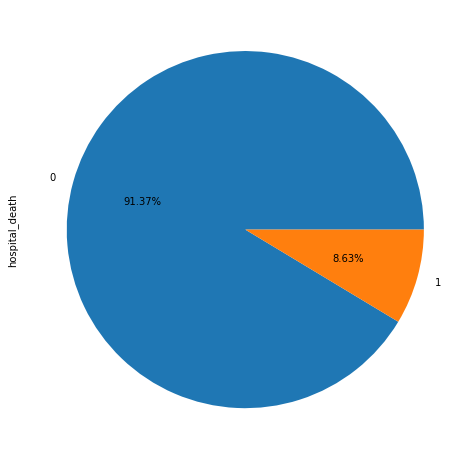

In [76]:
print('univariate analysis of hospital_death')
print('-----------------------------------')
print(patient_records['hospital_death'].value_counts())
plt.rcParams['figure.figsize']=(12,6)
patient_records['hospital_death'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(8,10))
plt.show()

91.37% people survive in hospital and 8.63% of people doesnt survive in the hospital.

univariate analysis of ethnicity
-----------------------------------------
Caucasian           72079
African American     9547
Other/Unknown        4374
Hispanic             3796
Asian                1129
Native American       788
Name: ethnicity, dtype: int64


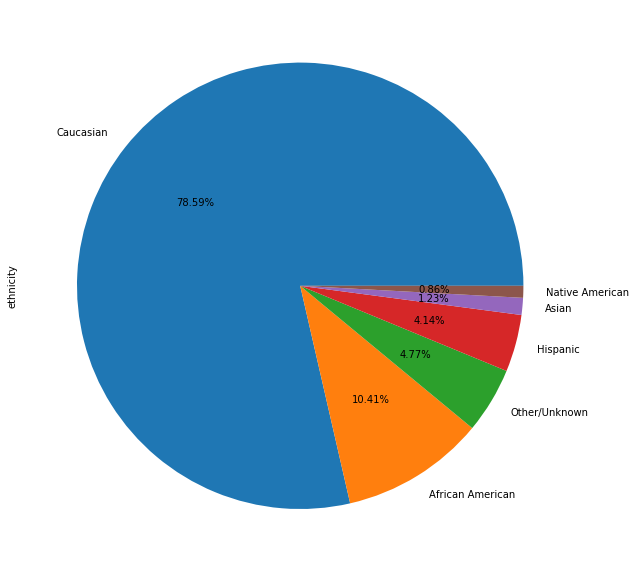

In [77]:
print('univariate analysis of ethnicity')
print('-----------------------------------------')
print(patient_records['ethnicity'].value_counts())
plt.figure(figsize=(10,15))
patient_records['ethnicity'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

observation:-In the ethnicity field the Caucasian shows the higher number 72079 and native american shows the lowest 788.

univariate analysis of gender
-----------------------------------------
M    49494
F    42219
Name: gender, dtype: int64


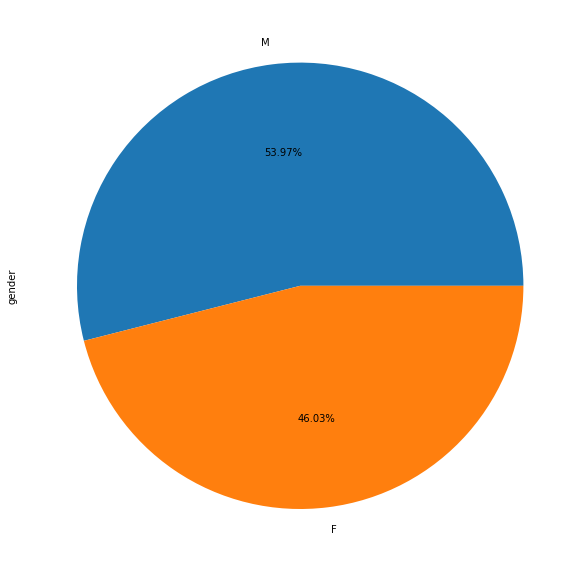

In [78]:
print('univariate analysis of gender')
print('-----------------------------------------')
print(patient_records['gender'].value_counts())
plt.figure(figsize=(10,15))
patient_records['gender'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

In the gender field male is higher 53.97% and female is 46.03%

univariate analysis of hospital_admit_source
-----------------------------------------
Emergency Department    36962
Floor                   29464
Operating Room           9787
Direct Admit             6441
Recovery Room            2896
Acute Care/Floor         1910
Other Hospital           1641
Step-Down Unit (SDU)     1131
PACU                     1017
Other ICU                 233
Chest Pain Center         134
ICU to SDU                 45
ICU                        35
Observation                10
Other                       7
Name: hospital_admit_source, dtype: int64


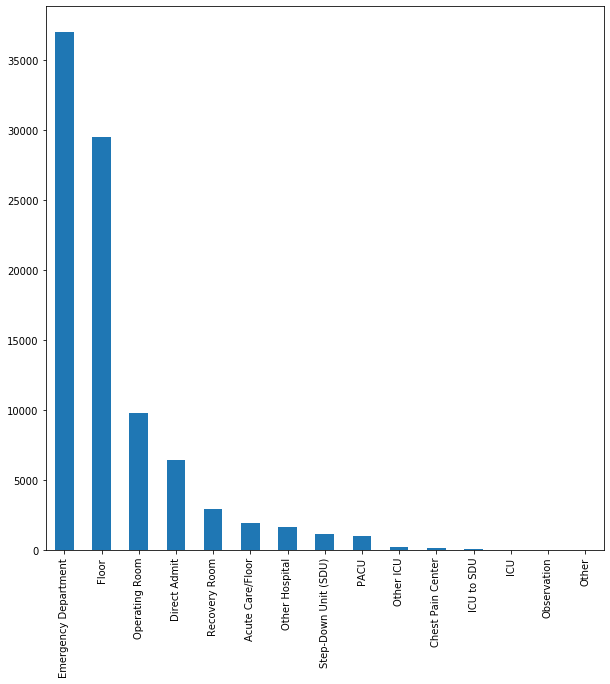

In [79]:
print('univariate analysis of hospital_admit_source')
print('-----------------------------------------')
print(patient_records['hospital_admit_source'].value_counts())
plt.figure(figsize=(10,10))
patient_records['hospital_admit_source'].value_counts().plot(kind='bar')
plt.show()

IN this hospital_admit_source field the emergency department show the higher number whereas observation and other shows the lowest.

univariate analysis of icu_admit_source
-----------------------------------------
Accident & Emergency         54060
Operating Room / Recovery    18713
Floor                        15723
Other Hospital                2358
Other ICU                      859
Name: icu_admit_source, dtype: int64


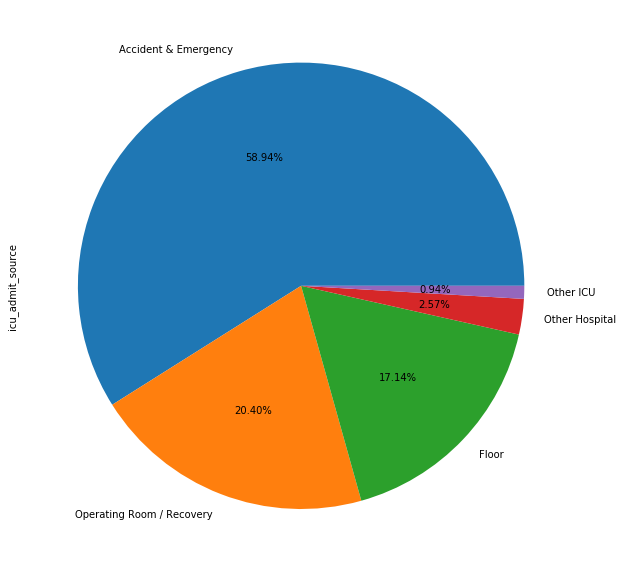

In [80]:
print('univariate analysis of icu_admit_source')
print('-----------------------------------------')
print(patient_records['icu_admit_source'].value_counts())
plt.figure(figsize=(10,15))
patient_records['icu_admit_source'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

In this icu_admit_source field accident & emergency have higher number and other icu have lower.

univariate analysis of icu_stay_type
-----------------------------------------
admit       86183
transfer     4970
readmit       560
Name: icu_stay_type, dtype: int64


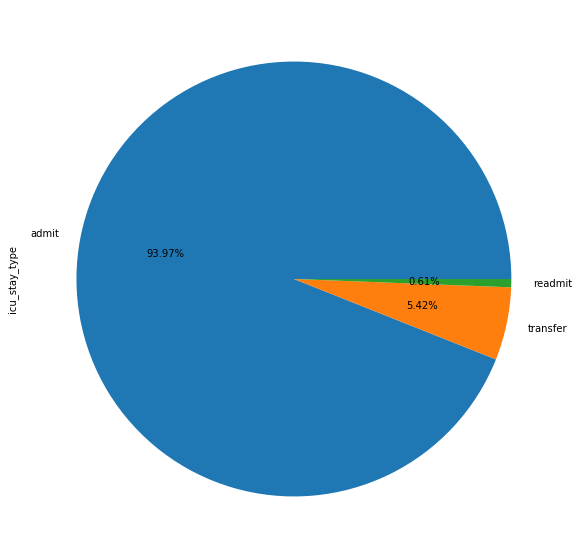

In [81]:
print('univariate analysis of icu_stay_type')
print('-----------------------------------------')
print(patient_records['icu_stay_type'].value_counts())
plt.figure(figsize=(15,10))
patient_records['icu_stay_type'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

In this icu_stay_type field its clearly seen that admit has higher number whereas readmit has lower one.

univariate analysis of icu_type
-----------------------------------------
Med-Surg ICU    50586
MICU             7695
Neuro ICU        7675
CCU-CTICU        7156
SICU             5209
Cardiac ICU      4776
CSICU            4613
CTICU            4003
Name: icu_type, dtype: int64


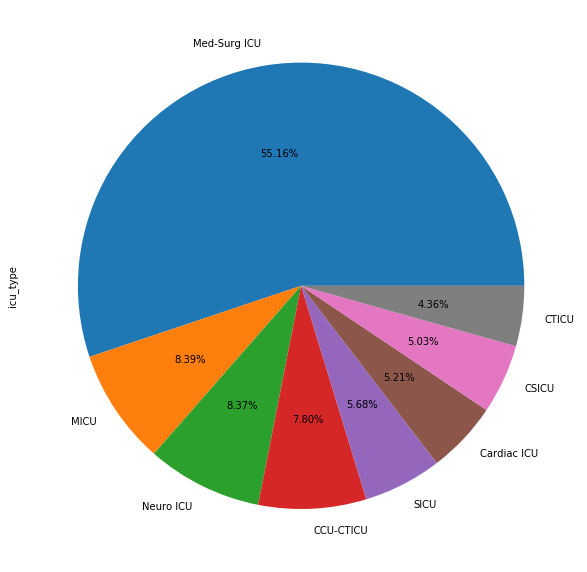

In [82]:
print('univariate analysis of icu_type')
print('-----------------------------------------')
print(patient_records['icu_type'].value_counts())
plt.figure(figsize=(10,15))
patient_records['icu_type'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

In this icu_type Med_Surg_ICU is highest 55.16% and CTICU is lowest 4.36%

univariate analysis of apache_3j_bodysystem
-----------------------------------------
Cardiovascular          31661
Neurological            11896
Sepsis                  11740
Respiratory             11609
Gastrointestinal         9026
Metabolic                7650
Trauma                   3842
Genitourinary            2172
Musculoskeletal/Skin     1166
Hematological             638
Gynecological             313
Name: apache_3j_bodysystem, dtype: int64


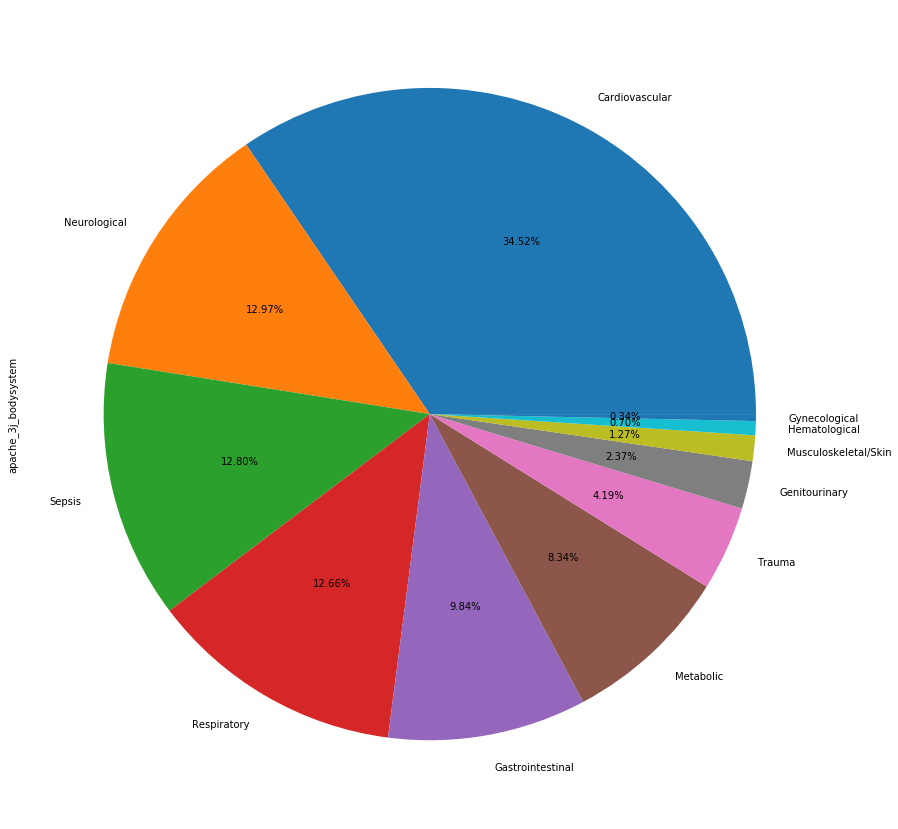

In [83]:
print('univariate analysis of apache_3j_bodysystem')
print('-----------------------------------------')
print(patient_records['apache_3j_bodysystem'].value_counts())
plt.figure(figsize=(25,15))
patient_records['apache_3j_bodysystem'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()


In this apache_3j_bodysystem field cardiovascular shows the highest number and gynecological shows the lowest.

univariate analysis of apache_2_bodysystem
-----------------------------------------
Cardiovascular         40478
Neurologic             11896
Respiratory            11609
Gastrointestinal        9026
Metabolic               7650
Undefined Diagnoses     4114
Trauma                  3842
Renal/Genitourinary     2460
Haematologic             638
Name: apache_2_bodysystem, dtype: int64


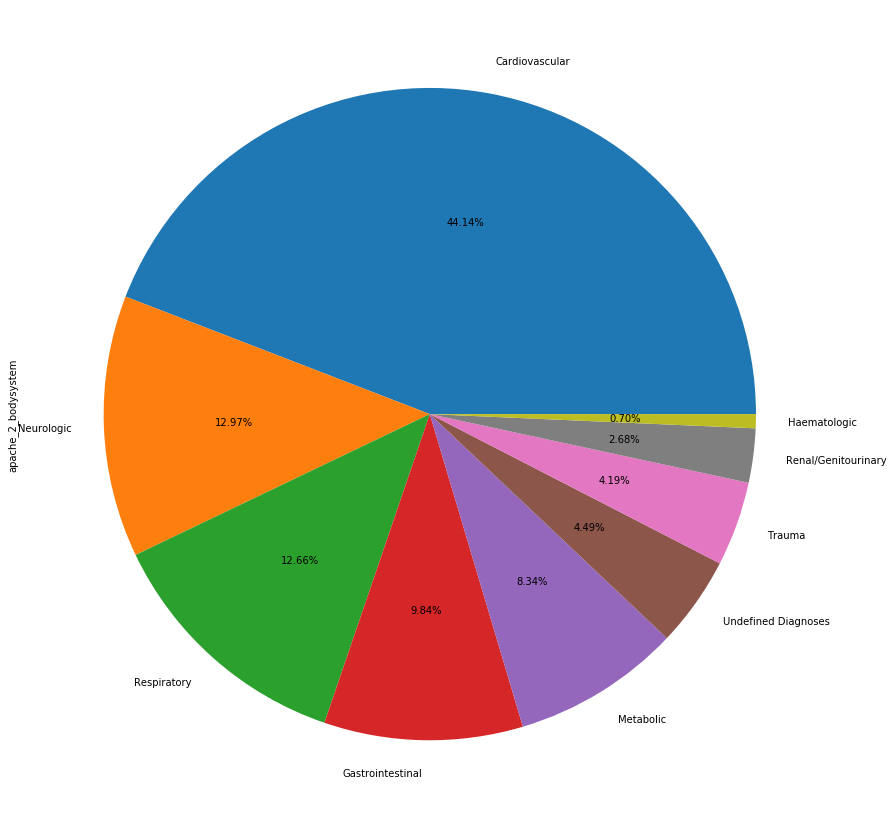

In [84]:
print('univariate analysis of apache_2_bodysystem')
print('-----------------------------------------')
print(patient_records['apache_2_bodysystem'].value_counts())
plt.figure(figsize=(25,15))
patient_records['apache_2_bodysystem'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

In this apache_2_bodysystem field  cadiovascular shows the highest and undefined diagnoses shows the lowest

# Checking The Class Imbalace :

In [85]:
patient_records['hospital_death'].value_counts(normalize=True)*100

0    91.369817
1     8.630183
Name: hospital_death, dtype: float64

Text(0, 0.5, 'Count')

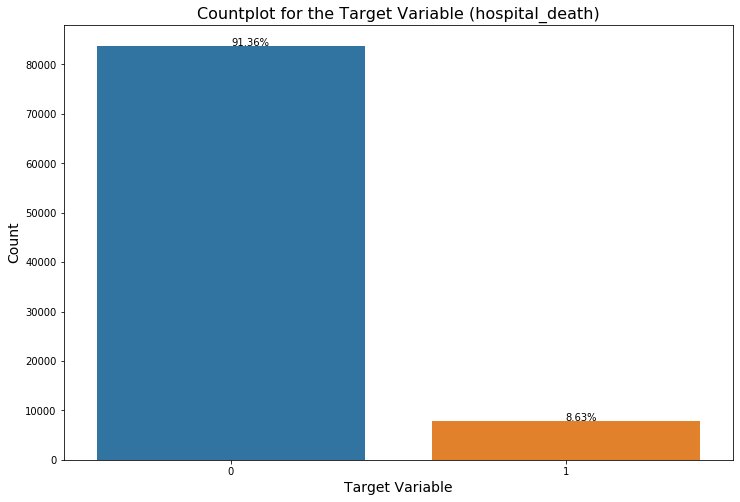

In [86]:
#Let's analyse our responsive variable 'hospital_death'
plt.figure(figsize=(12,8))
sns.countplot(patient_records['hospital_death'])
plt.text(x=1,y=patient_records['hospital_death'].value_counts()[1]+1,
        s='8.63%');
plt.text(x=0,y=patient_records['hospital_death'].value_counts()[0]+1,
        s='91.36%');

plt.title('Countplot for the Target Variable (hospital_death)',fontsize=16)
plt.xlabel('Target Variable',fontsize=14)
plt.ylabel('Count',fontsize=14)

#### Observation

In this target column 1 is not survive and 0 is survive that's mean 91.36% patient survive in the hospital.But 8.63% died in the hospital

# Now We Can get into the Bivariate Analysis:

Now ,let's start Bi-variate Analysis. Here we are going to analyse 2 variables trying to find any relation between them.

In [87]:
#starting with the pair plot
##sns.set_style('whitegrid')
##sns.pairplot(data=patient_records)

In [88]:
##plt.figure(figsize=(50,30))
##sns.heatmap(patient_records.corr())

## Categorical-Continuous Analysis

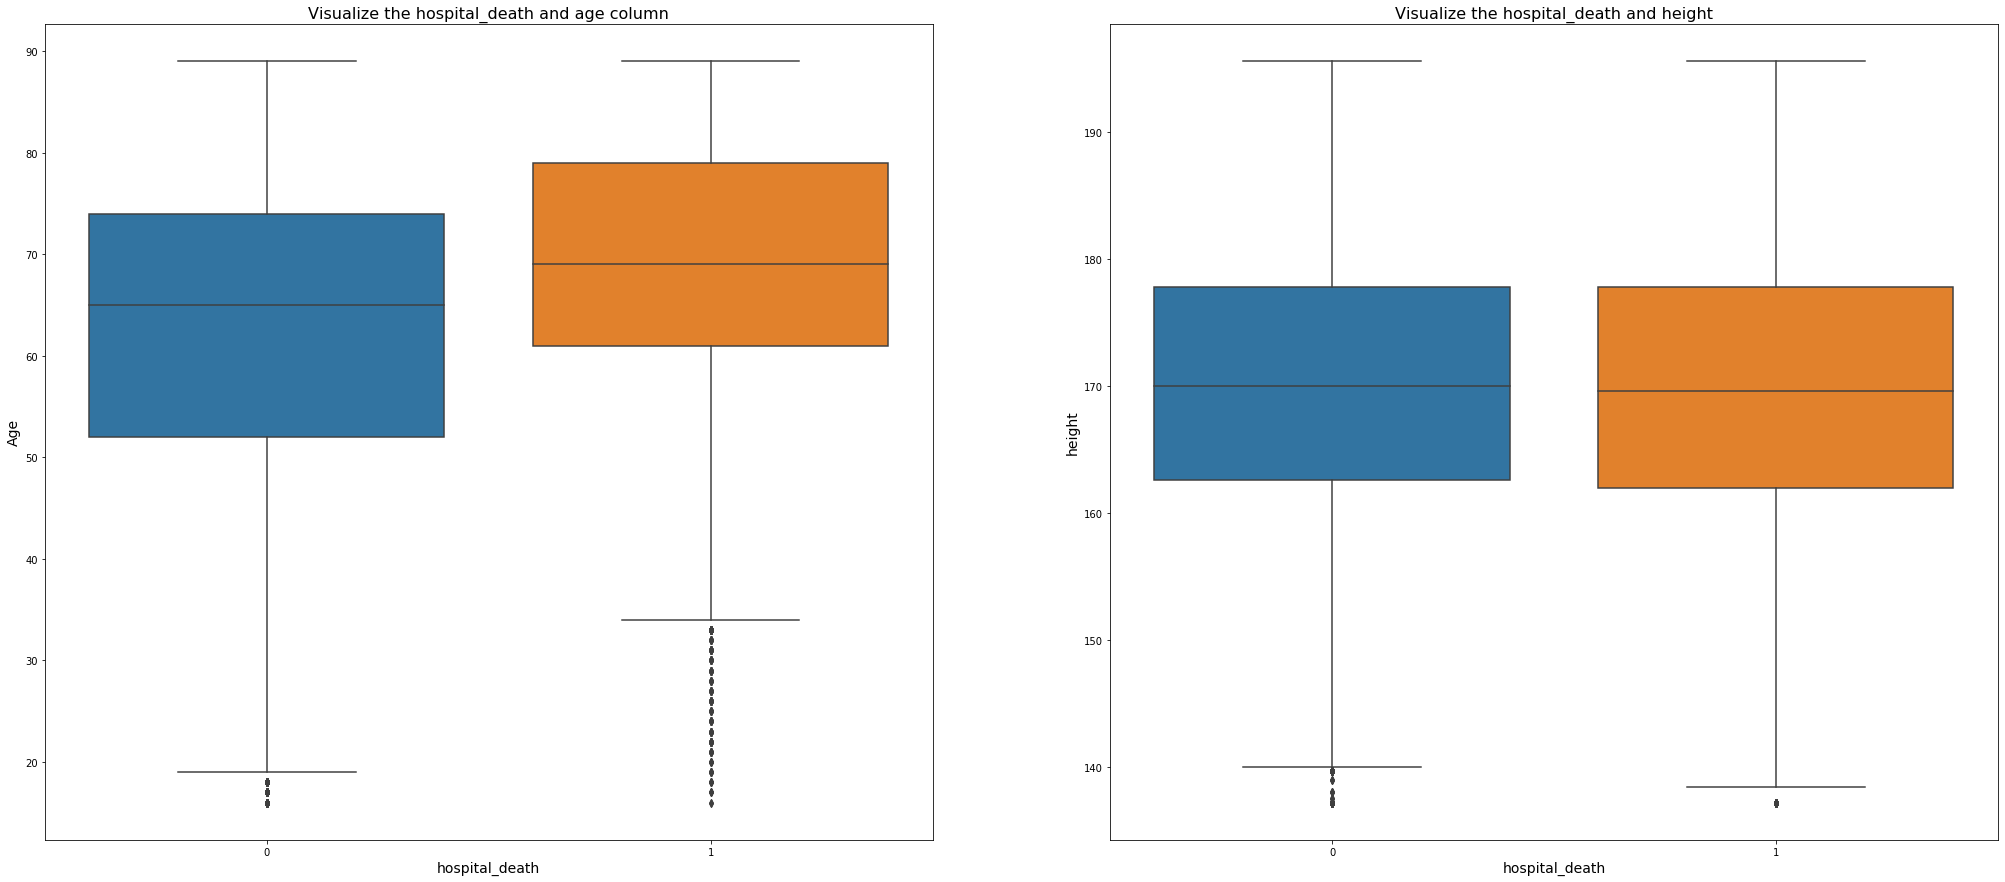

In [89]:
plt.figure(figsize=(35,15))

plt.subplot(1,2,1)
sns.boxplot(x='hospital_death',y='age',data=patient_records)
plt.title('Visualize the hospital_death and age column',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('Age',fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(x='hospital_death',y='height',data=patient_records)
plt.title('Visualize the hospital_death and height',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('height',fontsize=14)

plt.show()


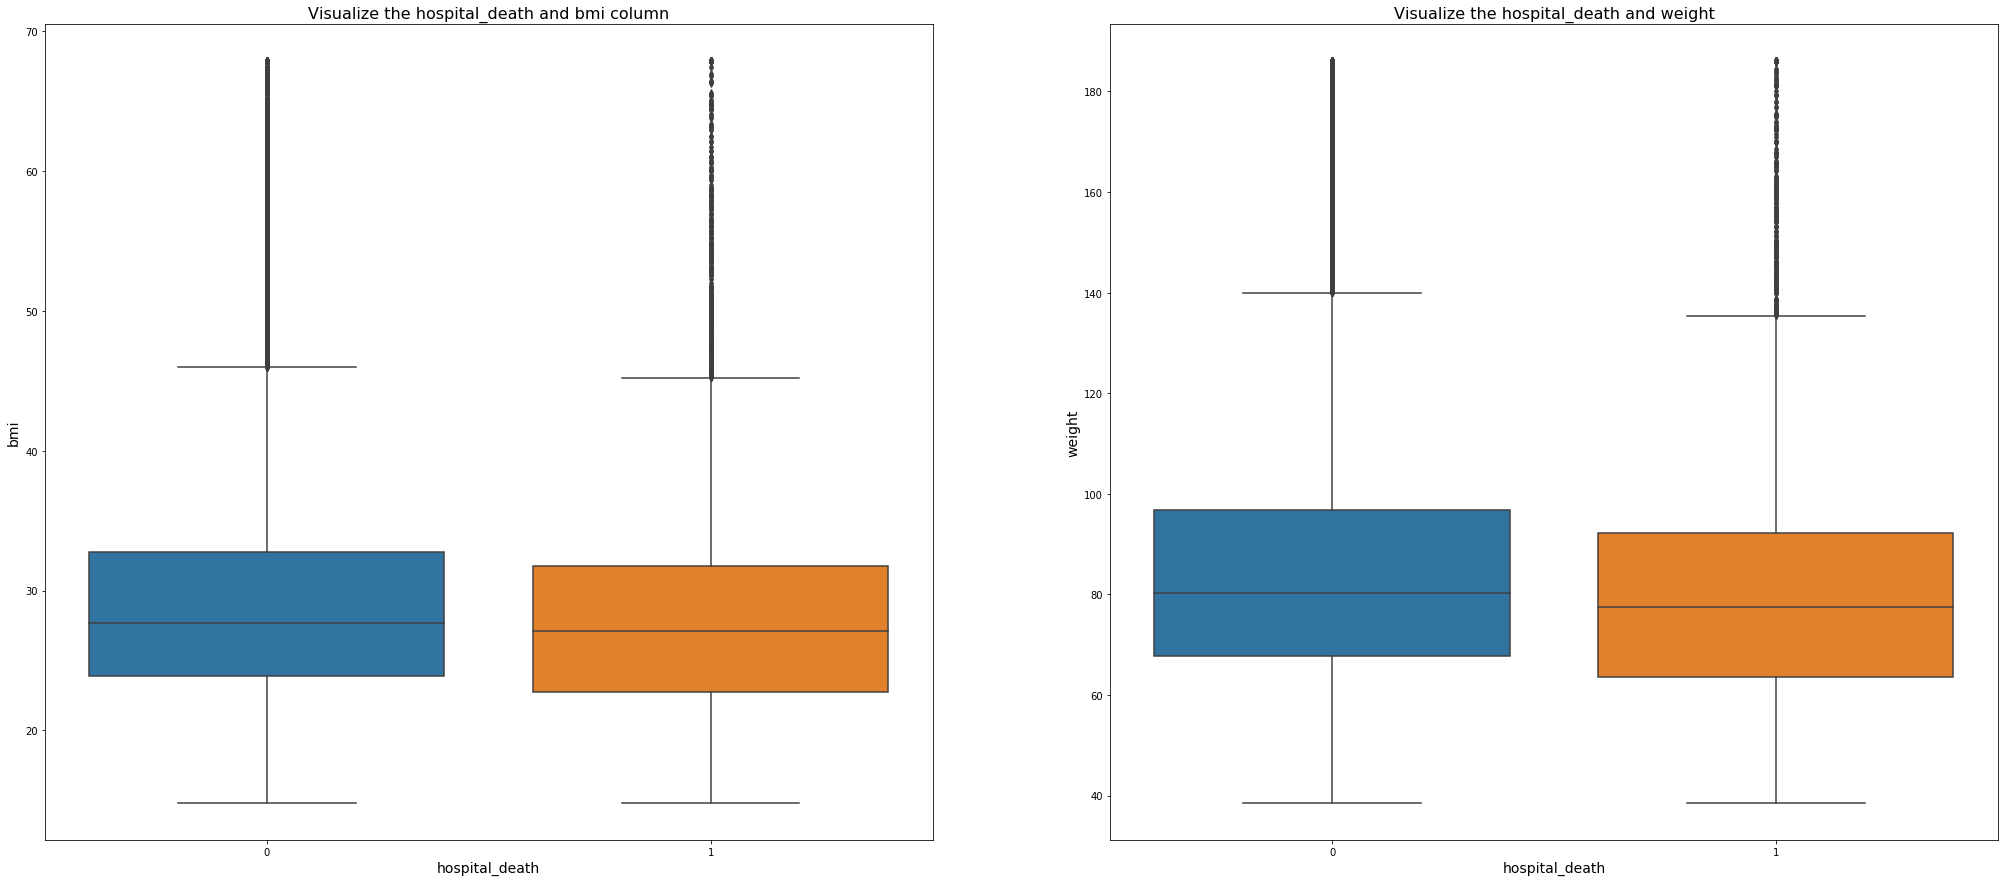

In [90]:
plt.figure(figsize=(35,15))

plt.subplot(1,2,1)
sns.boxplot(x='hospital_death',y='bmi',data=patient_records)
plt.title('Visualize the hospital_death and bmi column',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('bmi',fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(x='hospital_death',y='weight',data=patient_records)
plt.title('Visualize the hospital_death and weight',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('weight',fontsize=14)

plt.show()

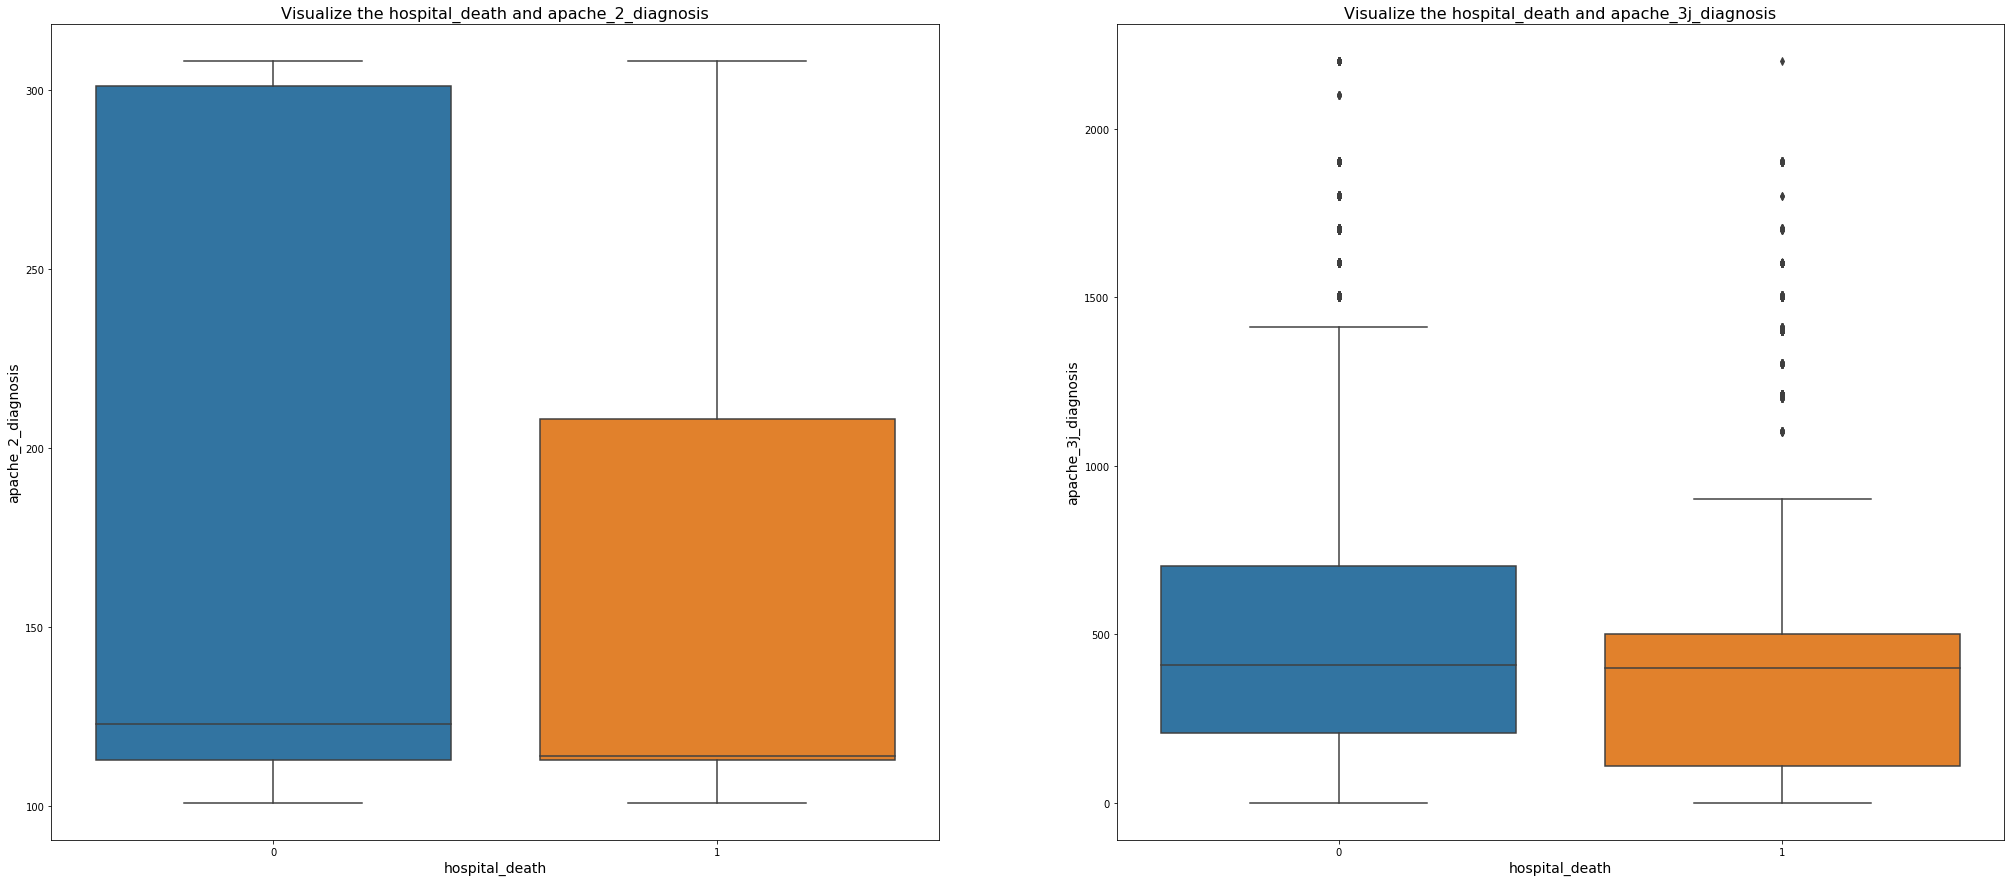

In [91]:
plt.figure(figsize=(35,15))

plt.subplot(1,2,1)
sns.boxplot(x='hospital_death',y='apache_2_diagnosis',data=patient_records)
plt.title('Visualize the hospital_death and apache_2_diagnosis',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('apache_2_diagnosis',fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(x='hospital_death',y='apache_3j_diagnosis',data=patient_records)
plt.title('Visualize the hospital_death and apache_3j_diagnosis',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('apache_3j_diagnosis',fontsize=14)

plt.show()

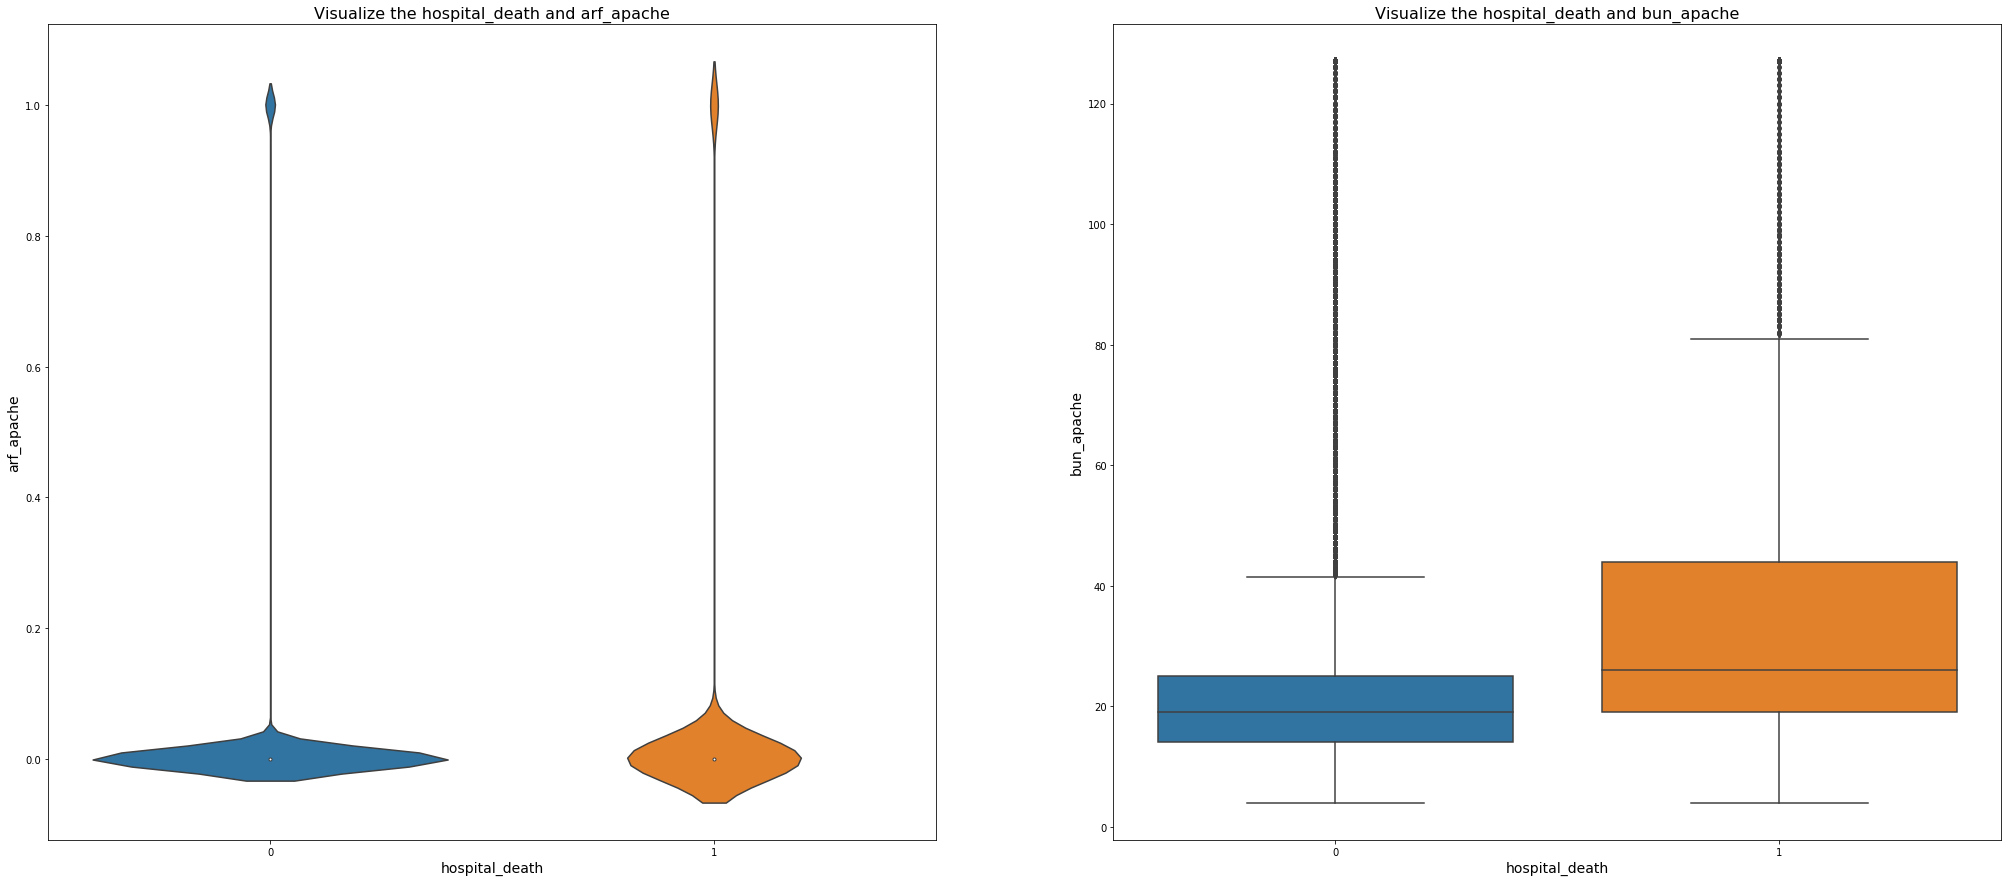

In [92]:
plt.figure(figsize=(35,15))

plt.subplot(1,2,1)
sns.violinplot(x='hospital_death',y='arf_apache',data=patient_records)
plt.title('Visualize the hospital_death and arf_apache',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('arf_apache',fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(x='hospital_death',y='bun_apache',data=patient_records)
plt.title('Visualize the hospital_death and bun_apache',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('bun_apache',fontsize=14)

plt.show()

Text(0, 0.5, 'creatinine_apache')

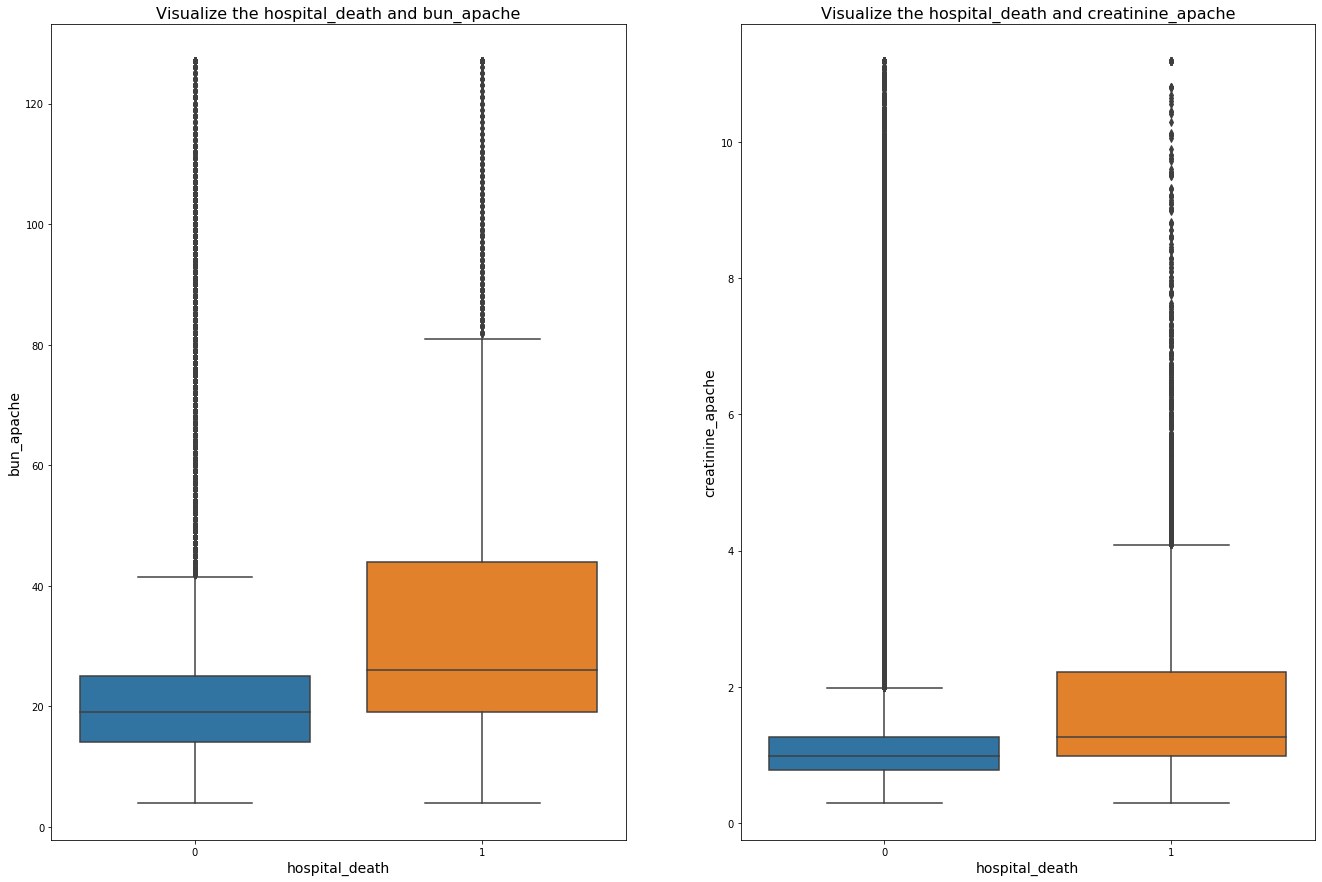

In [93]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.boxplot(x='hospital_death',y='bun_apache',data=patient_records)
plt.title('Visualize the hospital_death and bun_apache',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('bun_apache',fontsize=14)

plt.subplot(1,3,2)
sns.boxplot(x='hospital_death',y='creatinine_apache',data=patient_records)
plt.title('Visualize the hospital_death and creatinine_apache',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('creatinine_apache',fontsize=14)



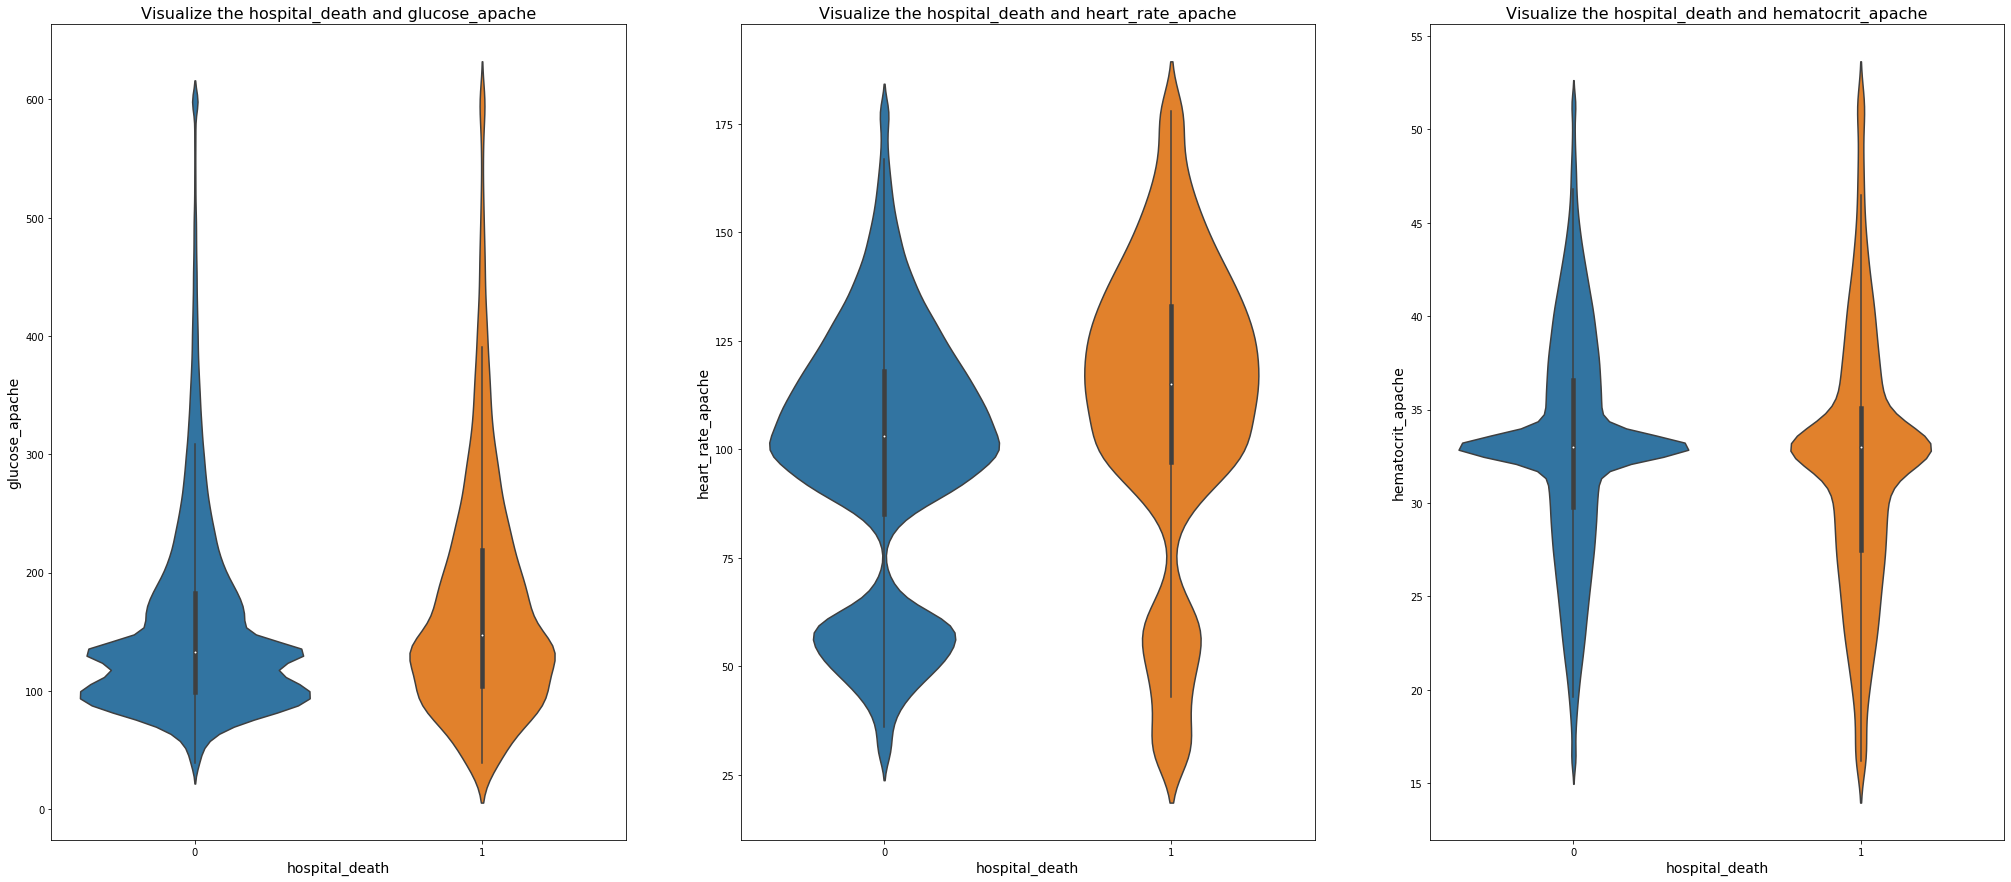

In [94]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.violinplot(x='hospital_death',y='glucose_apache',data=patient_records)
plt.title('Visualize the hospital_death and glucose_apache',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('glucose_apache',fontsize=14)

plt.subplot(1,3,2)
sns.violinplot(x='hospital_death',y='heart_rate_apache',data=patient_records)
plt.title('Visualize the hospital_death and heart_rate_apache',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('heart_rate_apache',fontsize=14)

plt.subplot(1,3,3)
sns.violinplot(x='hospital_death',y='hematocrit_apache',data=patient_records)
plt.title('Visualize the hospital_death and hematocrit_apache',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('hematocrit_apache',fontsize=14)

plt.show()

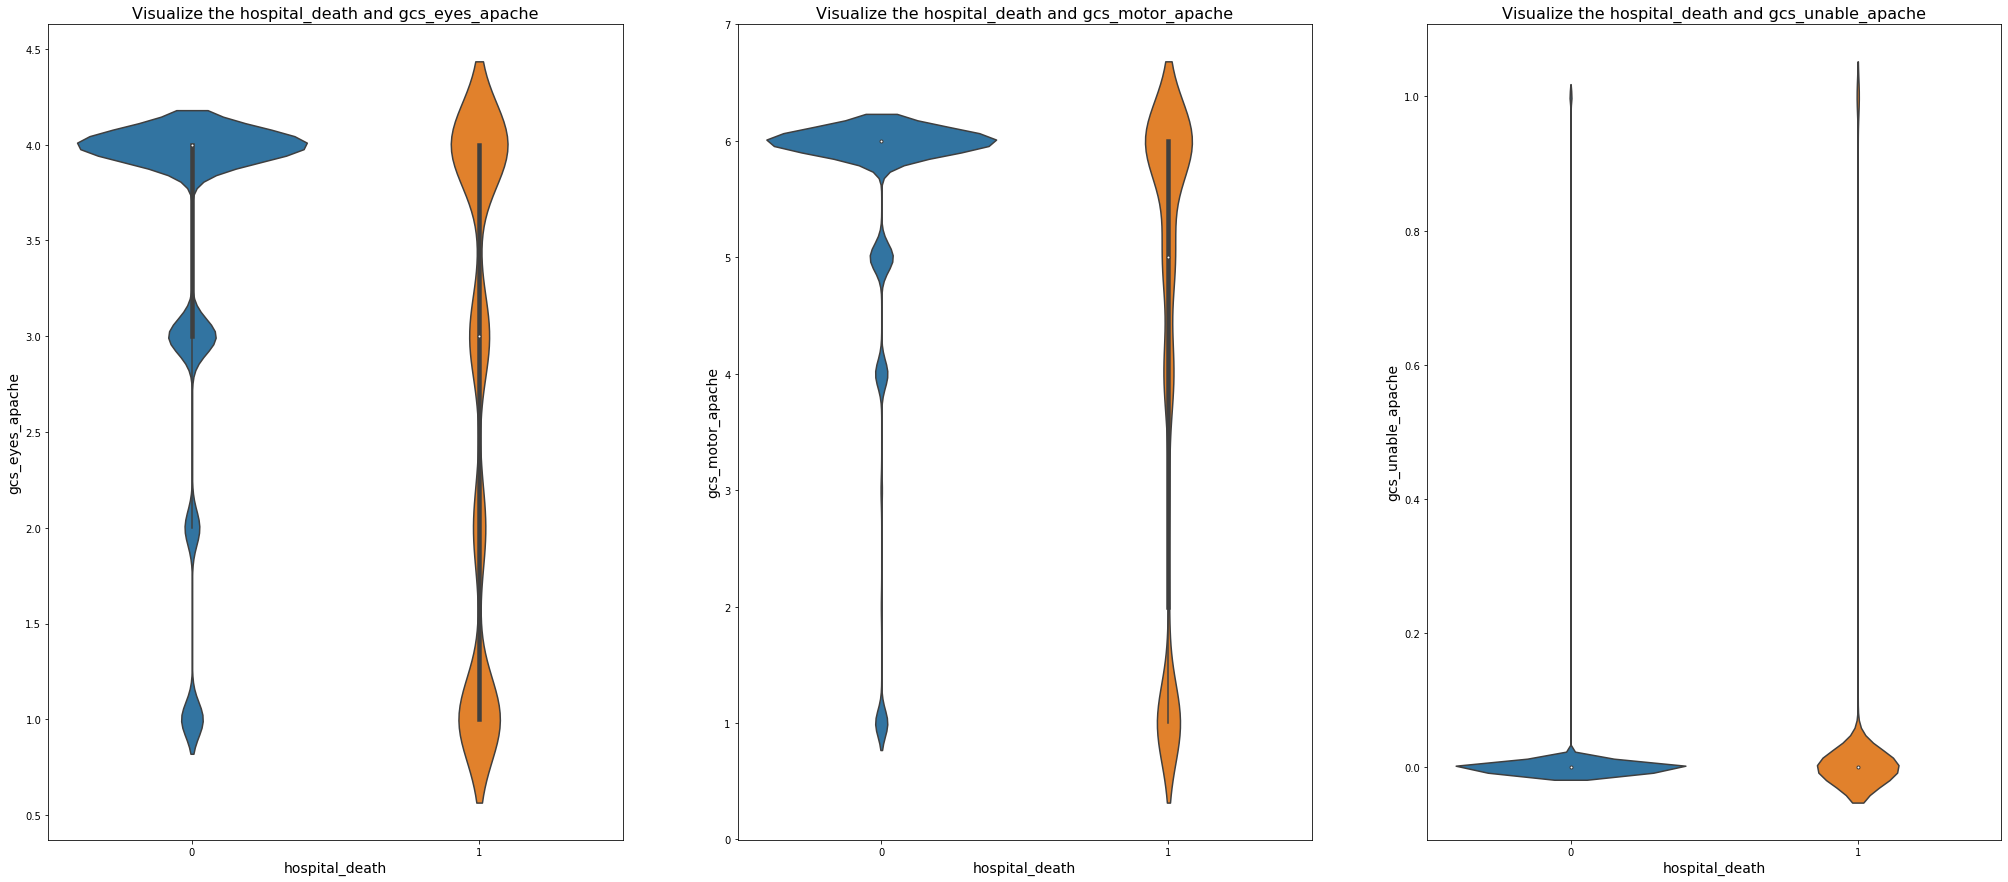

In [95]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.violinplot(x='hospital_death',y='gcs_eyes_apache',data=patient_records)
plt.title('Visualize the hospital_death and gcs_eyes_apache',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('gcs_eyes_apache',fontsize=14)

plt.subplot(1,3,2)
sns.violinplot(x='hospital_death',y='gcs_motor_apache',data=patient_records)
plt.title('Visualize the hospital_death and gcs_motor_apache',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('gcs_motor_apache',fontsize=14)

plt.subplot(1,3,3)
sns.violinplot(x='hospital_death',y='gcs_unable_apache',data=patient_records)
plt.title('Visualize the hospital_death and gcs_unable_apache',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('gcs_unable_apache',fontsize=14)

plt.show()

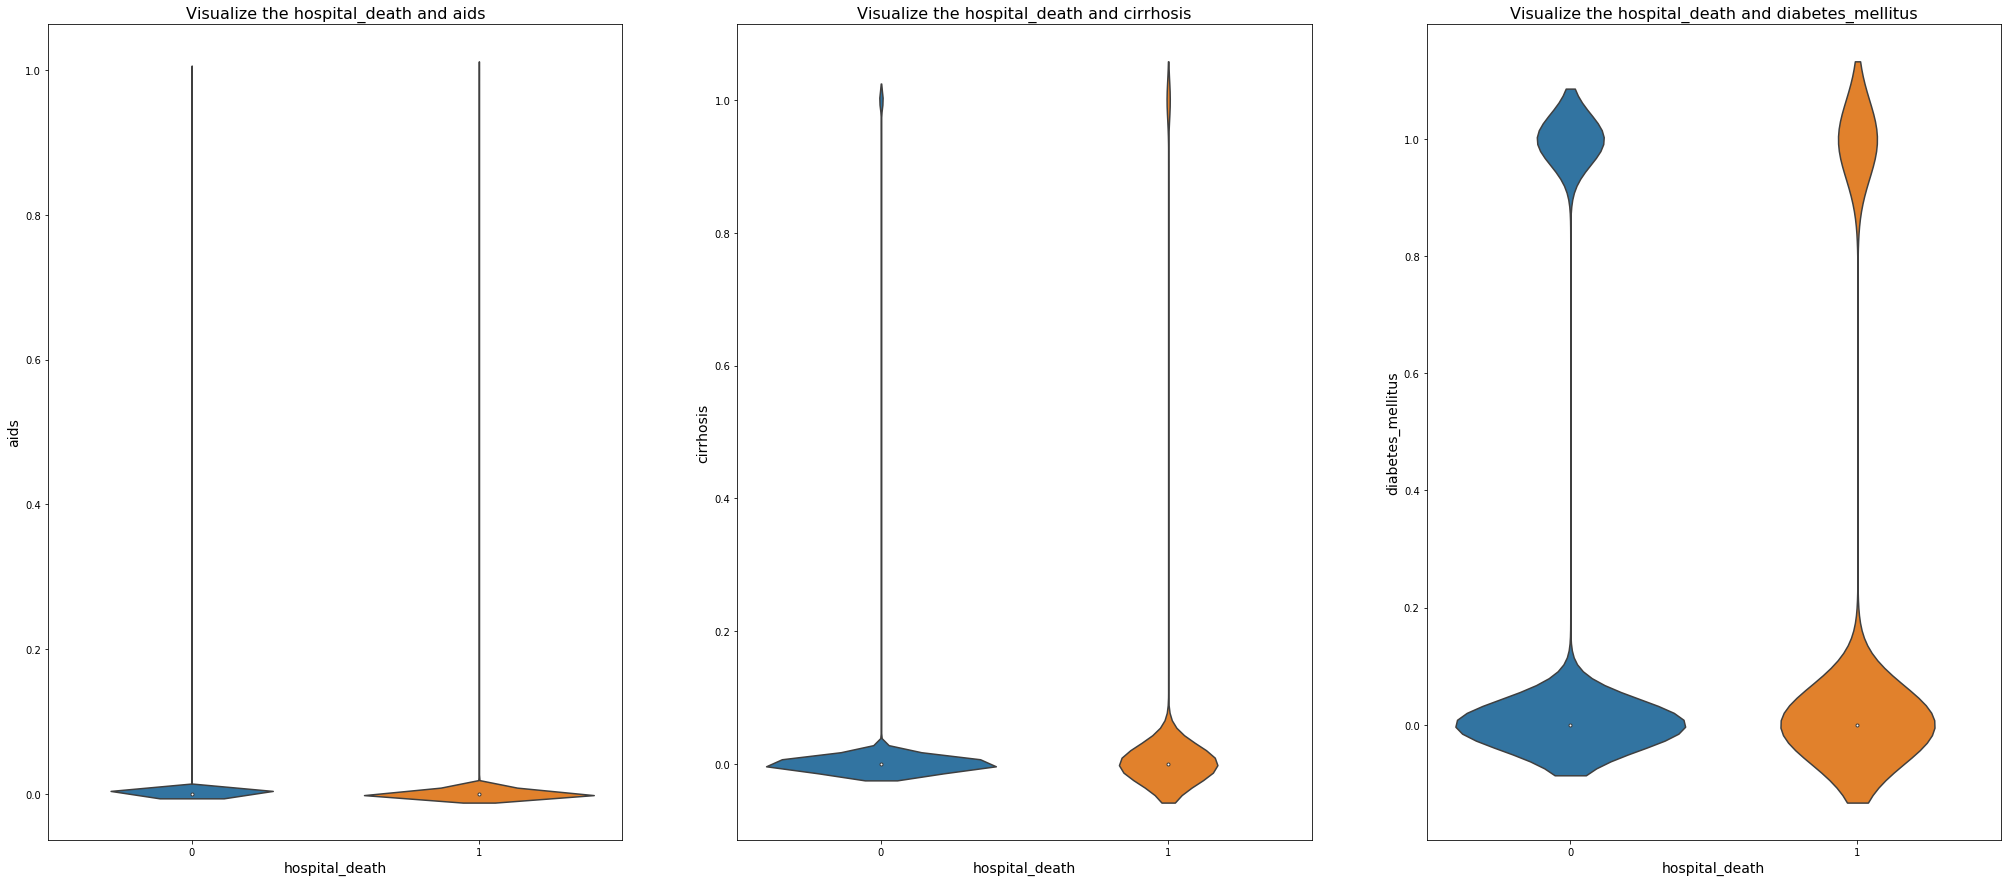

In [96]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.violinplot(x='hospital_death',y='aids',data=patient_records)
plt.title('Visualize the hospital_death and aids',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('aids',fontsize=14)

plt.subplot(1,3,2)
sns.violinplot(x='hospital_death',y='cirrhosis',data=patient_records)
plt.title('Visualize the hospital_death and cirrhosis',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('cirrhosis',fontsize=14)

plt.subplot(1,3,3)
sns.violinplot(x='hospital_death',y='diabetes_mellitus',data=patient_records)
plt.title('Visualize the hospital_death and diabetes_mellitus',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('diabetes_mellitus',fontsize=14)

plt.show()

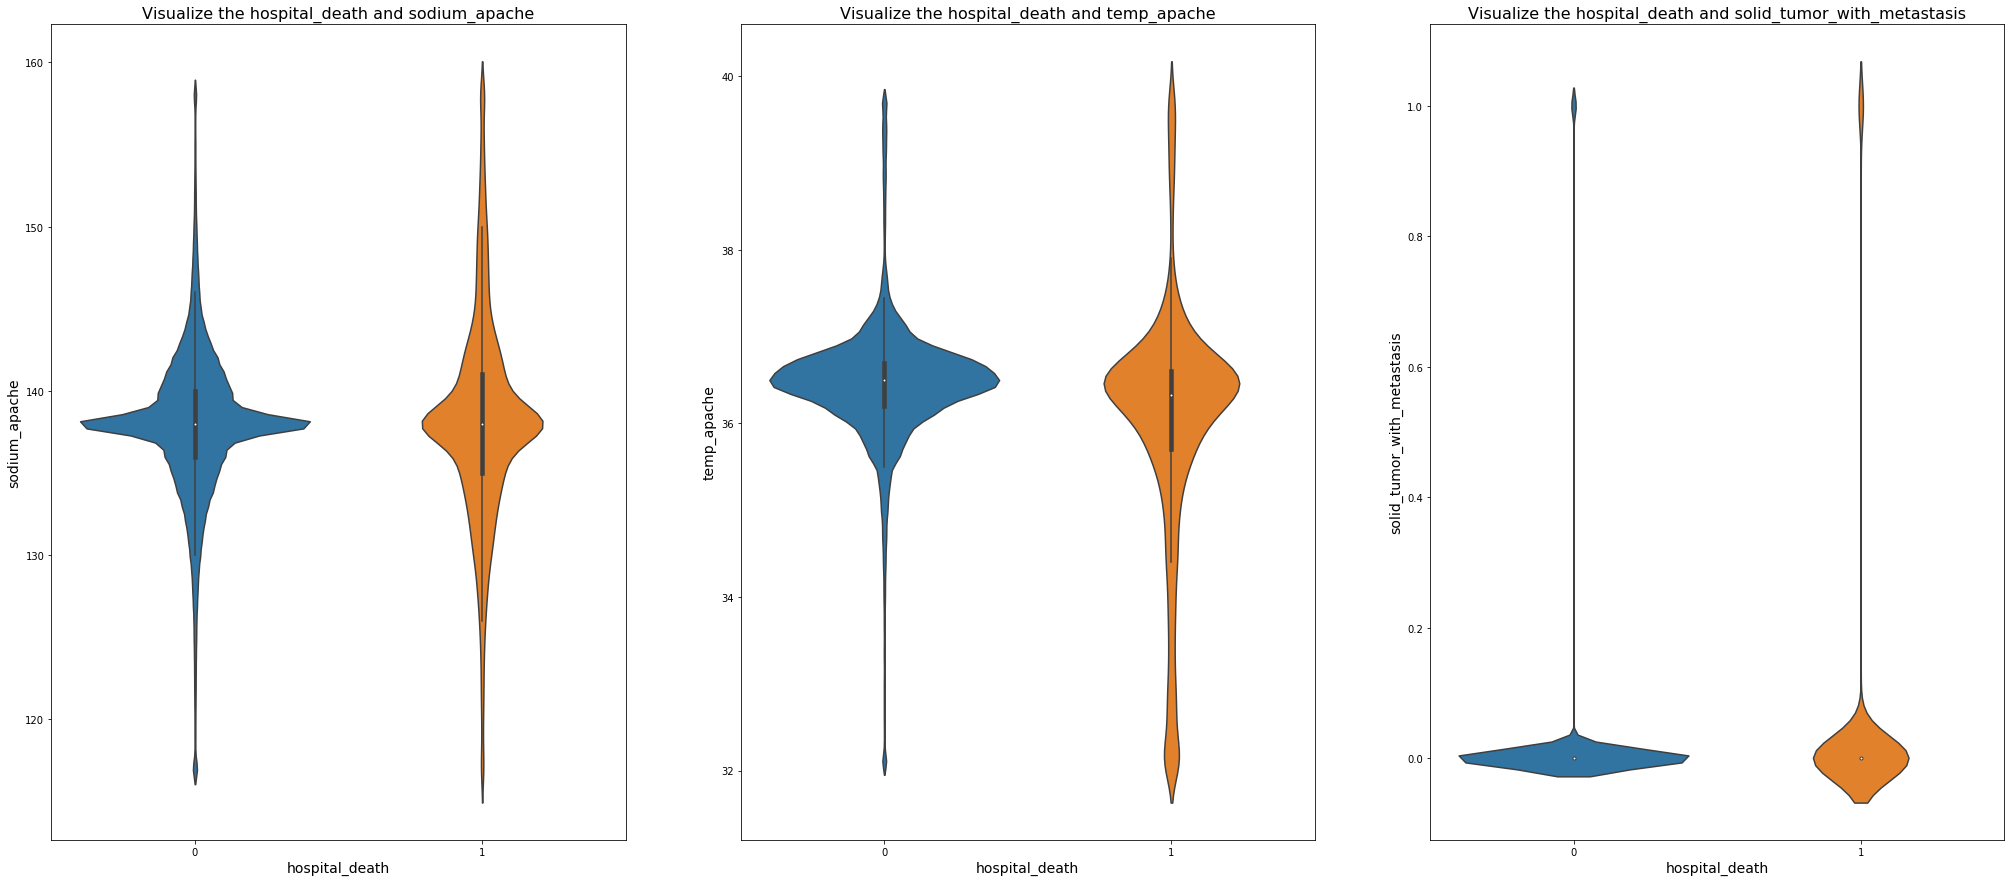

In [97]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.violinplot(x='hospital_death',y='sodium_apache',data=patient_records)
plt.title('Visualize the hospital_death and sodium_apache',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('sodium_apache',fontsize=14)

plt.subplot(1,3,2)
sns.violinplot(x='hospital_death',y='temp_apache',data=patient_records)
plt.title('Visualize the hospital_death and temp_apache',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('temp_apache',fontsize=14)

plt.subplot(1,3,3)
sns.violinplot(x='hospital_death',y='solid_tumor_with_metastasis',data=patient_records)
plt.title('Visualize the hospital_death and solid_tumor_with_metastasis',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('solid_tumor_with_metastasis',fontsize=14)

plt.show()

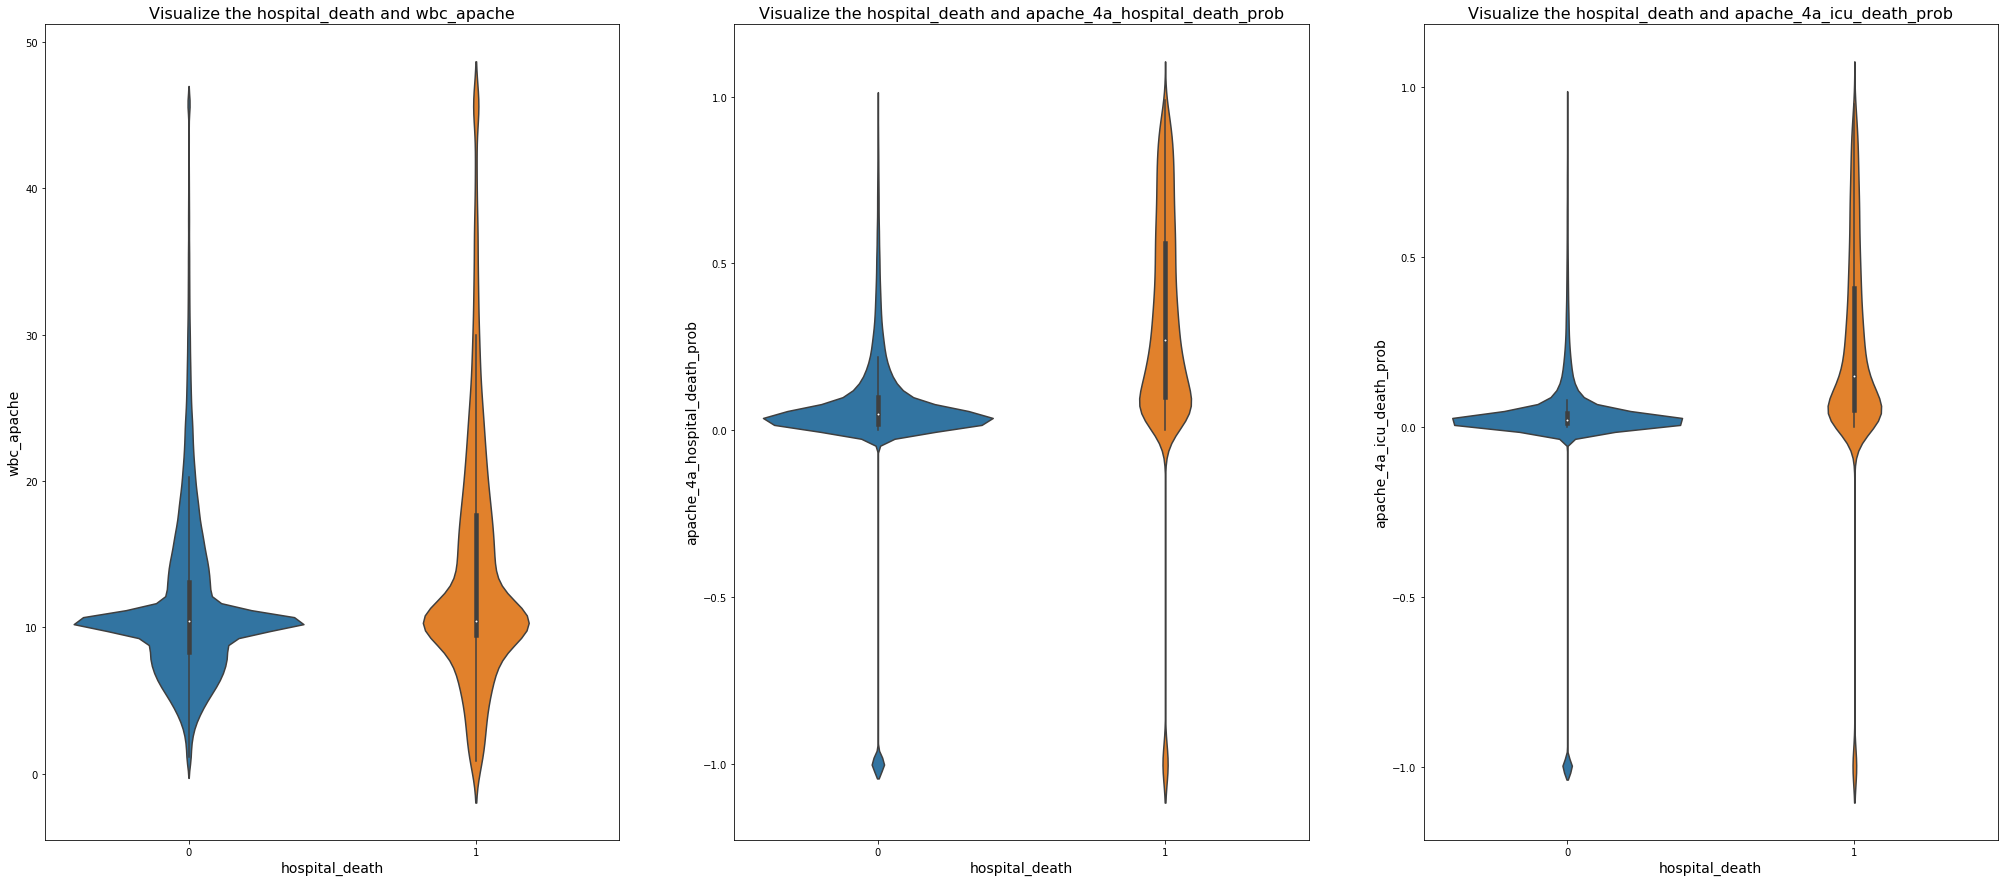

In [98]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.violinplot(x='hospital_death',y='wbc_apache',data=patient_records)
plt.title('Visualize the hospital_death and wbc_apache',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('wbc_apache',fontsize=14)

plt.subplot(1,3,2)
sns.violinplot(x='hospital_death',y='apache_4a_hospital_death_prob',data=patient_records)
plt.title('Visualize the hospital_death and apache_4a_hospital_death_prob',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('apache_4a_hospital_death_prob',fontsize=14)

plt.subplot(1,3,3)
sns.violinplot(x='hospital_death',y='apache_4a_icu_death_prob',data=patient_records)
plt.title('Visualize the hospital_death and apache_4a_icu_death_prob',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('apache_4a_icu_death_prob',fontsize=14)

plt.show()

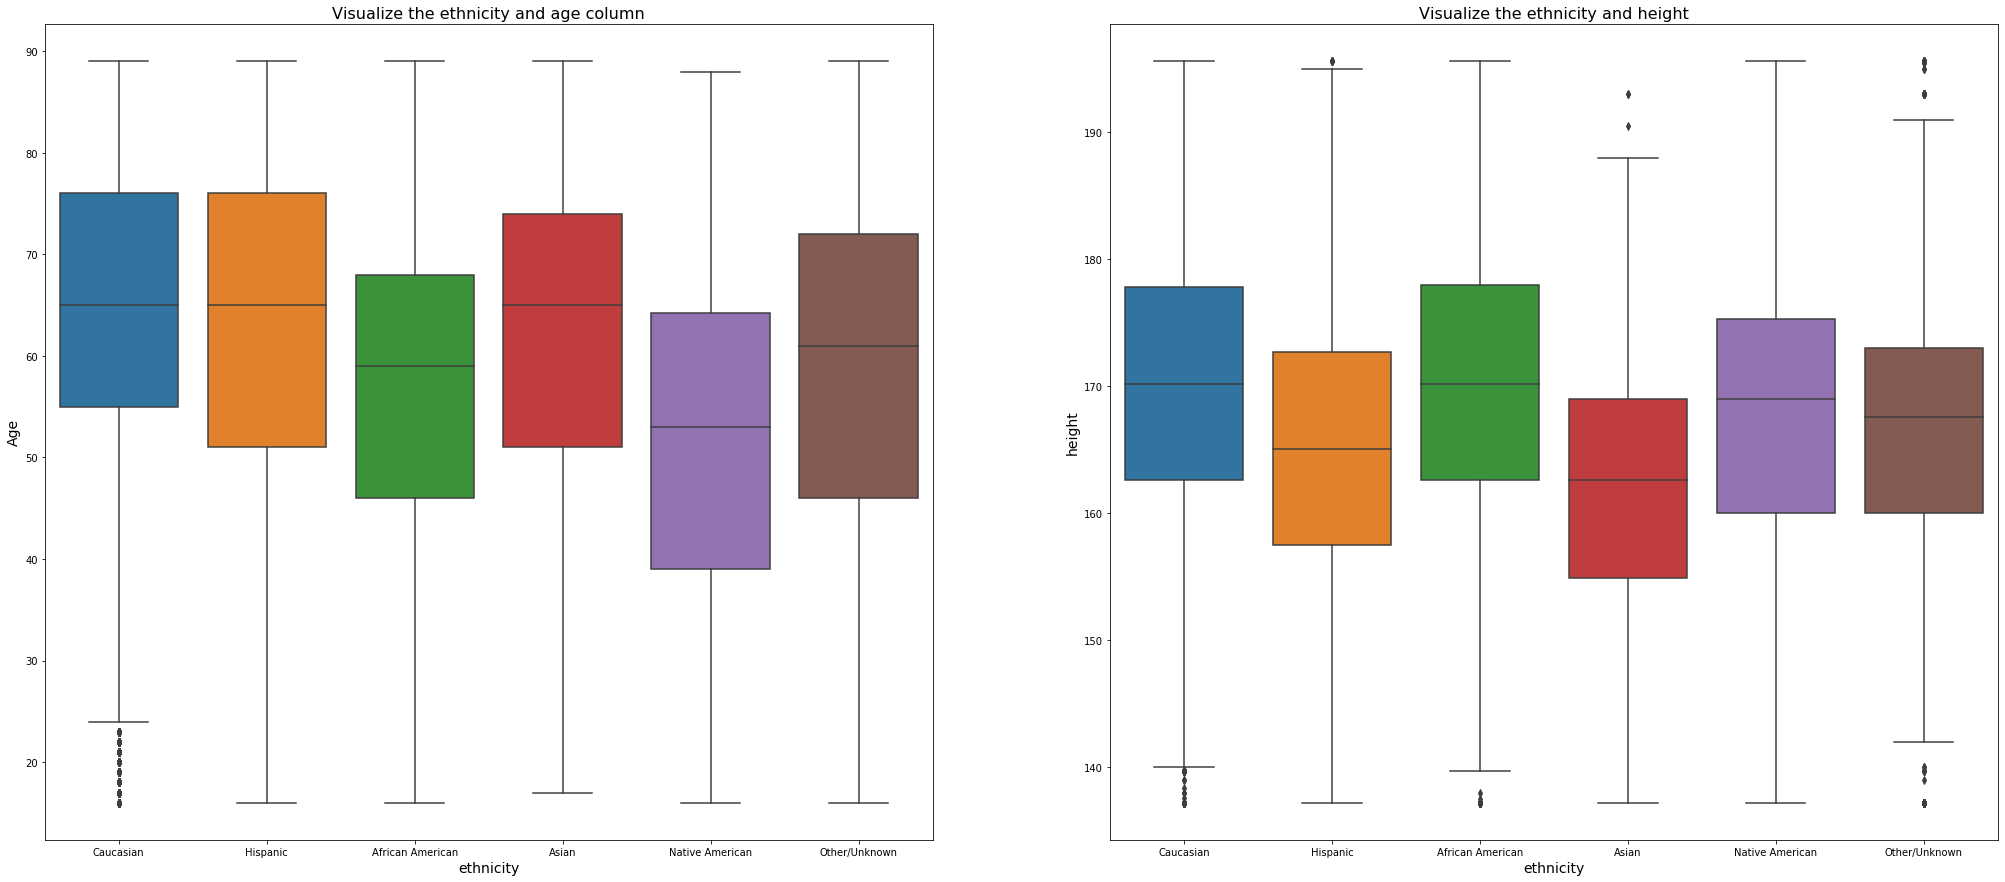

In [99]:
plt.figure(figsize=(35,15))

plt.subplot(1,2,1)
sns.boxplot(x='ethnicity',y='age',data=patient_records)
plt.title('Visualize the ethnicity and age column',fontsize=16)
plt.xlabel('ethnicity',fontsize=14)
plt.ylabel('Age',fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(x='ethnicity',y='height',data=patient_records)
plt.title('Visualize the ethnicity and height',fontsize=16)
plt.xlabel('ethnicity',fontsize=14)
plt.ylabel('height',fontsize=14)

plt.show()

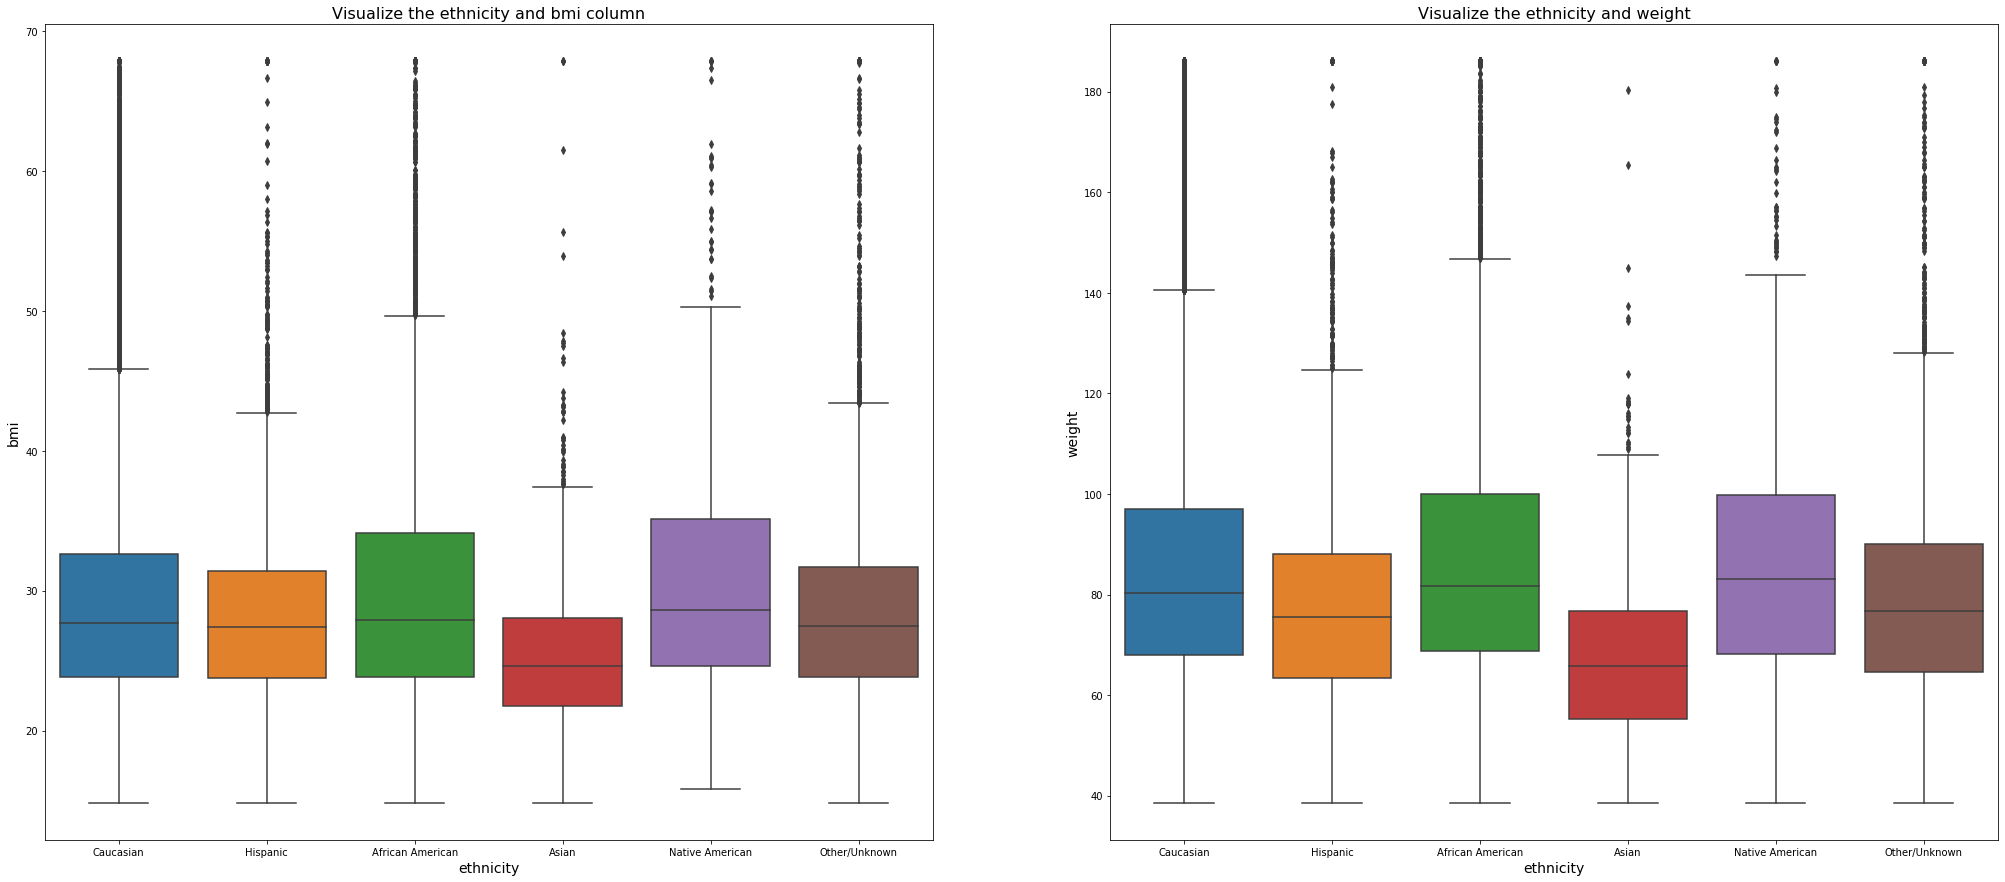

In [100]:
plt.figure(figsize=(35,15))

plt.subplot(1,2,1)
sns.boxplot(x='ethnicity',y='bmi',data=patient_records)
plt.title('Visualize the ethnicity and bmi column',fontsize=16)
plt.xlabel('ethnicity',fontsize=14)
plt.ylabel('bmi',fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(x='ethnicity',y='weight',data=patient_records)
plt.title('Visualize the ethnicity and weight',fontsize=16)
plt.xlabel('ethnicity',fontsize=14)
plt.ylabel('weight',fontsize=14)

plt.show()

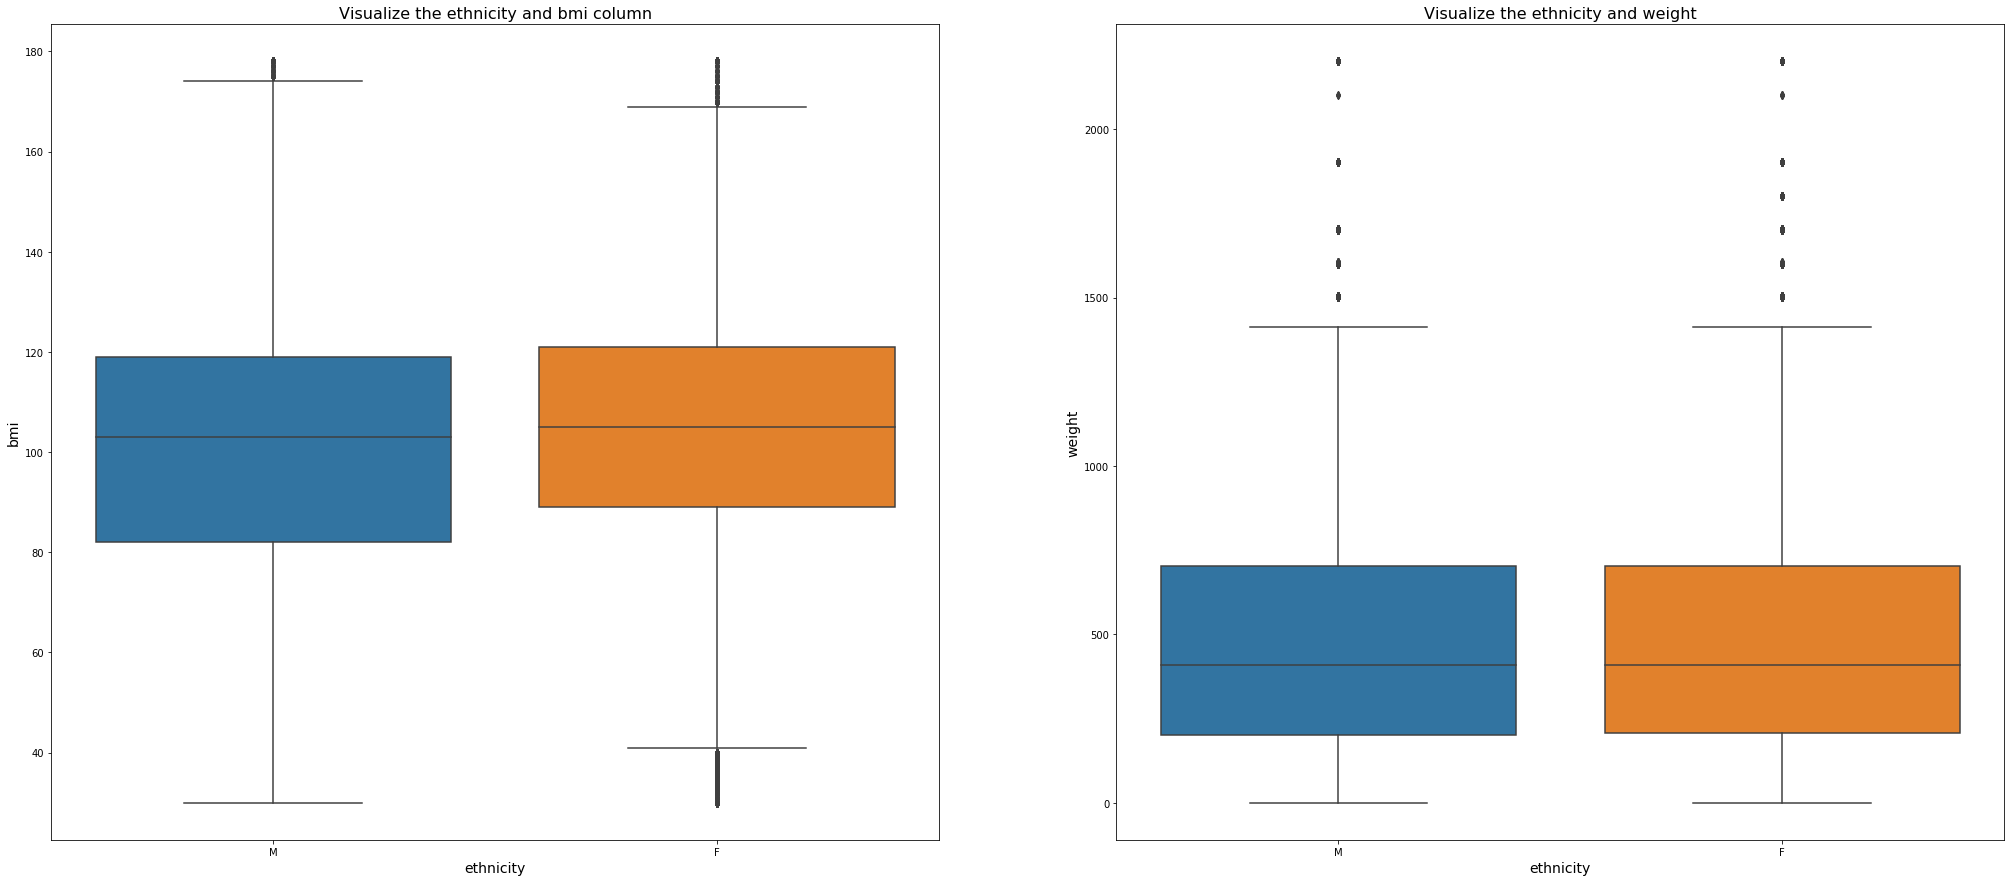

In [101]:
plt.figure(figsize=(35,15))

plt.subplot(1,2,1)
sns.boxplot(x='gender',y='heart_rate_apache',data=patient_records)
plt.title('Visualize the ethnicity and bmi column',fontsize=16)
plt.xlabel('ethnicity',fontsize=14)
plt.ylabel('bmi',fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(x='gender',y='apache_3j_diagnosis',data=patient_records)
plt.title('Visualize the ethnicity and weight',fontsize=16)
plt.xlabel('ethnicity',fontsize=14)
plt.ylabel('weight',fontsize=14)

plt.show()

### Categorical data

In [102]:
pr_categorical = patient_records.select_dtypes(object)
pr_categorical.shape

(91713, 9)

In [103]:
variables = pr_categorical.columns

patient_lists = [variables[i:i+1] for i in range(0, len(variables), 1)]
patient_lists

[Index(['ethnicity'], dtype='object'),
 Index(['gender'], dtype='object'),
 Index(['hospital_admit_source'], dtype='object'),
 Index(['icu_admit_source'], dtype='object'),
 Index(['icu_stay_type'], dtype='object'),
 Index(['icu_type'], dtype='object'),
 Index(['apache_3j_bodysystem'], dtype='object'),
 Index(['apache_2_bodysystem'], dtype='object'),
 Index(['hospital_death'], dtype='object')]

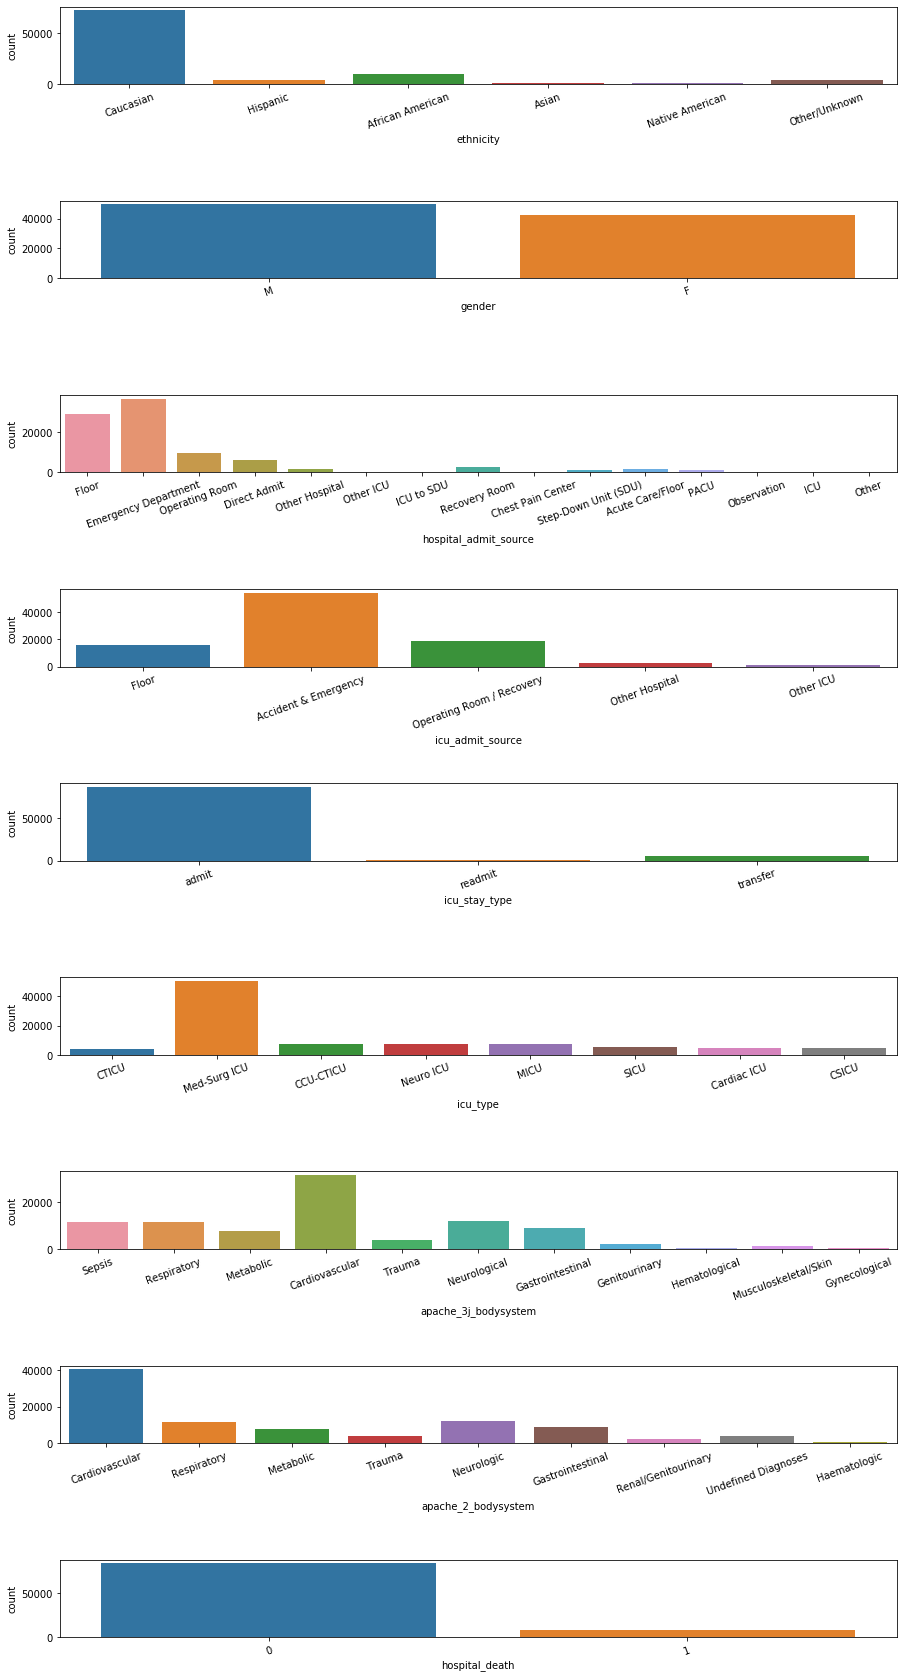

In [104]:
fig, axes = plt.subplots(9, 1, figsize=(15, 30))
# fig.tight_layout()
fig.subplots_adjust(hspace=1.5)
for i_index, patient_list in enumerate(patient_lists):
    for j_index, variable in enumerate(patient_list):
#         patient_records[variable].value_counts().plot(kind='pie',autopct='%1.2f%%', ax=axes[i_index, j_index], subplots='true', radius=1.5, figsize=(50, 120))
        axes[i_index].set_xlabel(variable)
        axes[i_index].tick_params(axis='x', labelrotation=20)
        sns.countplot(data=patient_records, x=variable, ax=axes[i_index])
plt.show()

<div class='alert alert-info'>
    <b>Observations</b><br>
        1. Hospital Death<br>
            a. The target variable hospital death has an imbalnaced proportion as there are more survivals than deaths.<br>
        2. Ethinicity<br>
            a. From the graph it is seen than more number of caucasions have been admitted. And the least admitted ones are native americans. <br>
        3. Gender<br>
            a. There isnt much of a difference between male and female patients.<br>
        4. Hospital Admit Source<br>
            a. Emergency Room and Floor are maximum.<br>
        5. ICU Admit Source<br>
            a. Similar to hospital admit source, emergency room is maximum.<br>
        6. ICU Stay Type<br>
            a. Admission is the most popular one in icu stay type.<br>
        7. ICU Type <br>
            a. Med-Surg type is maximum.<br>
        8. APACHE 3j Bodysystem & APACHE 2 Bodysystem<br>
            a. Almost all of them have significant number of cases except for gynaec and haemo
</div>

### Numerical data - Continuous

In [105]:
pr_continuous = patient_records.select_dtypes(np.float)
pr_continuous.shape

(91713, 18)

In [106]:
variables = pr_continuous.columns
patient_lists = [variables[i:i+3] for i in range(0, len(variables), 3)]
patient_lists

[Index(['age', 'bmi', 'height'], dtype='object'),
 Index(['weight', 'apache_2_diagnosis', 'apache_3j_diagnosis'], dtype='object'),
 Index(['bun_apache', 'creatinine_apache', 'glucose_apache'], dtype='object'),
 Index(['heart_rate_apache', 'hematocrit_apache', 'map_apache'], dtype='object'),
 Index(['resprate_apache', 'sodium_apache', 'temp_apache'], dtype='object'),
 Index(['wbc_apache', 'apache_4a_hospital_death_prob',
        'apache_4a_icu_death_prob'],
       dtype='object')]

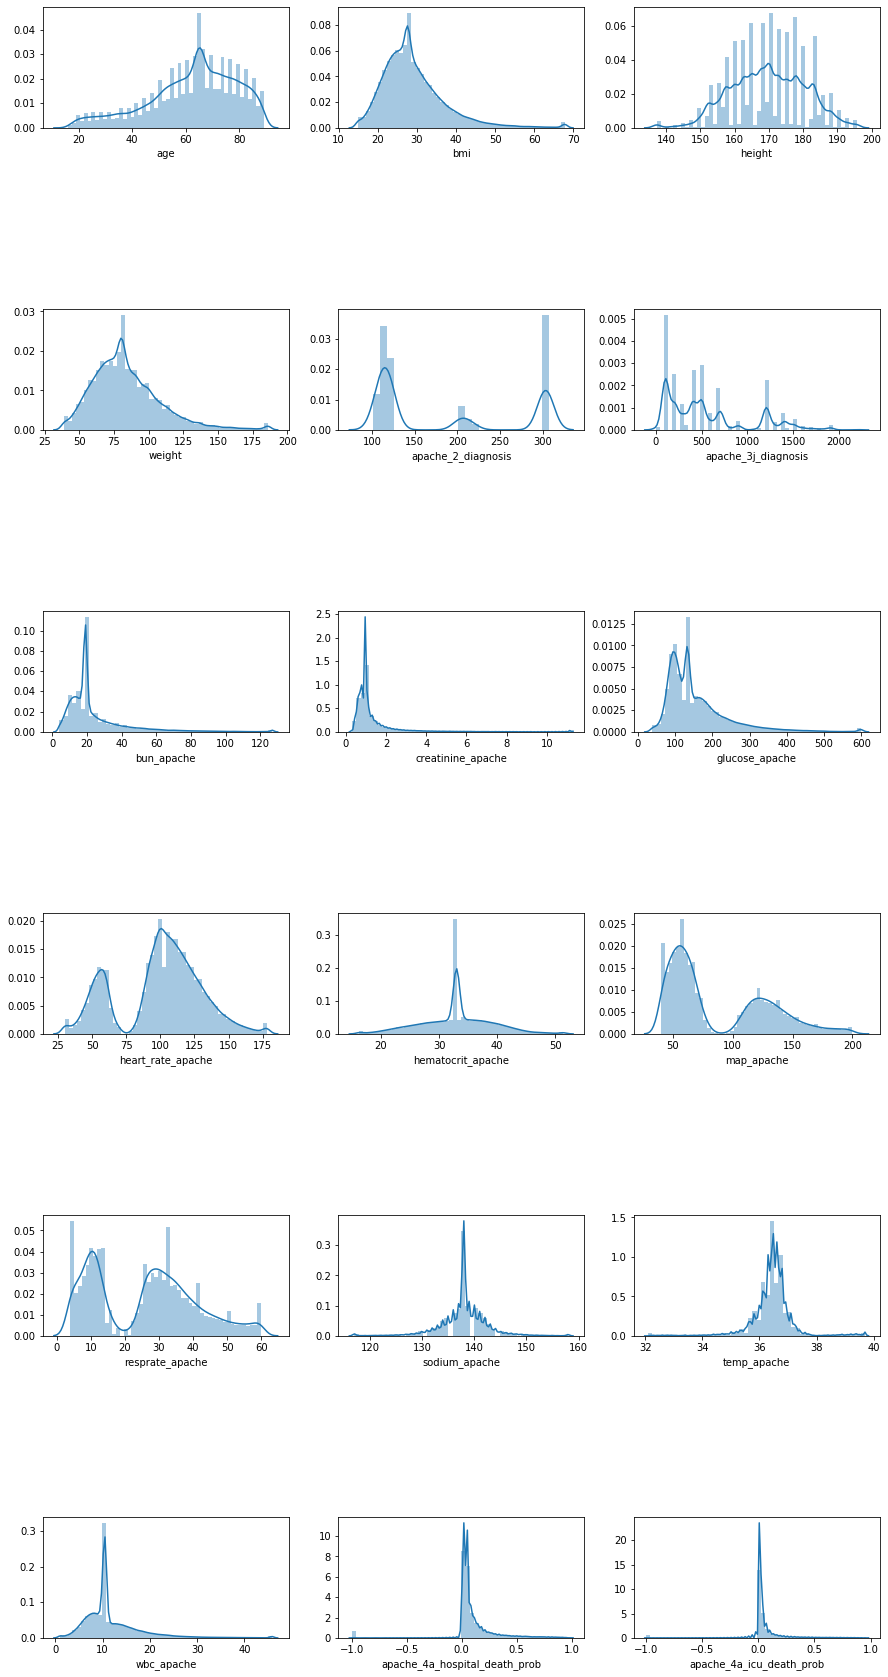

In [107]:
fig, axes = plt.subplots(6, 3, figsize=(15, 30))
# fig.tight_layout()
fig.subplots_adjust(hspace=1.5)
for i_index, patient_list in enumerate(patient_lists):
    for j_index, variable in enumerate(patient_list):
        ax = axes[i_index, j_index]
#         patient_records[variable].value_counts().plot(kind='pie',autopct='%1.2f%%', ax=axes[i_index, j_index], subplots='true', radius=1.5, figsize=(50, 120))
        ax.set_xlabel(variable)
#         ax.tick_params(axis='x', labelrotation=20)
        sns.distplot(patient_records[variable], ax=ax)
plt.show()

<div class='alert alert-info'>
    <b>Observations</b><br>
    <ul>
        <li>Electivce surgery</li>
            It is seen that most of the patients admitted were not scheduled for a surgery beforehand.
        <li>APACHE</li>
            From the graphs, we can determine which score was the highest in each reading.
        <li>Comorbidity</li>
              We can infer that most of the patients were not diagnosed with the above diseases. The additional diseases are: AIDS, Cirrhosis, Diabetes Melitus, Hepatic Failure, Immunosuppression, Leukimia, Lymphoma, Solid Tumor with Metastasis
    </ul>
</div>

In [108]:
patient_yes = patient_records[patient_records['hospital_death']==1]

In [109]:
patient_yes

age        bmi  elective_surgery  ethnicity gender      height  \
8      45.0  27.654655                 0  Caucasian      M  170.200000   
25     68.0  26.010703                 0  Caucasian      F  165.100000   
46     64.0  16.980389                 0  Caucasian      M  180.300000   
58     55.0  27.654655                 0  Caucasian      F  172.700000   
73     74.0  25.311715                 0  Caucasian      M  167.600000   
...     ...        ...               ...        ...    ...         ...   
91602  19.0  20.308204                 0  Caucasian      M  177.800000   
91611  74.0  32.622159                 0  Caucasian      M  170.200000   
91620  65.0  21.067554                 0  Caucasian      M  162.600000   
91691  59.0  29.384757                 0  Caucasian      F  165.000000   
91696  65.0  27.654655                 0  Caucasian      M  169.641588   

      hospital_admit_source           icu_admit_source icu_stay_type  \
8            Other Hospital             Other Hospital         admit   
25                    Floor                      Floor         admit   
46           Operating Room  Operating Room / Recovery         admit   
58     Emergency Department       Accident & Emergency         admit   
73             Direct Admit       Accident & Emergency         admit   
...                     ...                        ...           ...   
91602                 Floor             Other Hospital         admit   
91611                 Floor                      Floor         admit   
91620                 Floor                      Floor         admit   
91691  Emergency Department       Accident & Emergency         admit   
91696          Direct Admit       Accident & Emergency         admit   

           icu_type  ...  cirrhosis  diabetes_mellitus  hepatic_failure  \
8         CCU-CTICU  ...          0                  0                0   
25        CCU-CTICU  ...          0                  0                0   
46        Neuro ICU  ...          0                  0                0   
58     Med-Surg ICU  ...          0                  0                0   
73             MICU  ...          0                  1                0   
...             ...  ...        ...                ...              ...   
91602   Cardiac ICU  ...          0                  0                0   
91611   Cardiac ICU  ...          0                  1                0   
91620  Med-Surg ICU  ...          0                  0                0   
91691  Med-Surg ICU  ...          0                  0                0   
91696   Cardiac ICU  ...          0                  0                0   

       immunosuppression  leukemia  lymphoma  solid_tumor_with_metastasis  \
8                      0         0         0                            0   
25                     0         0         0                            0   
46                     1         0         0                            1   
58                     0         0         0                            0   
73                     0         1         0                            0   
...                  ...       ...       ...                          ...   
91602                  0         0         0                            0   
91611                  0         0         0                            0   
91620                  1         0         1                            0   
91691                  0         0         0                            0   
91696                  0         0         0                            0   

       apache_3j_bodysystem  apache_2_bodysystem  hospital_death  
8            Cardiovascular       Cardiovascular               1  
25                   Sepsis       Cardiovascular               1  
46             Neurological           Neurologic               1  
58              Respiratory          Respiratory               1  
73            Hematological         Haematologic               1  
...                     ..

<Figure size 2520x1080 with 0 Axes>

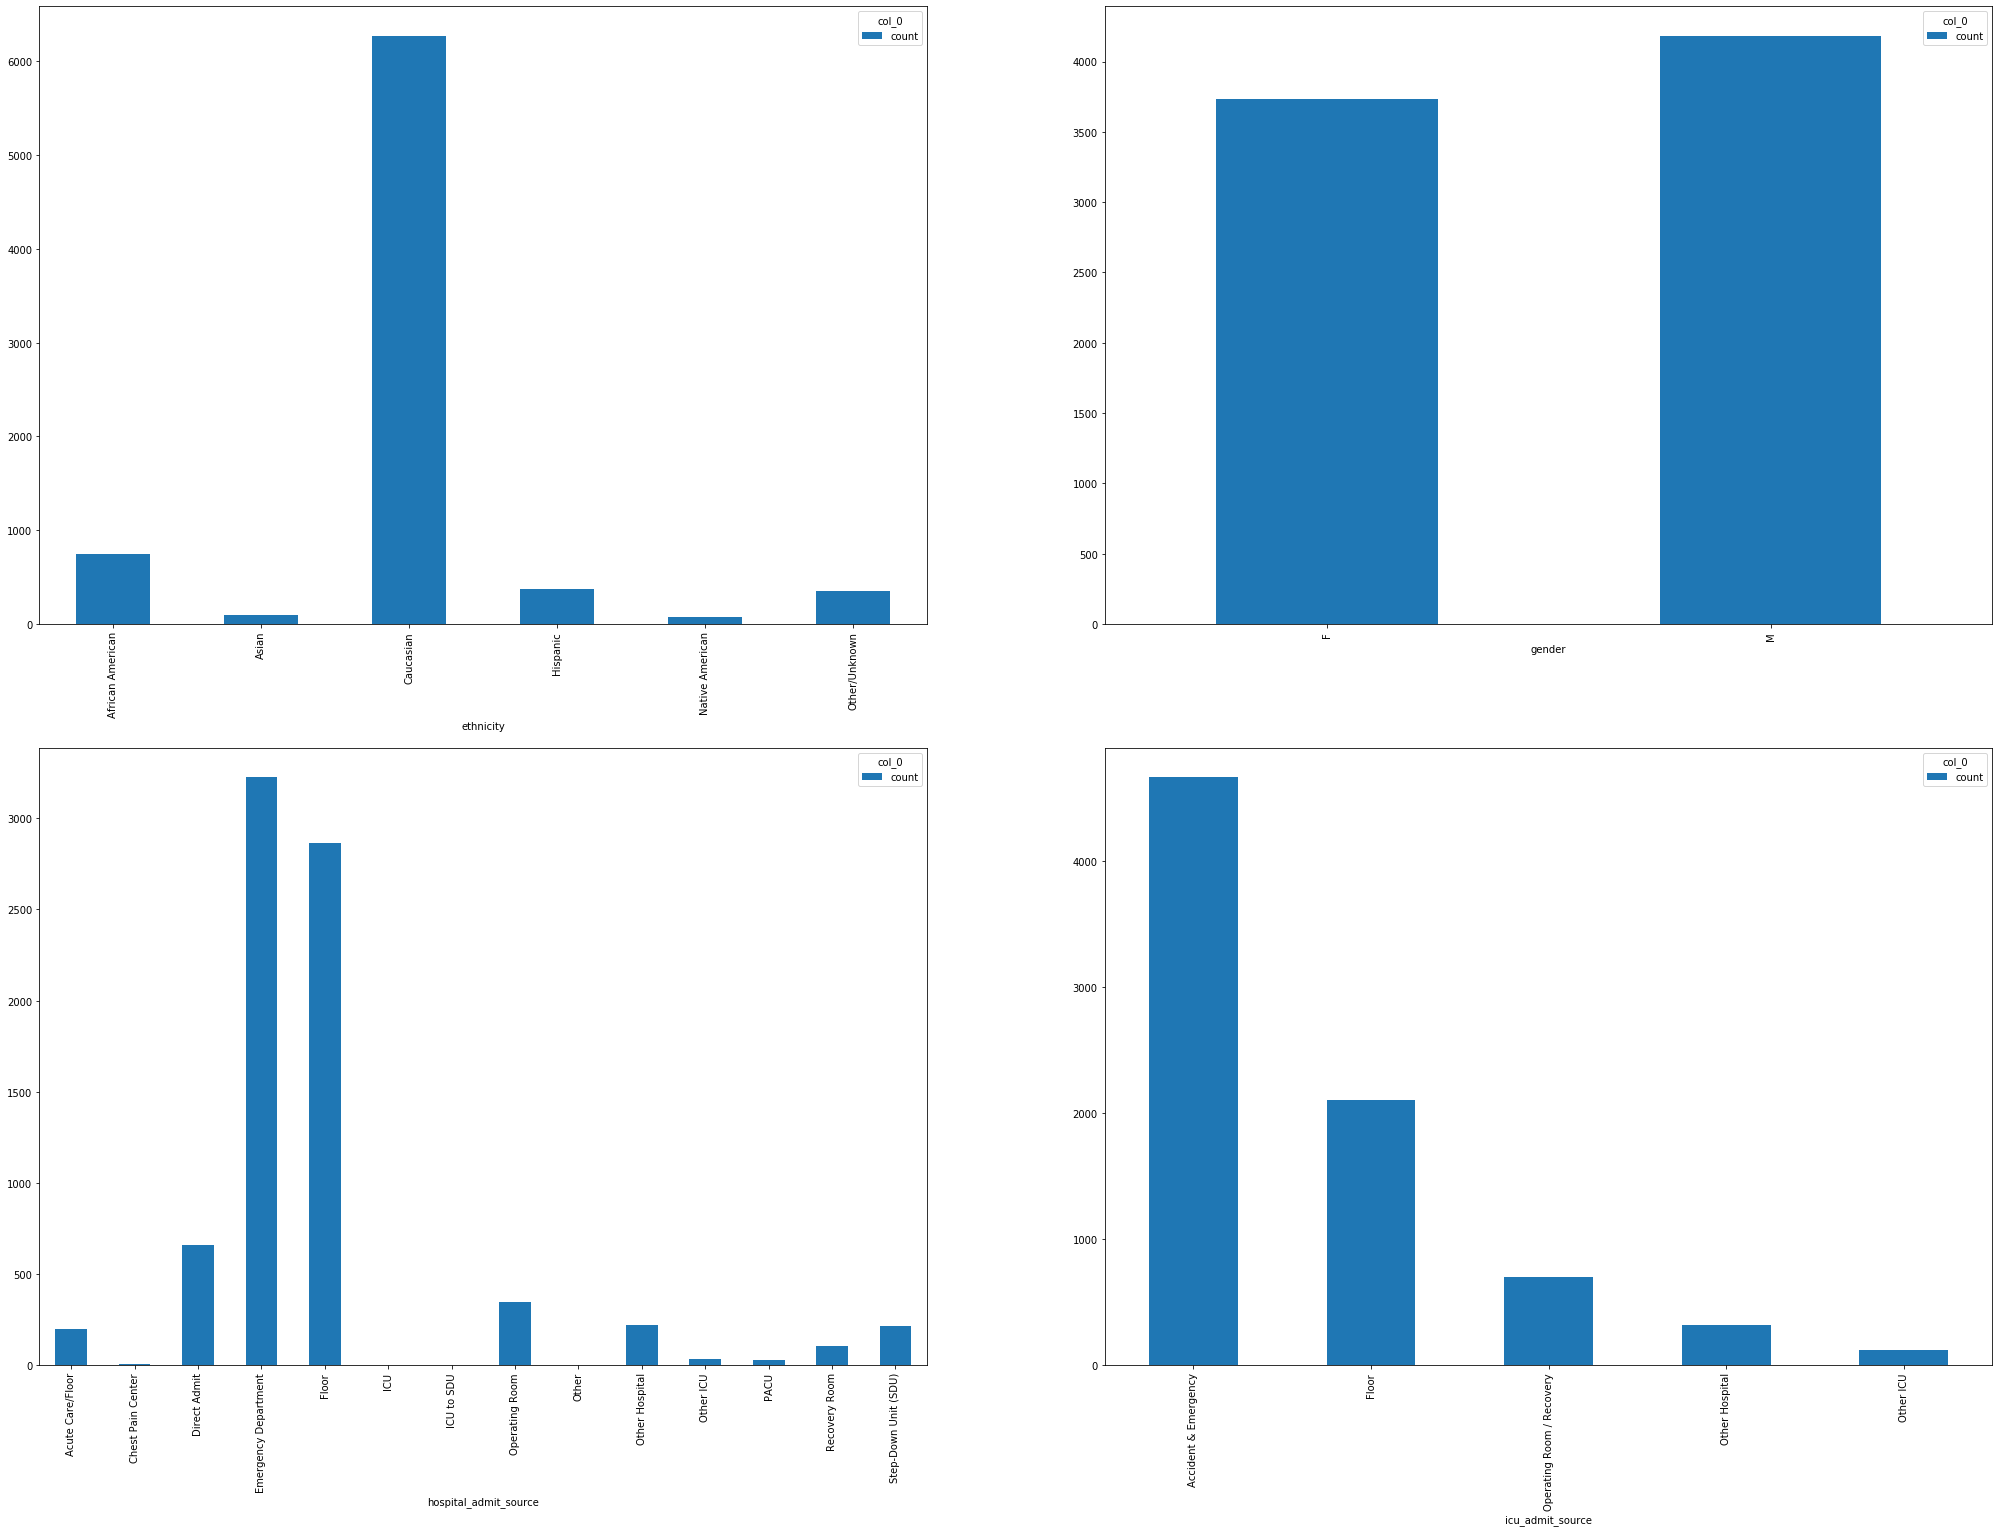

In [110]:
df1 = pd.crosstab(index = patient_yes["ethnicity"],columns="count")    
df2 = pd.crosstab(index = patient_yes["gender"],columns="count")  
df3 = pd.crosstab(index = patient_yes["hospital_admit_source"],columns="count") 
df4 = pd.crosstab(index = patient_yes["icu_admit_source"],columns="count")

plt.figure(figsize=(35,15))
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(35,25))
df1.plot.bar(ax=axes[0,0])
df2.plot.bar(ax=axes[0,1])
df3.plot.bar(ax=axes[1,0])
df4.plot.bar(ax=axes[1,1])


<Figure size 2520x1080 with 0 Axes>

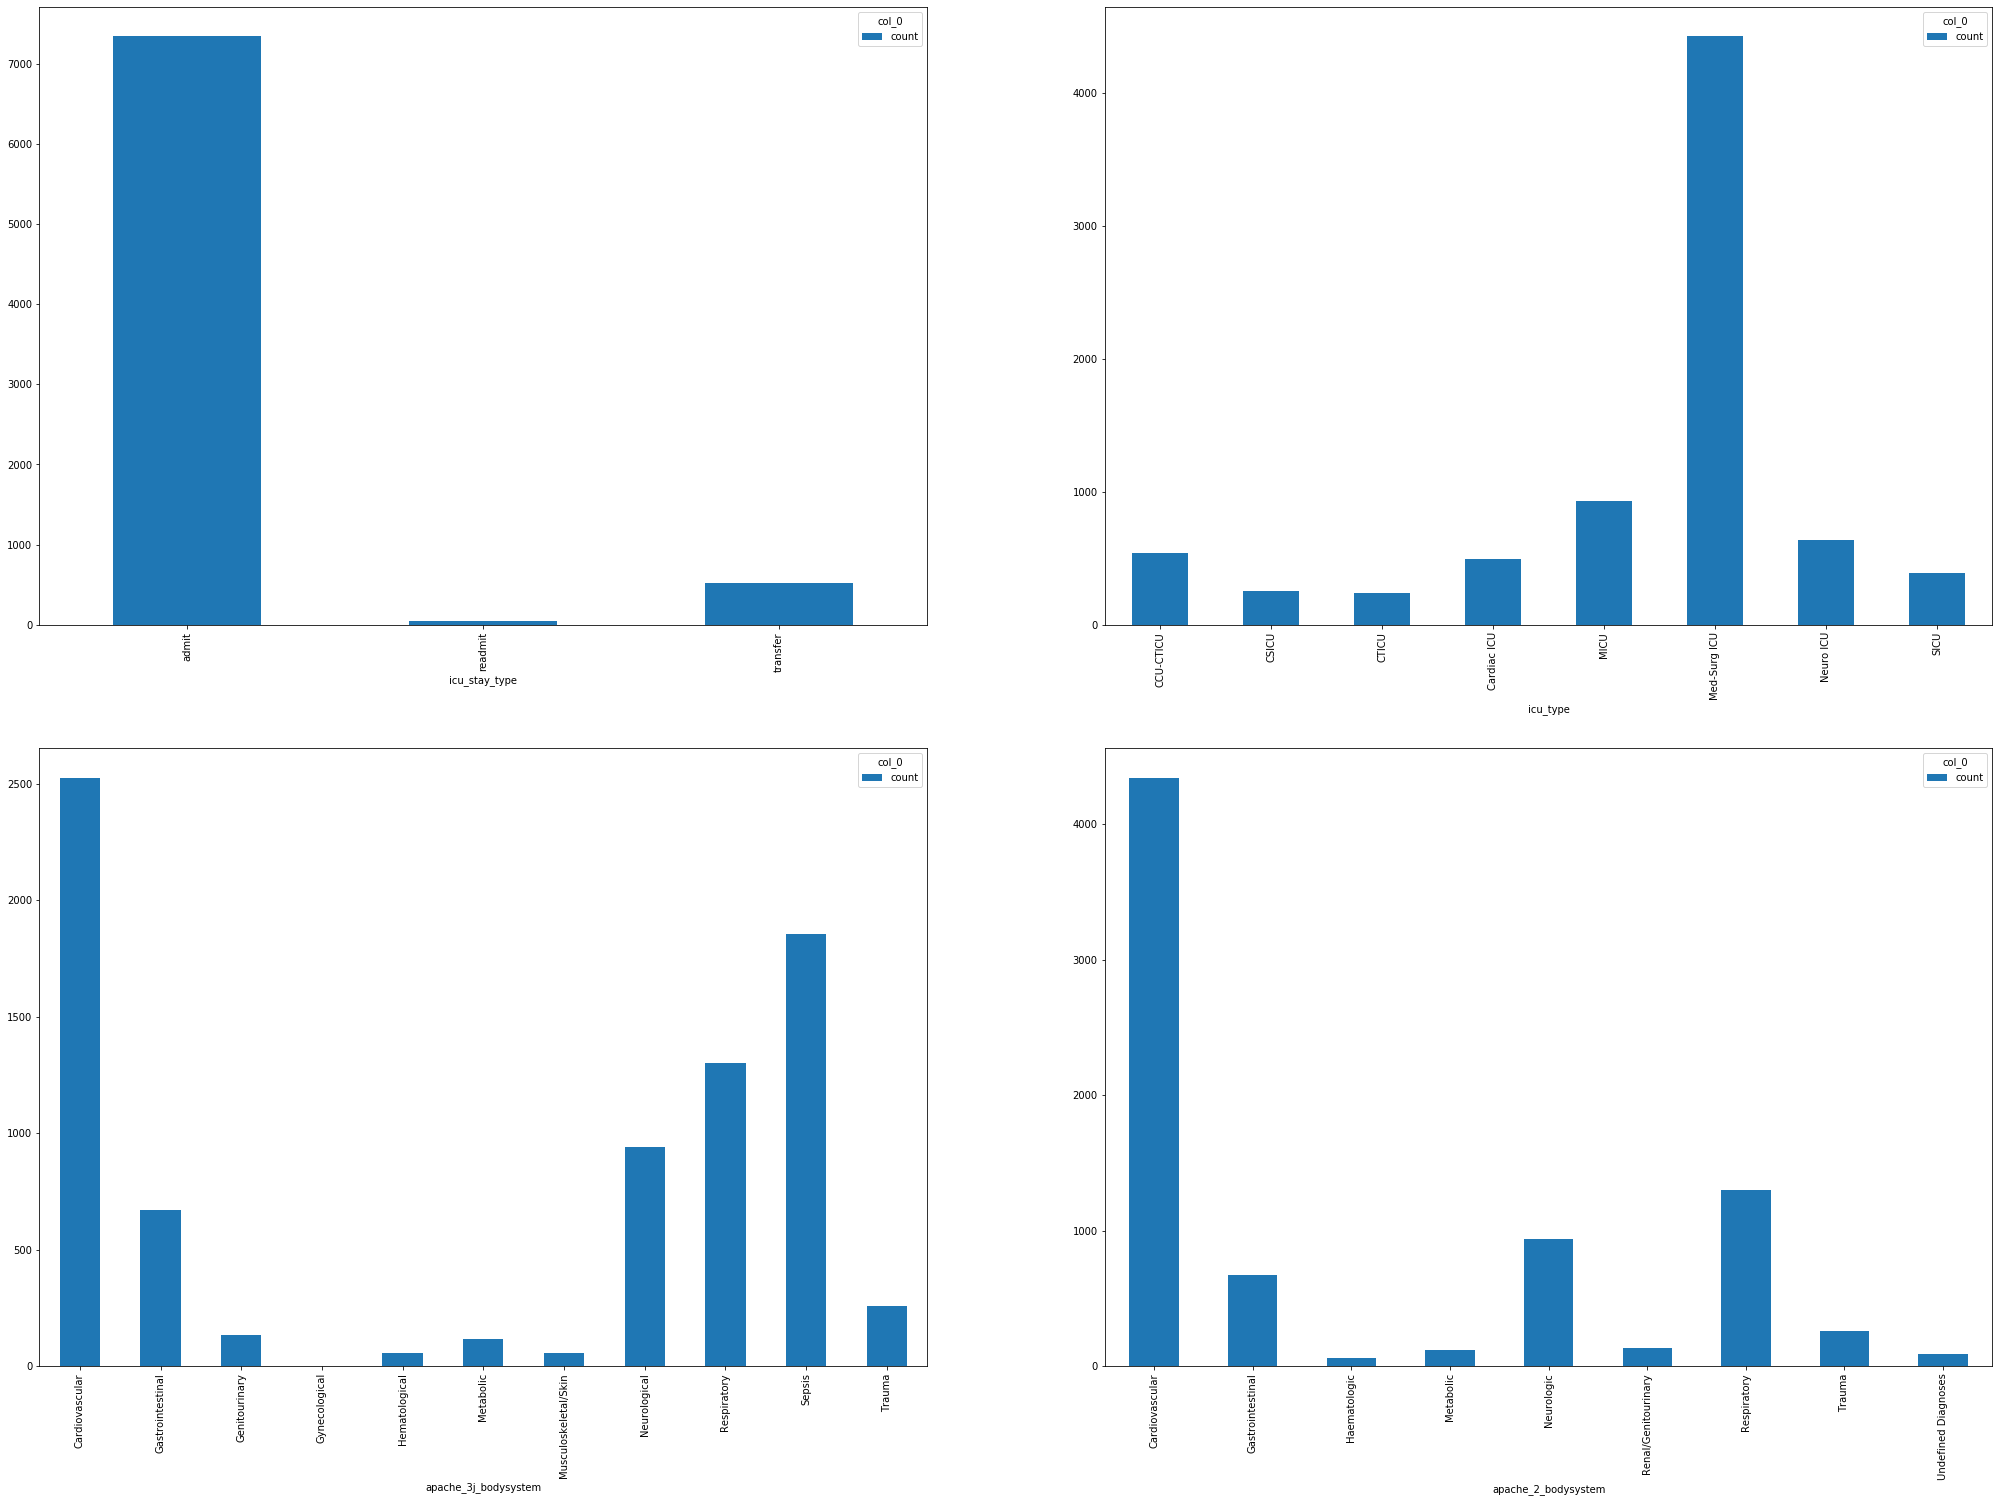

In [111]:
df5 = pd.crosstab(index = patient_yes["icu_stay_type"],columns="count")
df6 = pd.crosstab(index = patient_yes["icu_type"],columns="count")
df7 = pd.crosstab(index = patient_yes["apache_3j_bodysystem"],columns="count")
df8 = pd.crosstab(index = patient_yes["apache_2_bodysystem"],columns="count")

plt.figure(figsize=(35,15))
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(35,25))


df5.plot.bar(ax=axes[0,0])
df6.plot.bar(ax=axes[0,1])
df7.plot.bar(ax=axes[1,0])
df8.plot.bar(ax=axes[1,1])

## Positive and Negative Target Analysis with attributes:

In [112]:
def barPerc(df,xVar,ax):
    
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

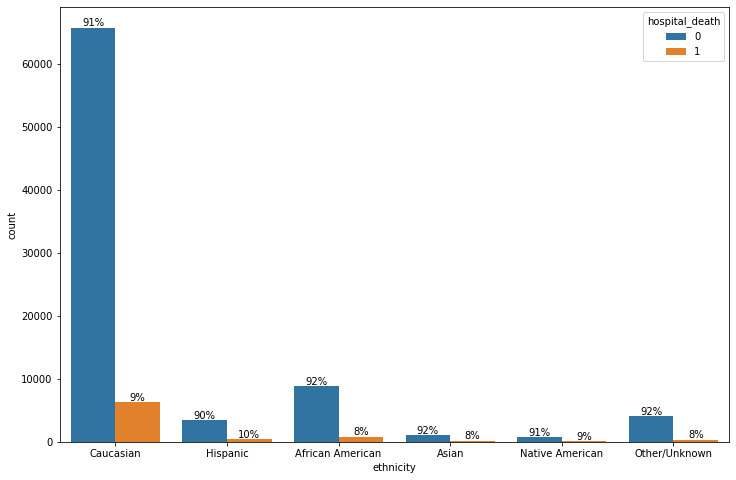

In [113]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="ethnicity",hue='hospital_death',data=patient_records)
barPerc(patient_records,'ethnicity',ax)

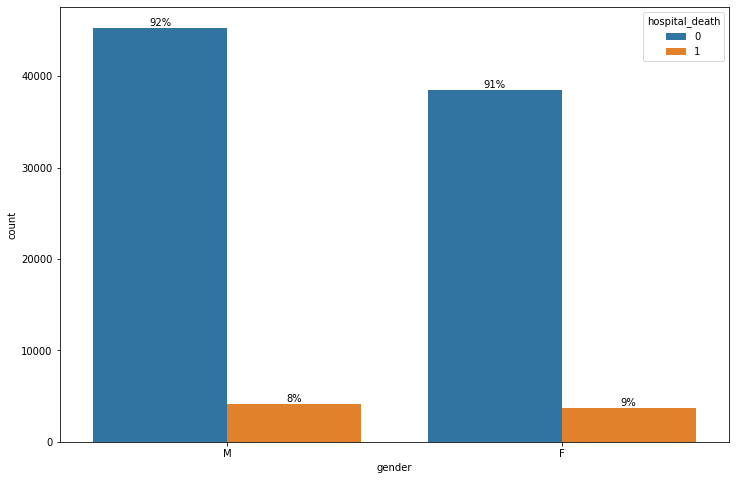

In [114]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="gender",hue='hospital_death',data=patient_records)
barPerc(patient_records,'gender',ax)

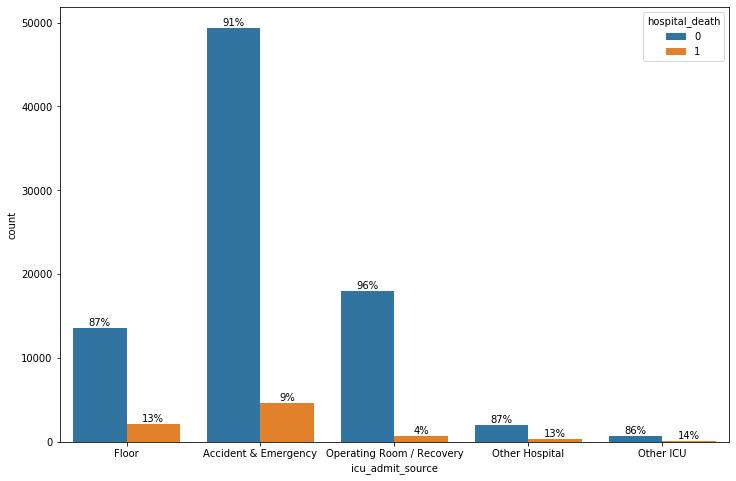

In [115]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="icu_admit_source",hue='hospital_death',data=patient_records)
barPerc(patient_records,'icu_admit_source',ax)

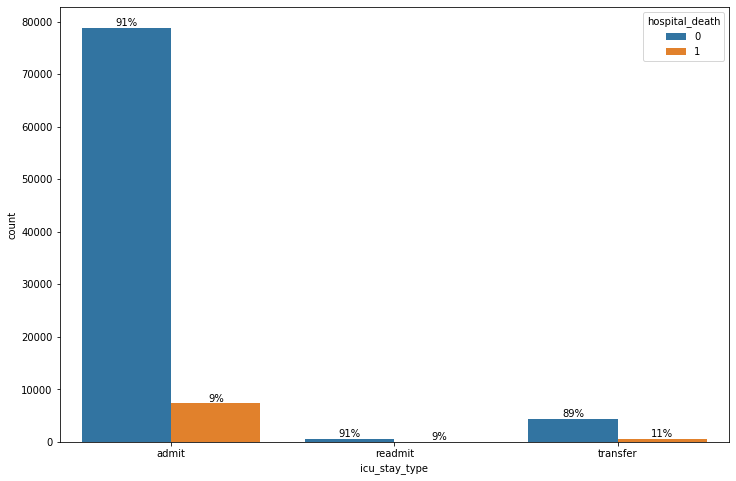

In [116]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="icu_stay_type",hue='hospital_death',data=patient_records)
barPerc(patient_records,'icu_stay_type',ax)

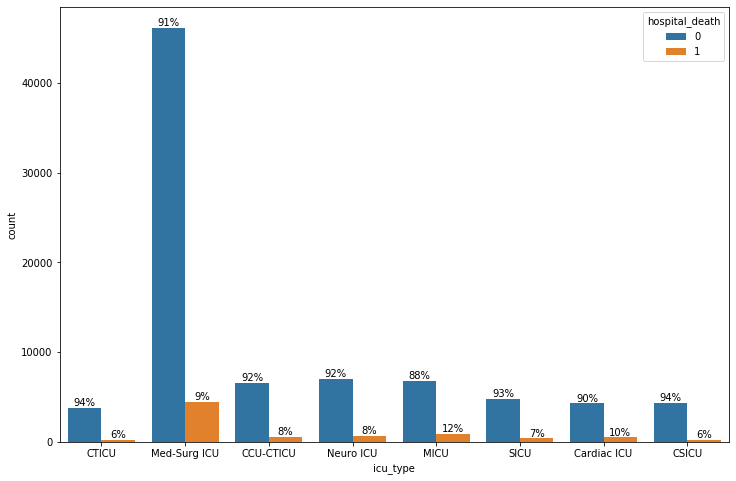

In [117]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="icu_type",hue='hospital_death',data=patient_records)
barPerc(patient_records,'icu_type',ax)

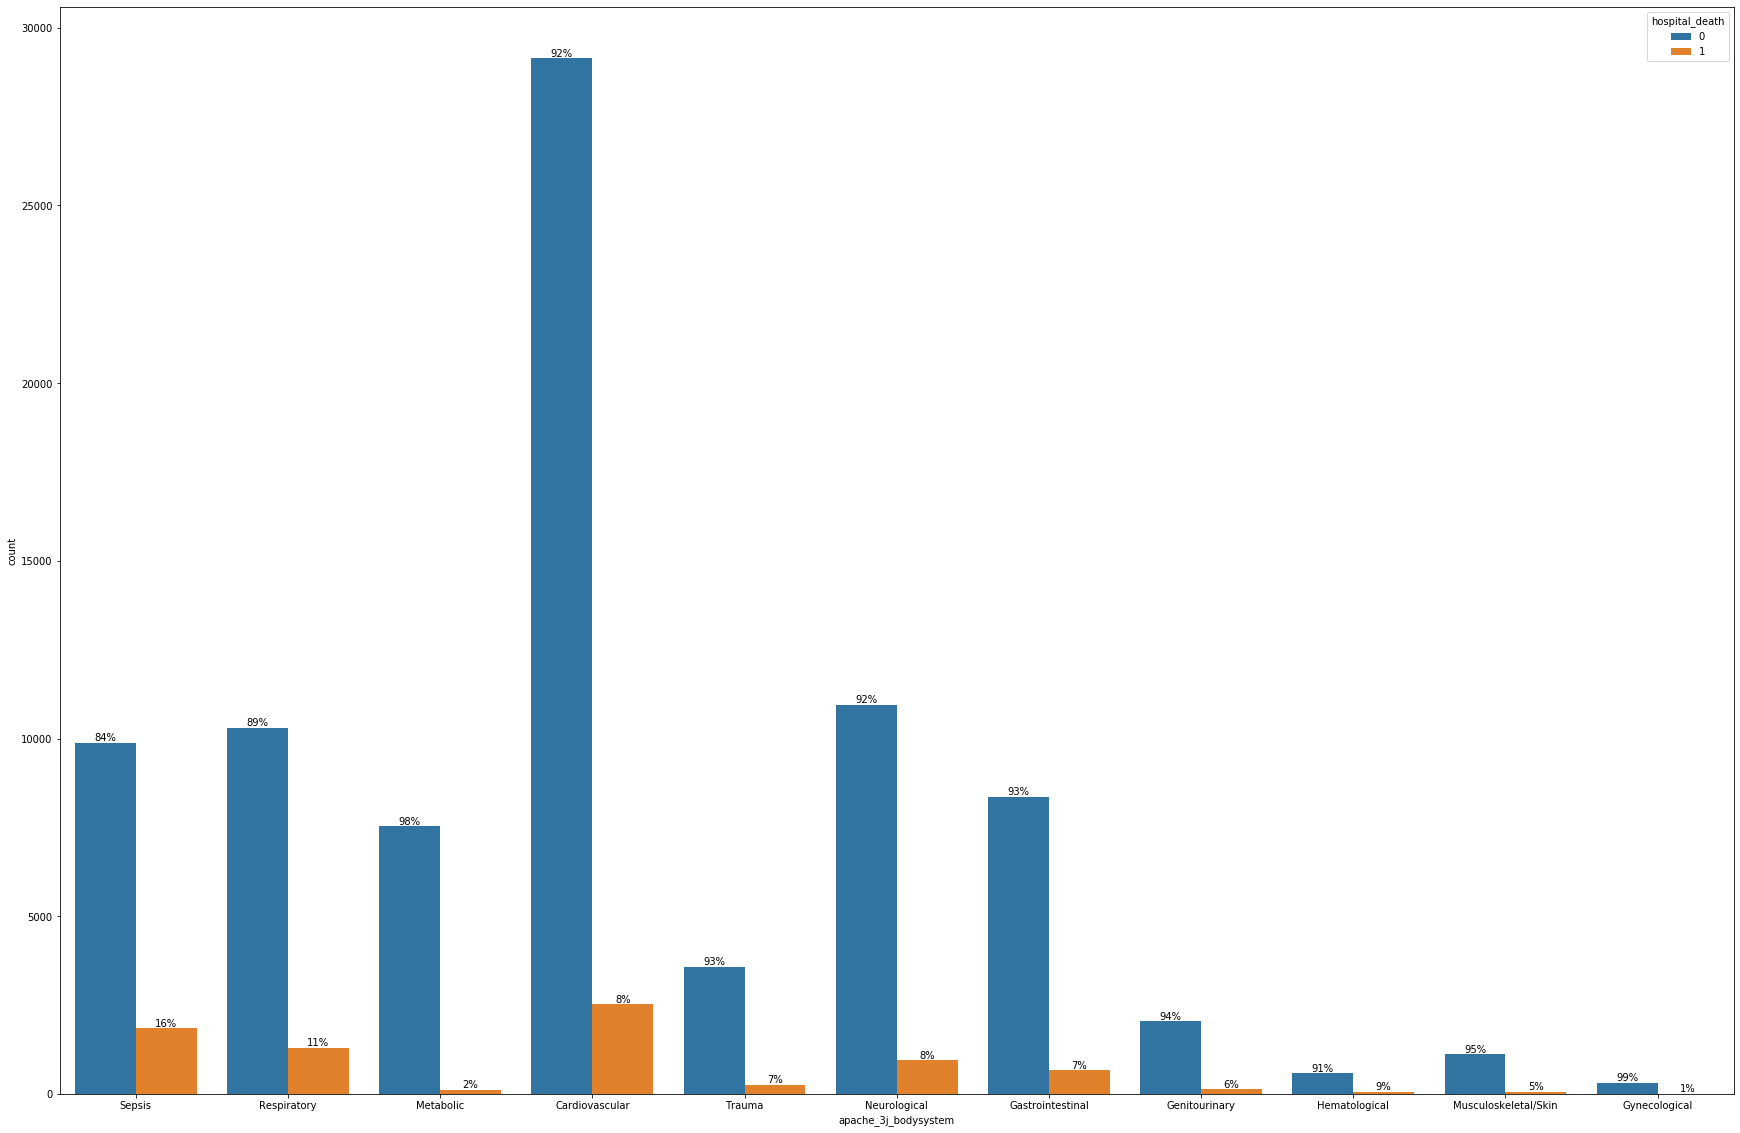

In [118]:
plt.figure(figsize=(30,20))
ax=sns.countplot(x="apache_3j_bodysystem",hue='hospital_death',data=patient_records)
barPerc(patient_records,'apache_3j_bodysystem',ax)

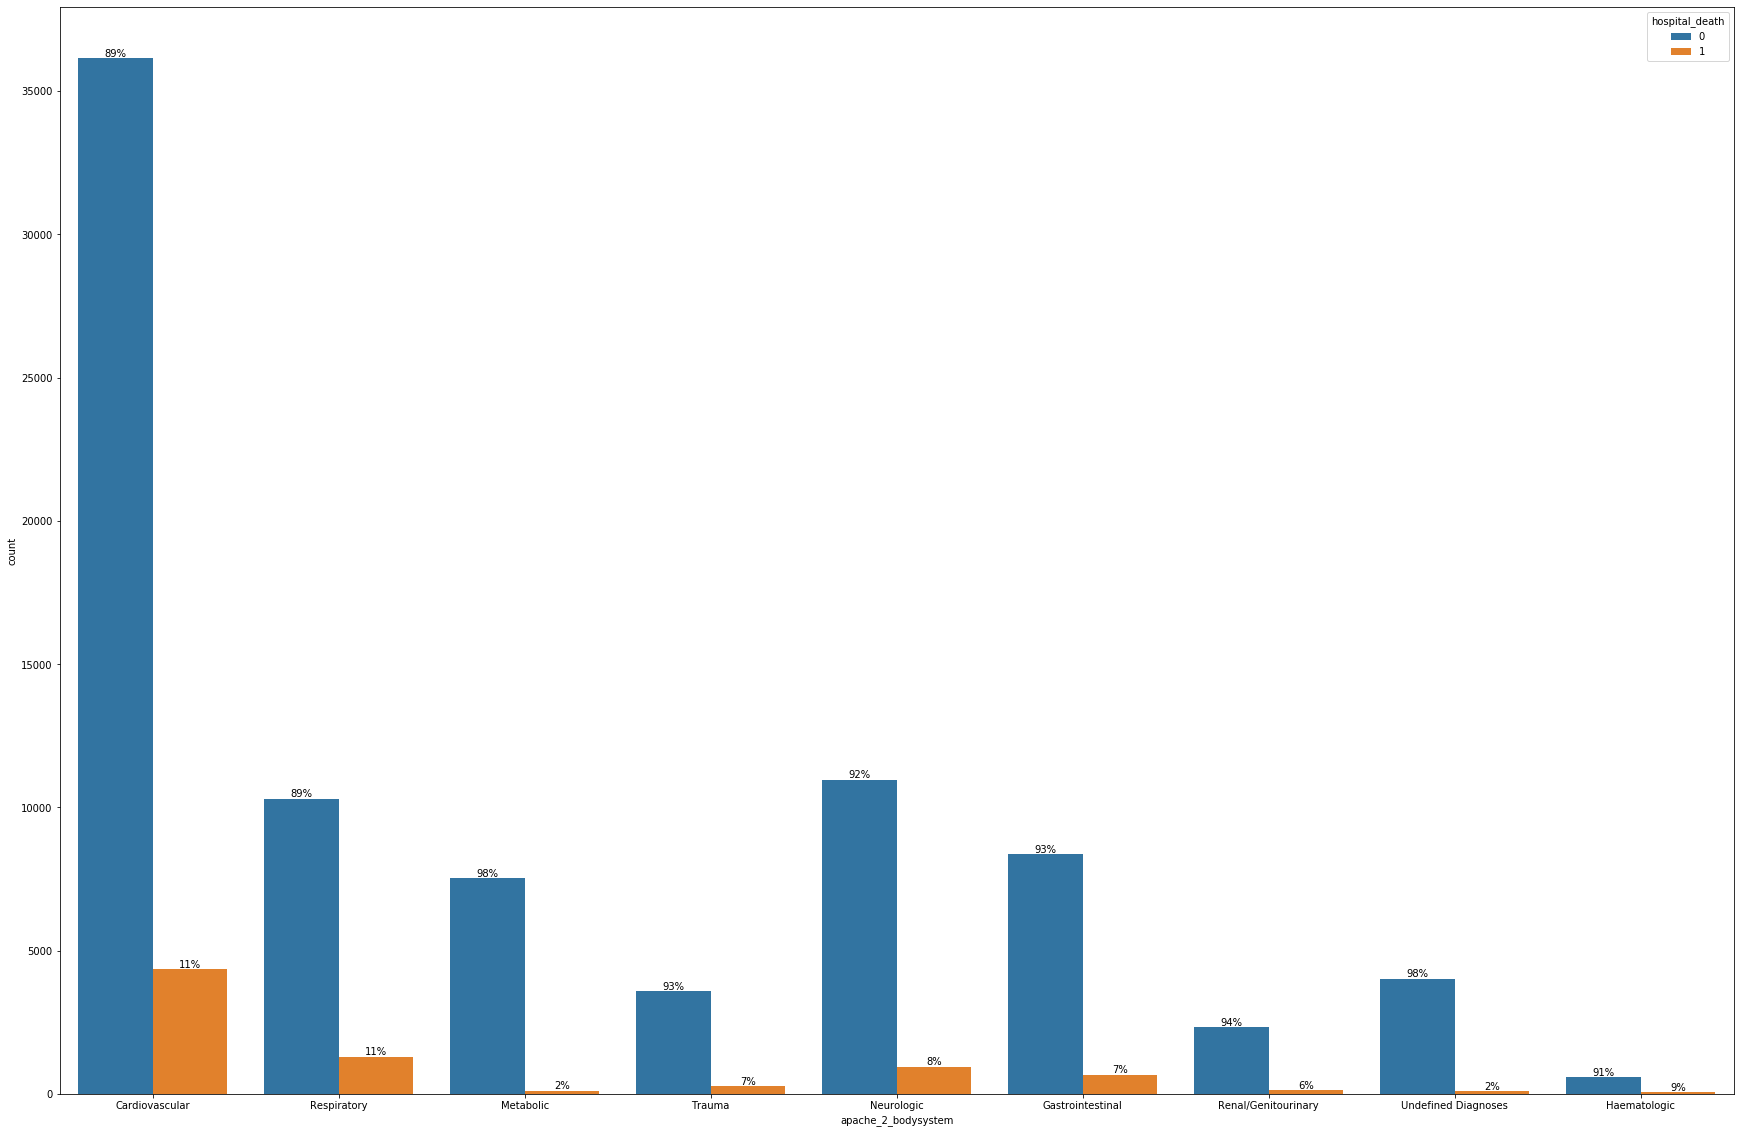

In [119]:
plt.figure(figsize=(30,20))
ax=sns.countplot(x="apache_2_bodysystem",hue='hospital_death',data=patient_records)
barPerc(patient_records,'apache_2_bodysystem',ax)

## Categorical-Categorical Analysis :

bivariate analysis of ethnicity and gender
-----------------------------------------------
gender                F      M
ethnicity                     
African American   4725   4822
Asian               531    598
Caucasian         32986  39093
Hispanic           1784   2012
Native American     383    405
Other/Unknown      1810   2564


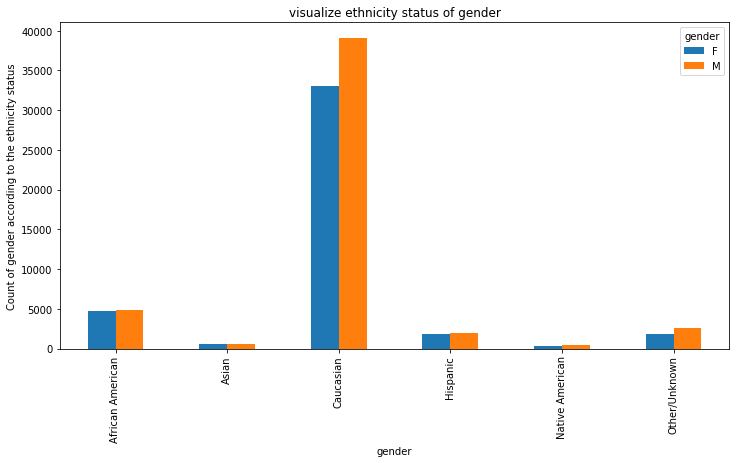

In [120]:
print('bivariate analysis of ethnicity and gender')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['ethnicity'],patient_records['gender']))
pd.crosstab(patient_records['ethnicity'],patient_records['gender']).plot(kind='bar')
plt.title('visualize ethnicity status of gender')
plt.xlabel('gender')
plt.ylabel('Count of gender according to the ethnicity status')
plt.show()

bivariate analysis of ethnicity and hospital_admit_source
-----------------------------------------------
hospital_admit_source  Acute Care/Floor  Chest Pain Center  Direct Admit  \
ethnicity                                                                  
African American                    162                  7           485   
Asian                                14                  0            44   
Caucasian                          1649                119          5538   
Hispanic                             19                  8            82   
Native American                      15                  0            85   
Other/Unknown                        51                  0           207   

hospital_admit_source  Emergency Department  Floor  ICU  ICU to SDU  \
ethnicity                                                             
African American                       4103   3547    0           1   
Asian                                   466    437    0           1   
C

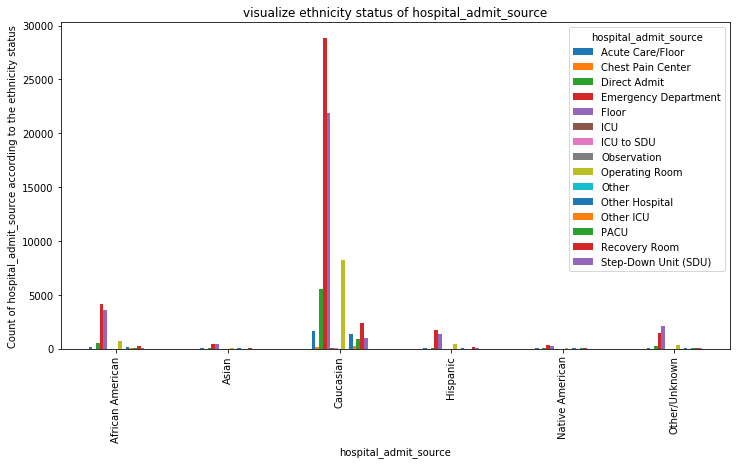

In [121]:
print('bivariate analysis of ethnicity and hospital_admit_source')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['ethnicity'],patient_records['hospital_admit_source']))
pd.crosstab(patient_records['ethnicity'],patient_records['hospital_admit_source']).plot(kind='bar')
plt.title('visualize ethnicity status of hospital_admit_source')
plt.xlabel('hospital_admit_source')
plt.ylabel('Count of hospital_admit_source according to the ethnicity status')
plt.show()

bivariate analysis of ethnicity and icu_admit_source
-----------------------------------------------
icu_admit_source  Accident & Emergency  Floor  Operating Room / Recovery  \
ethnicity                                                                  
African American                  5991   1777                       1482   
Asian                              669    183                        231   
Caucasian                        42017  12168                      15325   
Hispanic                          2188    799                        689   
Native American                    525    112                        113   
Other/Unknown                     2670    684                        873   

icu_admit_source  Other Hospital  Other ICU  
ethnicity                                    
African American             219         78  
Asian                         33         13  
Caucasian                   1874        695  
Hispanic                      77         43  
Native America

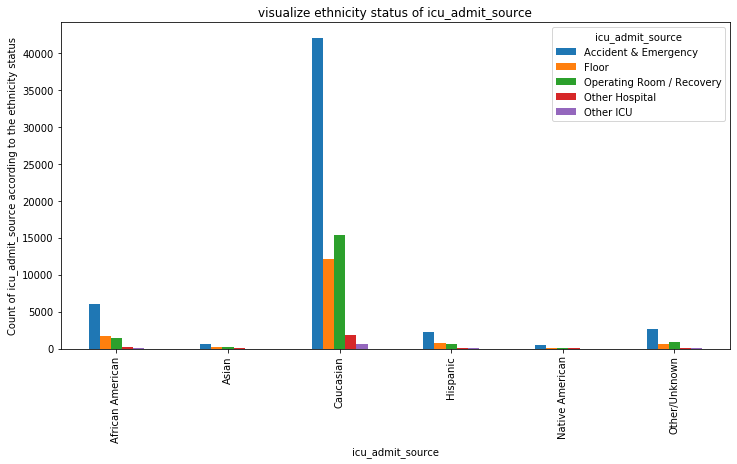

In [122]:
print('bivariate analysis of ethnicity and icu_admit_source')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['ethnicity'],patient_records['icu_admit_source']))
pd.crosstab(patient_records['ethnicity'],patient_records['icu_admit_source']).plot(kind='bar')
plt.title('visualize ethnicity status of icu_admit_source')
plt.xlabel('icu_admit_source')
plt.ylabel('Count of icu_admit_source according to the ethnicity status')
plt.show()

bivariate analysis of ethnicity and icu_stay_type
-----------------------------------------------
icu_stay_type     admit  readmit  transfer
ethnicity                                 
African American   9049       41       457
Asian              1088        4        37
Caucasian         67456      415      4208
Hispanic           3623       75        98
Native American     742        6        40
Other/Unknown      4225       19       130


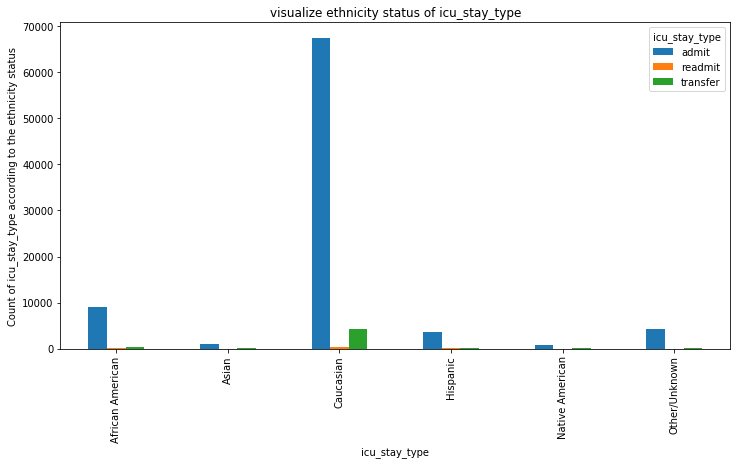

In [123]:
print('bivariate analysis of ethnicity and icu_stay_type')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['ethnicity'],patient_records['icu_stay_type']))
pd.crosstab(patient_records['ethnicity'],patient_records['icu_stay_type']).plot(kind='bar')
plt.title('visualize ethnicity status of icu_stay_type')
plt.xlabel('icu_stay_type')
plt.ylabel('Count of icu_stay_type according to the ethnicity status')
plt.show()

bivariate analysis of ethnicity and icu_type
-----------------------------------------------
icu_type          CCU-CTICU  CSICU  CTICU  Cardiac ICU  MICU  Med-Surg ICU  \
ethnicity                                                                    
African American        649    209    677          816   945          4738   
Asian                    52     48     90           27    80           679   
Caucasian              6134   3973   2692         3472  6209         39412   
Hispanic                118     85    318          315   129          2402   
Native American           5     56     13            6    20           617   
Other/Unknown           198    242    213          140   312          2738   

icu_type          Neuro ICU  SICU  
ethnicity                          
African American        782   731  
Asian                   100    53  
Caucasian              6074  4113  
Hispanic                353    76  
Native American          59    12  
Other/Unknown           307   

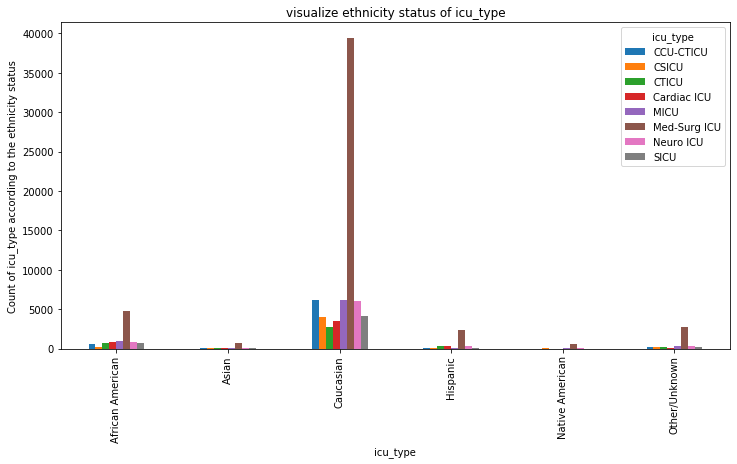

In [124]:
print('bivariate analysis of ethnicity and icu_type')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['ethnicity'],patient_records['icu_type']))
pd.crosstab(patient_records['ethnicity'],patient_records['icu_type']).plot(kind='bar')
plt.title('visualize ethnicity status of icu_type')
plt.xlabel('icu_type')
plt.ylabel('Count of icu_type according to the ethnicity status')
plt.show()

bivariate analysis of ethnicity and apache_3j_bodysystem
-----------------------------------------------
apache_3j_bodysystem  Cardiovascular  Gastrointestinal  Genitourinary  \
ethnicity                                                               
African American                3210               816            308   
Asian                            352               127             36   
Caucasian                      25225              7115           1584   
Hispanic                        1249               409            111   
Native American                  147               100             22   
Other/Unknown                   1478               459            111   

apache_3j_bodysystem  Gynecological  Hematological  Metabolic  \
ethnicity                                                       
African American                 61            111        909   
Asian                             9             12         75   
Caucasian                       188            438

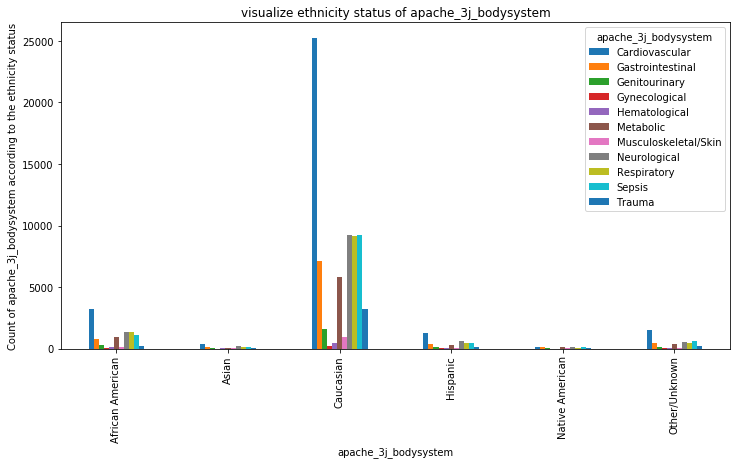

In [125]:
print('bivariate analysis of ethnicity and apache_3j_bodysystem')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['ethnicity'],patient_records['apache_3j_bodysystem']))
pd.crosstab(patient_records['ethnicity'],patient_records['apache_3j_bodysystem']).plot(kind='bar')
plt.title('visualize ethnicity status of apache_3j_bodysystem')
plt.xlabel('apache_3j_bodysystem')
plt.ylabel('Count of apache_3j_bodysystem according to the ethnicity status')
plt.show()

bivariate analysis of ethnicity and apache_2_bodysystem
-----------------------------------------------
apache_2_bodysystem  Cardiovascular  Gastrointestinal  Haematologic  \
ethnicity                                                             
African American               4176               816           111   
Asian                           476               127            12   
Caucasian                     32028              7115           438   
Hispanic                       1582               409            37   
Native American                 278               100            10   
Other/Unknown                  1938               459            30   

apache_2_bodysystem  Metabolic  Neurologic  Renal/Genitourinary  Respiratory  \
ethnicity                                                                      
African American           909        1314                  365         1318   
Asian                       75         177                   43          128   
Caucasi

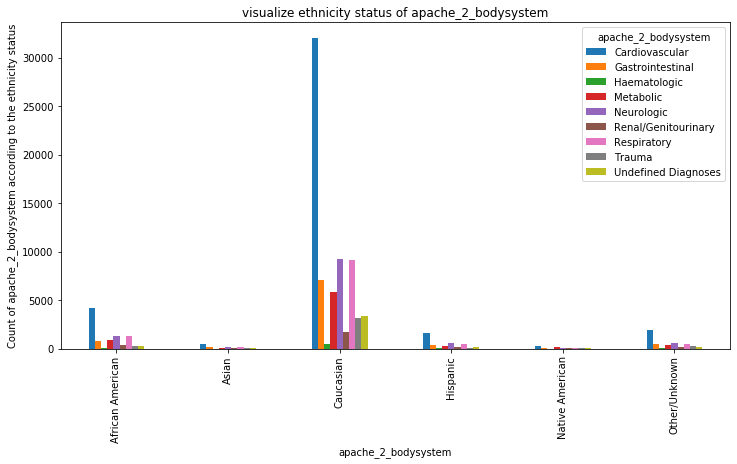

In [126]:
print('bivariate analysis of ethnicity and apache_2_bodysystem')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['ethnicity'],patient_records['apache_2_bodysystem']))
pd.crosstab(patient_records['ethnicity'],patient_records['apache_2_bodysystem']).plot(kind='bar')
plt.title('visualize ethnicity status of apache_2_bodysystem')
plt.xlabel('apache_2_bodysystem')
plt.ylabel('Count of apache_2_bodysystem according to the ethnicity status')
plt.show()

bivariate analysis of gender and hospital_admit_source
-----------------------------------------------
hospital_admit_source  Acute Care/Floor  Chest Pain Center  Direct Admit  \
gender                                                                     
F                                   931                 50          2854   
M                                   979                 84          3587   

hospital_admit_source  Emergency Department  Floor  ICU  ICU to SDU  \
gender                                                                
F                                     17225  13952   16          23   
M                                     19737  15512   19          22   

hospital_admit_source  Observation  Operating Room  Other  Other Hospital  \
gender                                                                      
F                                2            3895      5             737   
M                                8            5892      2             904   

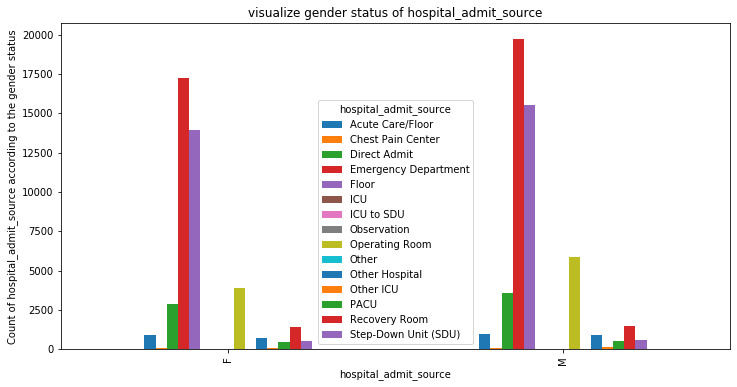

In [127]:
print('bivariate analysis of gender and hospital_admit_source')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['gender'],patient_records['hospital_admit_source']))
pd.crosstab(patient_records['gender'],patient_records['hospital_admit_source']).plot(kind='bar')
plt.title('visualize gender status of hospital_admit_source')
plt.xlabel('hospital_admit_source')
plt.ylabel('Count of hospital_admit_source according to the gender status')
plt.show()

bivariate analysis of gender and icu_admit_source
-----------------------------------------------
icu_admit_source  Accident & Emergency  Floor  Operating Room / Recovery  \
gender                                                                     
F                                25122   7603                       8065   
M                                28938   8120                      10648   

icu_admit_source  Other Hospital  Other ICU  
gender                                       
F                           1037        392  
M                           1321        467  


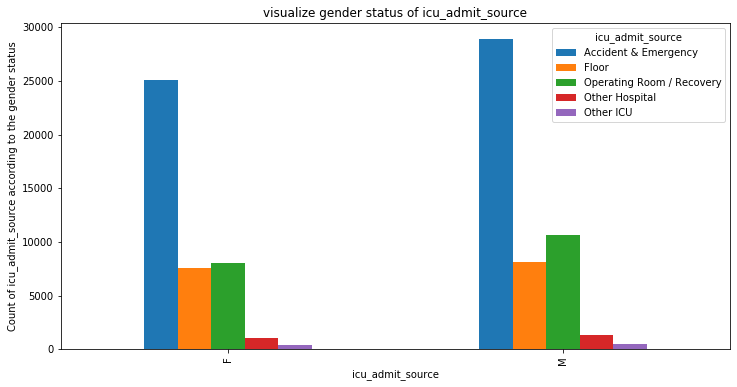

In [128]:
print('bivariate analysis of gender and icu_admit_source')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['gender'],patient_records['icu_admit_source']))
pd.crosstab(patient_records['gender'],patient_records['icu_admit_source']).plot(kind='bar')
plt.title('visualize gender status of icu_admit_source')
plt.xlabel('icu_admit_source')
plt.ylabel('Count of icu_admit_source according to the gender status')
plt.show()

bivariate analysis of gender and icu_stay_type
-----------------------------------------------
icu_stay_type  admit  readmit  transfer
gender                                 
F              39556      243      2420
M              46627      317      2550


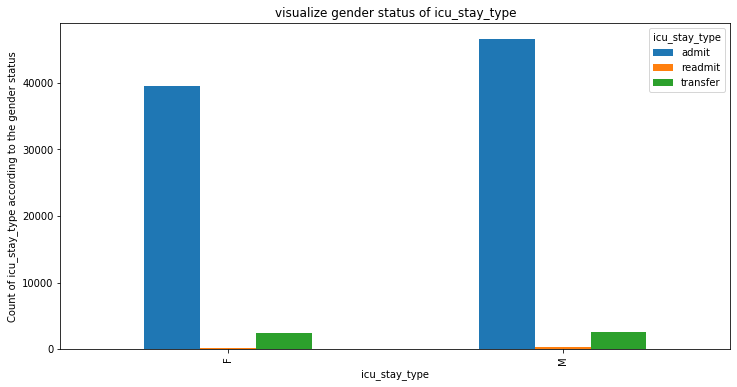

In [129]:
print('bivariate analysis of gender and icu_stay_type')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['gender'],patient_records['icu_stay_type']))
pd.crosstab(patient_records['gender'],patient_records['icu_stay_type']).plot(kind='bar')
plt.title('visualize gender status of icu_stay_type')
plt.xlabel('icu_stay_type')
plt.ylabel('Count of icu_stay_type according to the gender status')
plt.show()

bivariate analysis of gender and icu_type
-----------------------------------------------
icu_type  CCU-CTICU  CSICU  CTICU  Cardiac ICU  MICU  Med-Surg ICU  Neuro ICU  \
gender                                                                          
F              2913   1873   1485         2063  3669         24270       3692   
M              4243   2740   2518         2713  4026         26316       3983   

icu_type  SICU  
gender          
F         2254  
M         2955  


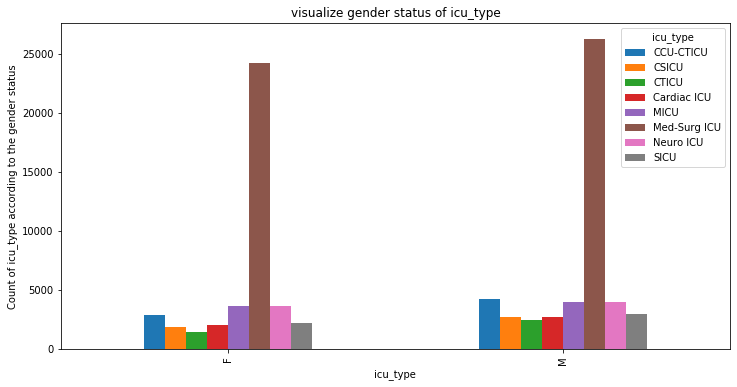

In [130]:
print('bivariate analysis of gender and icu_type')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['gender'],patient_records['icu_type']))
pd.crosstab(patient_records['gender'],patient_records['icu_type']).plot(kind='bar')
plt.title('visualize gender status of icu_type')
plt.xlabel('icu_type')
plt.ylabel('Count of icu_type according to the gender status')
plt.show()

bivariate analysis of gender and apache_3j_bodysystem
-----------------------------------------------
apache_3j_bodysystem  Cardiovascular  Gastrointestinal  Genitourinary  \
gender                                                                  
F                              12945              4169           1109   
M                              18716              4857           1063   

apache_3j_bodysystem  Gynecological  Hematological  Metabolic  \
gender                                                          
F                               313            336       3837   
M                                 0            302       3813   

apache_3j_bodysystem  Musculoskeletal/Skin  Neurological  Respiratory  Sepsis  \
gender                                                                          
F                                      582          5908         5805    5786   
M                                      584          5988         5804    5954   

apache_3j_bodysyste

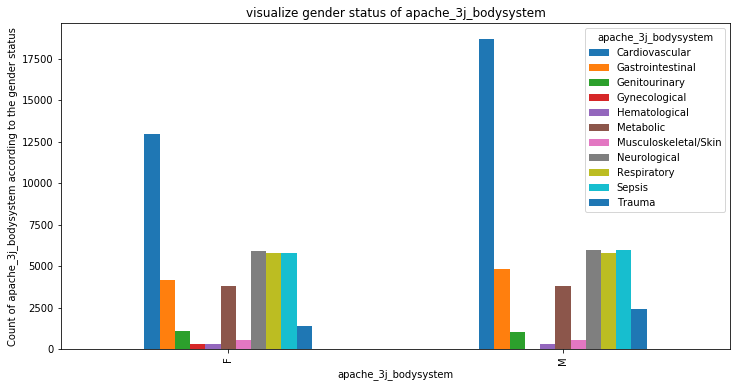

In [131]:
print('bivariate analysis of gender and apache_3j_bodysystem')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['gender'],patient_records['apache_3j_bodysystem']))
pd.crosstab(patient_records['gender'],patient_records['apache_3j_bodysystem']).plot(kind='bar')
plt.title('visualize gender status of apache_3j_bodysystem')
plt.xlabel('apache_3j_bodysystem')
plt.ylabel('Count of apache_3j_bodysystem according to the gender status')
plt.show()

bivariate analysis of gender and apache_2_bodysystem
-----------------------------------------------
apache_2_bodysystem  Cardiovascular  Gastrointestinal  Haematologic  \
gender                                                                
F                             18034              4169           336   
M                             22444              4857           302   

apache_2_bodysystem  Metabolic  Neurologic  Renal/Genitourinary  Respiratory  \
gender                                                                         
F                         3837        5908                 1397         5805   
M                         3813        5988                 1063         5804   

apache_2_bodysystem  Trauma  Undefined Diagnoses  
gender                                            
F                      1429                 1304  
M                      2413                 2810  


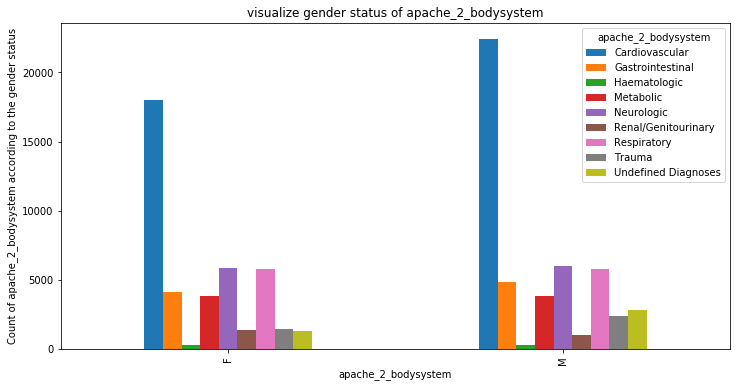

In [132]:
print('bivariate analysis of gender and apache_2_bodysystem')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['gender'],patient_records['apache_2_bodysystem']))
pd.crosstab(patient_records['gender'],patient_records['apache_2_bodysystem']).plot(kind='bar')
plt.title('visualize gender status of apache_2_bodysystem')
plt.xlabel('apache_2_bodysystem')
plt.ylabel('Count of apache_2_bodysystem according to the gender status')
plt.show()

bivariate analysis of hospital_admit_source and icu_admit_source
-----------------------------------------------
icu_admit_source       Accident & Emergency  Floor  Operating Room / Recovery  \
hospital_admit_source                                                           
Acute Care/Floor                         30   1722                        144   
Chest Pain Center                         4    122                          5   
Direct Admit                           5749    158                        351   
Emergency Department                  35193    733                        752   
Floor                                 12785  11697                       4077   
ICU                                       8      0                          7   
ICU to SDU                                0      7                         21   
Observation                               1      5                          4   
Operating Room                          141    143                       9447

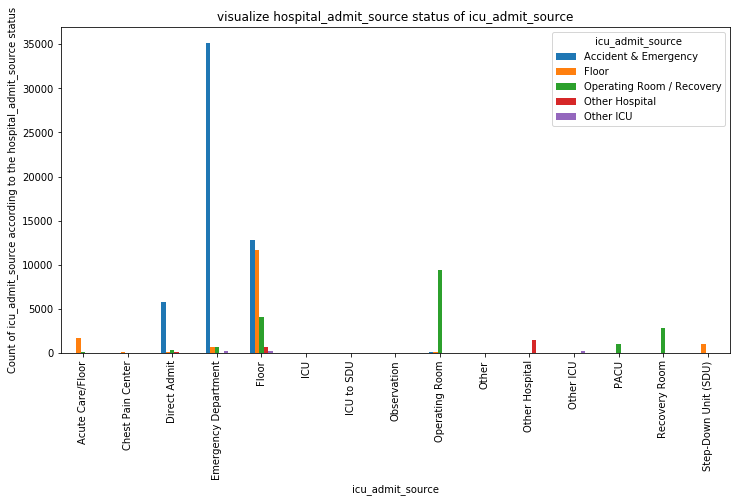

In [133]:
print('bivariate analysis of hospital_admit_source and icu_admit_source')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['hospital_admit_source'],patient_records['icu_admit_source']))
pd.crosstab(patient_records['hospital_admit_source'],patient_records['icu_admit_source']).plot(kind='bar')
plt.title('visualize hospital_admit_source status of icu_admit_source')
plt.xlabel('icu_admit_source')
plt.ylabel('Count of icu_admit_source according to the hospital_admit_source status')
plt.show()

bivariate analysis of hospital_admit_source and icu_stay_type
-----------------------------------------------
icu_stay_type          admit  readmit  transfer
hospital_admit_source                          
Acute Care/Floor        1868        8        34
Chest Pain Center        134        0         0
Direct Admit            6302       33       106
Emergency Department   35775      183      1004
Floor                  25513      270      3681
ICU                       34        0         1
ICU to SDU                45        0         0
Observation               10        0         0
Operating Room          9677       43        67
Other                      7        0         0
Other Hospital          1616        5        20
Other ICU                227        2         4
PACU                    1003        1        13
Recovery Room           2866       11        19
Step-Down Unit (SDU)    1106        4        21


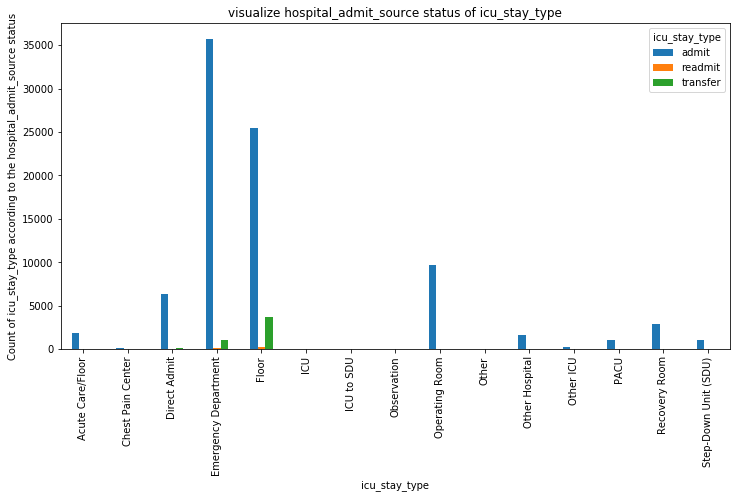

In [134]:
print('bivariate analysis of hospital_admit_source and icu_stay_type')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['hospital_admit_source'],patient_records['icu_stay_type']))
pd.crosstab(patient_records['hospital_admit_source'],patient_records['icu_stay_type']).plot(kind='bar')
plt.title('visualize hospital_admit_source status of icu_stay_type')
plt.xlabel('icu_stay_type')
plt.ylabel('Count of icu_stay_type according to the hospital_admit_source status')
plt.show()

bivariate analysis of hospital_admit_source and icu_type
-----------------------------------------------
icu_type               CCU-CTICU  CSICU  CTICU  Cardiac ICU  MICU  \
hospital_admit_source                                               
Acute Care/Floor             139    121     68           89   134   
Chest Pain Center             67      0      0            2    26   
Direct Admit                 743    244    285          449   531   
Emergency Department        2582   1231    603         2002  3313   
Floor                       1973   1049    942         1863  2948   
ICU                            0      3      0            7     2   
ICU to SDU                     4      1     10            1     2   
Observation                    0      3      0            1     1   
Operating Room               950   1525   1778          160   199   
Other                          2      0      0            1     0   
Other Hospital               251     56    105           46   178  

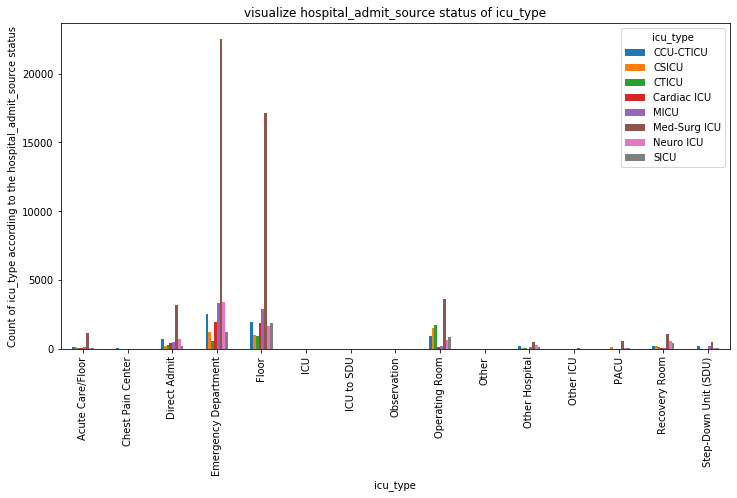

In [135]:
print('bivariate analysis of hospital_admit_source and icu_type')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['hospital_admit_source'],patient_records['icu_type']))
pd.crosstab(patient_records['hospital_admit_source'],patient_records['icu_type']).plot(kind='bar')
plt.title('visualize hospital_admit_source status of icu_type')
plt.xlabel('icu_type')
plt.ylabel('Count of icu_type according to the hospital_admit_source status')
plt.show()

bivariate analysis of hospital_admit_source and apache_3j_bodysystem
-----------------------------------------------
apache_3j_bodysystem   Cardiovascular  Gastrointestinal  Genitourinary  \
hospital_admit_source                                                    
Acute Care/Floor                  730               184             42   
Chest Pain Center                 114                 5              0   
Direct Admit                     2694               419            147   
Emergency Department            10046              3122            806   
Floor                            9715              2987            774   
ICU                                12                 3              1   
ICU to SDU                         23                 9              0   
Observation                         6                 2              0   
Operating Room                   6089              1263            187   
Other                               5                 0              

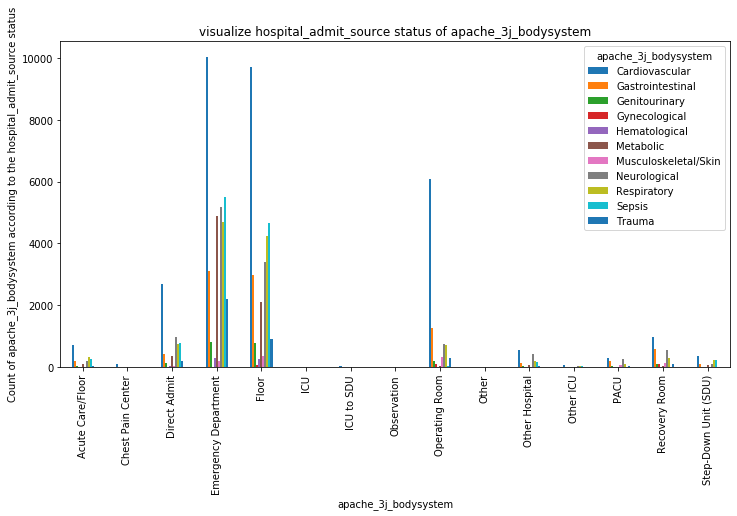

In [136]:
print('bivariate analysis of hospital_admit_source and apache_3j_bodysystem')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['hospital_admit_source'],patient_records['apache_3j_bodysystem']))
pd.crosstab(patient_records['hospital_admit_source'],patient_records['apache_3j_bodysystem']).plot(kind='bar')
plt.title('visualize hospital_admit_source status of apache_3j_bodysystem')
plt.xlabel('apache_3j_bodysystem')
plt.ylabel('Count of apache_3j_bodysystem according to the hospital_admit_source status')
plt.show()

bivariate analysis of hospital_admit_source and apache_2_bodysystem
-----------------------------------------------
apache_2_bodysystem    Cardiovascular  Gastrointestinal  Haematologic  \
hospital_admit_source                                                   
Acute Care/Floor                  976               184            19   
Chest Pain Center                 115                 5             1   
Direct Admit                     3372               419            42   
Emergency Department            15464              3122           303   
Floor                           13729              2987           248   
ICU                                15                 3             0   
ICU to SDU                         20                 9             0   
Observation                         4                 2             0   
Operating Room                   4218              1263             6   
Other                               5                 0             1   
Other Ho

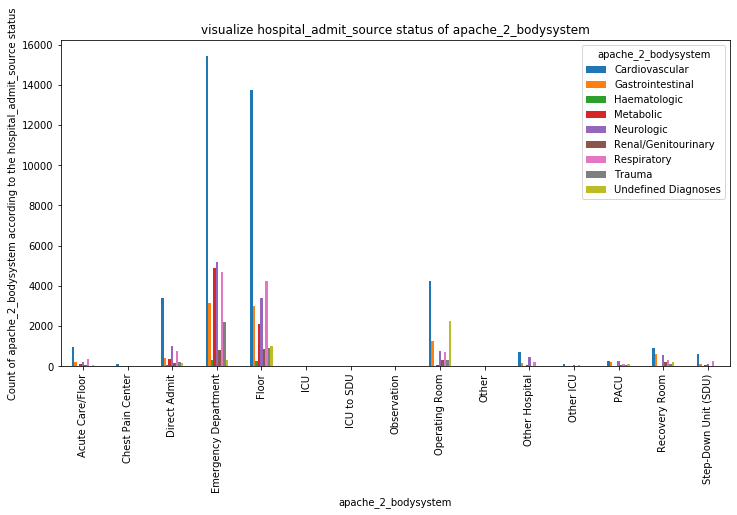

In [137]:
print('bivariate analysis of hospital_admit_source and apache_2_bodysystem')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['hospital_admit_source'],patient_records['apache_2_bodysystem']))
pd.crosstab(patient_records['hospital_admit_source'],patient_records['apache_2_bodysystem']).plot(kind='bar')
plt.title('visualize hospital_admit_source status of apache_2_bodysystem')
plt.xlabel('apache_2_bodysystem')
plt.ylabel('Count of apache_2_bodysystem according to the hospital_admit_source status')
plt.show()

## Numerical- Target Analysis :

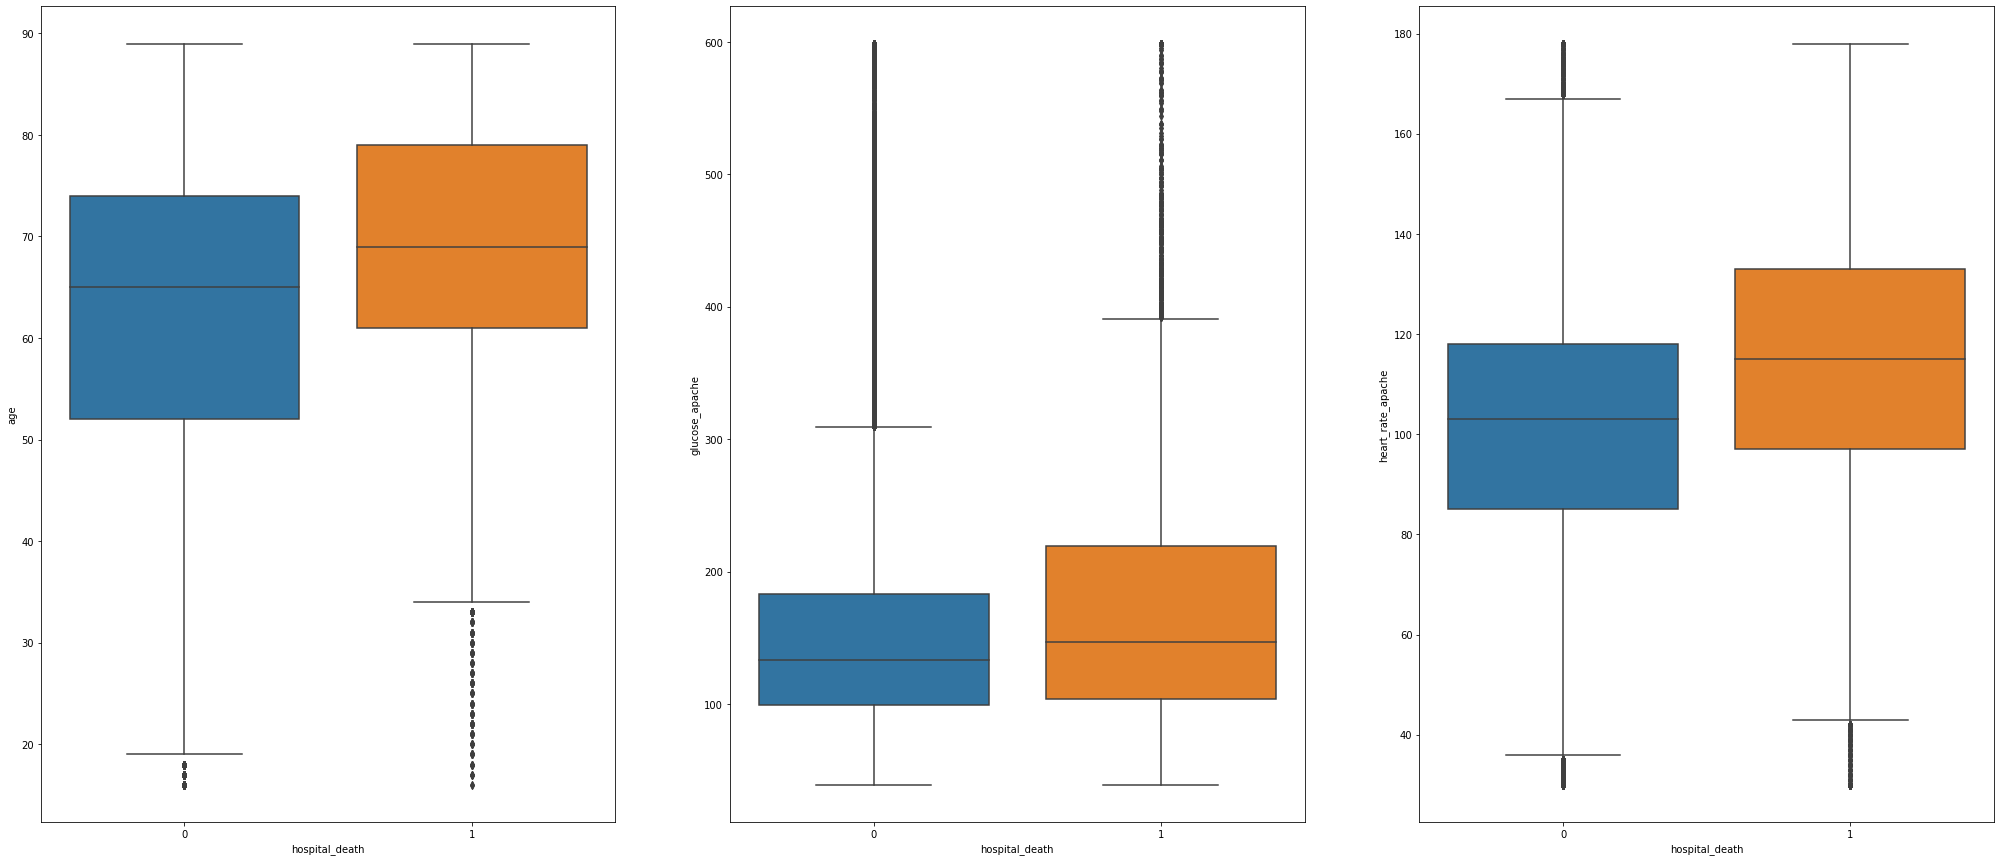

In [138]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.boxplot(x='hospital_death',y='age',data=patient_records)

plt.subplot(1,3,2)
sns.boxplot(x='hospital_death',y='glucose_apache',data=patient_records)

plt.subplot(1,3,3)
sns.boxplot(x='hospital_death',y='heart_rate_apache',data=patient_records)

plt.show()

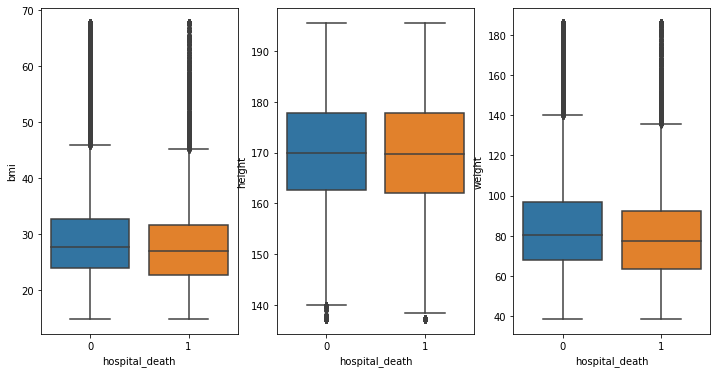

In [139]:
plt.subplot(1,3,1)
sns.boxplot(x='hospital_death',y='bmi',data=patient_records)

plt.subplot(1,3,2)
sns.boxplot(x='hospital_death',y='height',data=patient_records)

plt.subplot(1,3,3)
sns.boxplot(x='hospital_death',y='weight',data=patient_records)

plt.show()

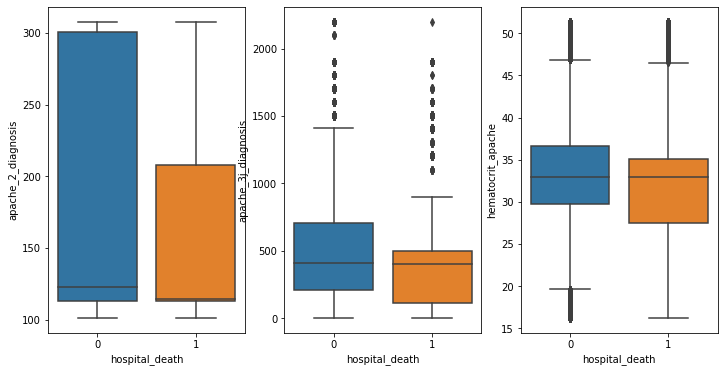

In [140]:
plt.subplot(1,3,1)
sns.boxplot(x='hospital_death',y='apache_2_diagnosis',data=patient_records)

plt.subplot(1,3,2)
sns.boxplot(x='hospital_death',y='apache_3j_diagnosis',data=patient_records)

plt.subplot(1,3,3)
sns.boxplot(x='hospital_death',y='hematocrit_apache',data=patient_records)

plt.show()

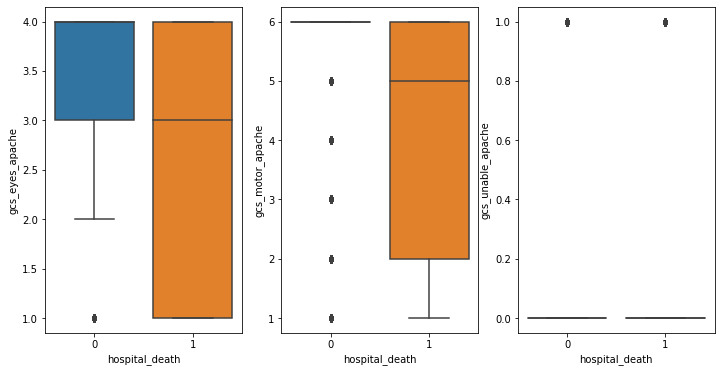

In [141]:
plt.subplot(1,3,1)
sns.boxplot(x='hospital_death',y='gcs_eyes_apache',data=patient_records)

plt.subplot(1,3,2)
sns.boxplot(x='hospital_death',y='gcs_motor_apache',data=patient_records)

plt.subplot(1,3,3)
sns.boxplot(x='hospital_death',y='gcs_unable_apache',data=patient_records)

plt.show()

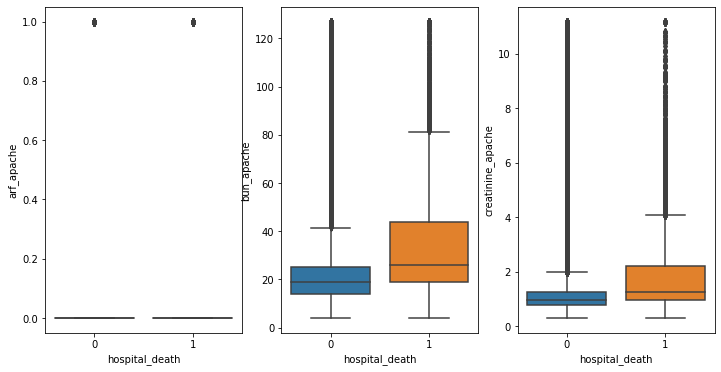

In [142]:
plt.subplot(1,3,1)
sns.boxplot(x='hospital_death',y='arf_apache',data=patient_records)

plt.subplot(1,3,2)
sns.boxplot(x='hospital_death',y='bun_apache',data=patient_records)

plt.subplot(1,3,3)
sns.boxplot(x='hospital_death',y='creatinine_apache',data=patient_records)

plt.show()

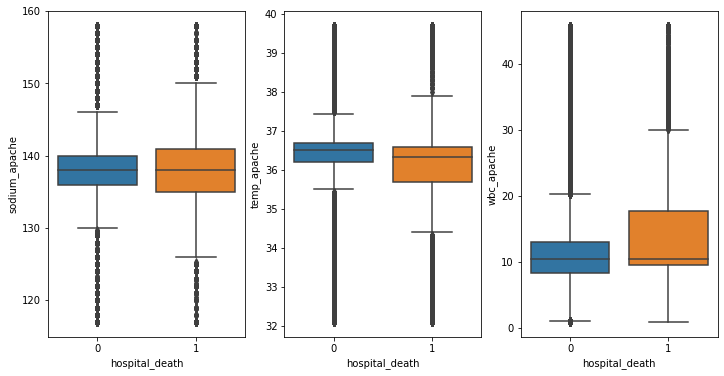

In [143]:
plt.subplot(1,3,1)
sns.boxplot(x='hospital_death',y='sodium_apache',data=patient_records)

plt.subplot(1,3,2)
sns.boxplot(x='hospital_death',y='temp_apache',data=patient_records)

plt.subplot(1,3,3)
sns.boxplot(x='hospital_death',y='wbc_apache',data=patient_records)

plt.show()

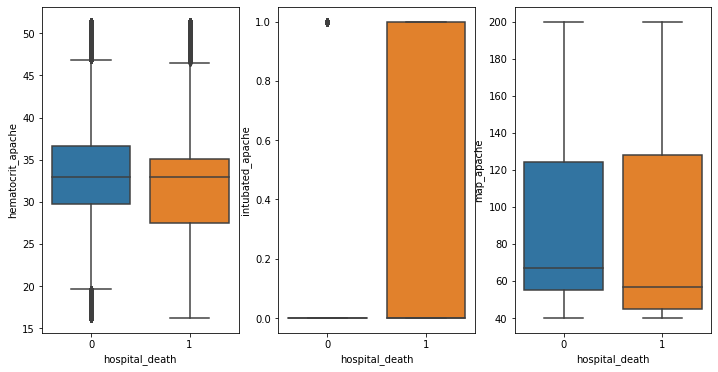

In [144]:
plt.subplot(1,3,1)
sns.boxplot(x='hospital_death',y='hematocrit_apache',data=patient_records)

plt.subplot(1,3,2)
sns.boxplot(x='hospital_death',y='intubated_apache',data=patient_records)

plt.subplot(1,3,3)
sns.boxplot(x='hospital_death',y='map_apache',data=patient_records)

plt.show()

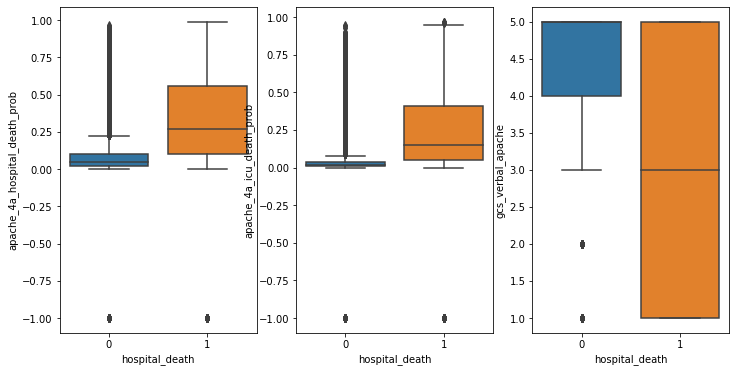

In [145]:
plt.subplot(1,3,1)
sns.boxplot(x='hospital_death',y='apache_4a_hospital_death_prob',data=patient_records)

plt.subplot(1,3,2)
sns.boxplot(x='hospital_death',y='apache_4a_icu_death_prob',data=patient_records)

plt.subplot(1,3,3)
sns.boxplot(x='hospital_death',y='gcs_verbal_apache',data=patient_records)

plt.show()

### Numeric - Categorical

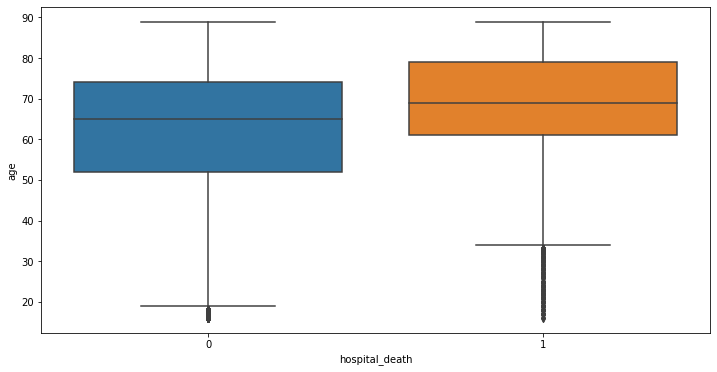

In [146]:
sns.boxplot(data=patient_records, x="hospital_death", y="age")

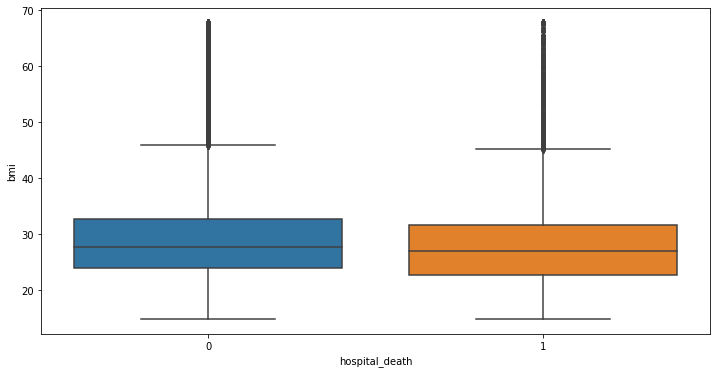

In [147]:
sns.boxplot(data=patient_records, x="hospital_death", y="bmi")

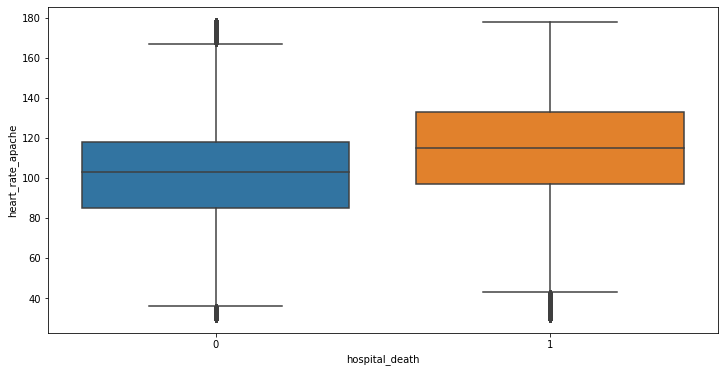

In [148]:

sns.boxplot(data=patient_records, x="hospital_death", y="heart_rate_apache")


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

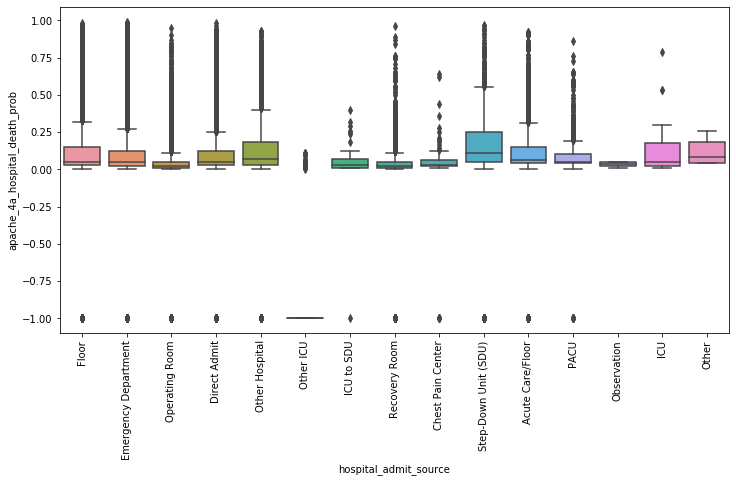

In [149]:
sns.boxplot(data=patient_records, x="hospital_admit_source", y="apache_4a_hospital_death_prob")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

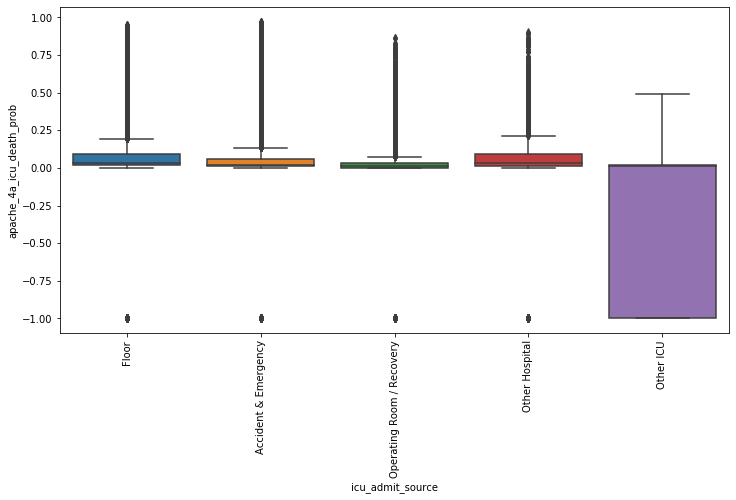

In [150]:
sns.boxplot(data=patient_records, x="icu_admit_source", y="apache_4a_icu_death_prob")
plt.xticks(rotation=90)

<div class="aler alert-info">
    <b>Observations</b>
    <ul>
        <li>Average age of deaths reported is around 65-70 years of age. And average age of survival is 65</li>
        <li>Avergae bmi reading of deaths and survivals is again similar, and it around 25 to 28. </li>
        <li>Average heart rate recorded for non survival patient is 125 and survival is 100</li>
    </ul>
</div>

## Multivariate Analysis :

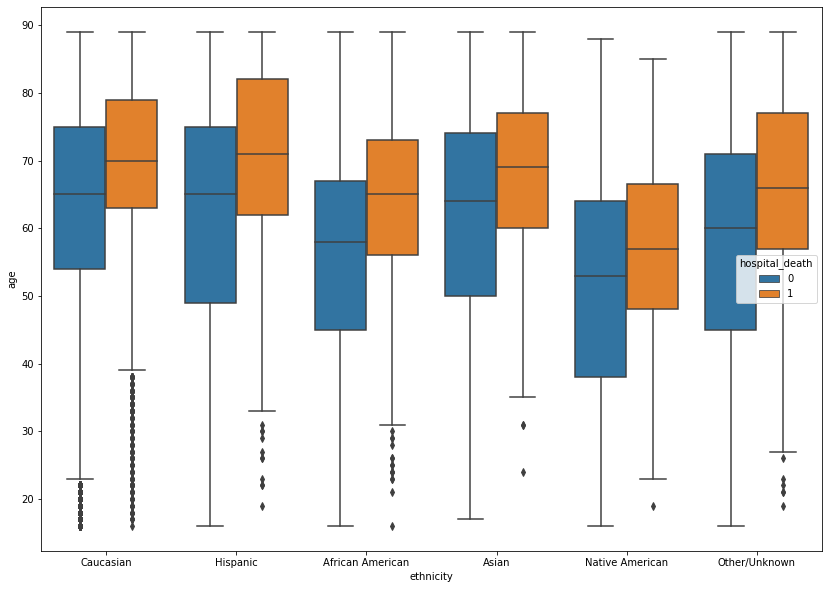

In [151]:
plt.figure(figsize=(14,10))
sns.boxplot(x='ethnicity',y='age',data=patient_records,hue='hospital_death')

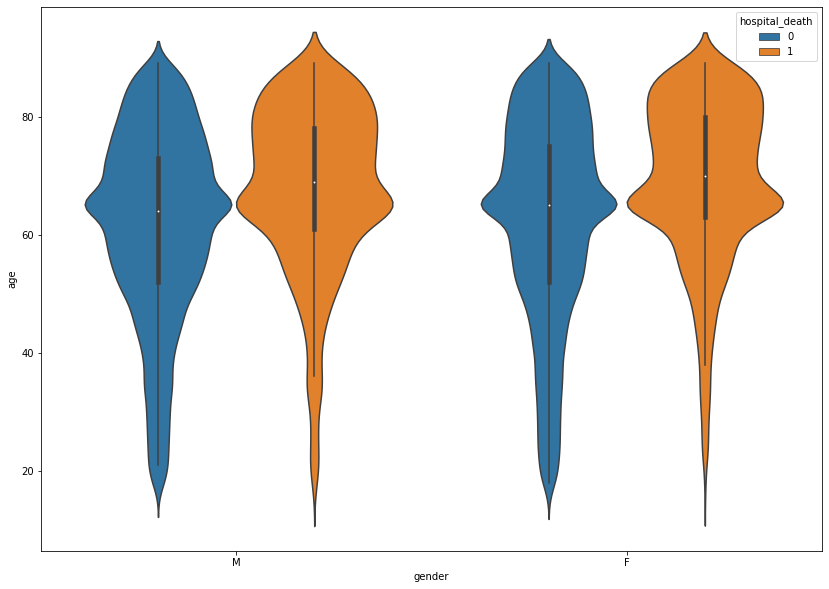

In [152]:
plt.figure(figsize=(14,10))
sns.violinplot(x='gender',y='age',data=patient_records,hue='hospital_death')

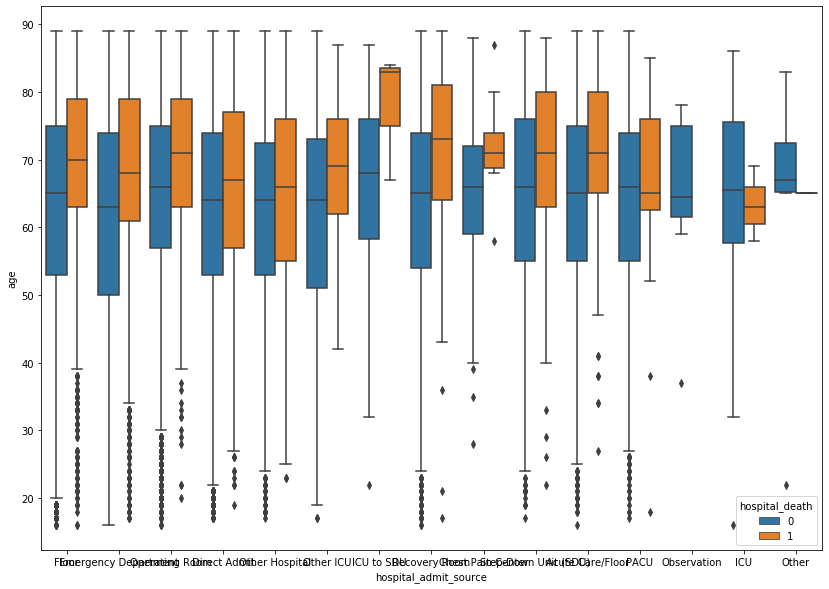

In [153]:
plt.figure(figsize=(14,10))
sns.boxplot(x='hospital_admit_source',y='age',data=patient_records,hue='hospital_death')

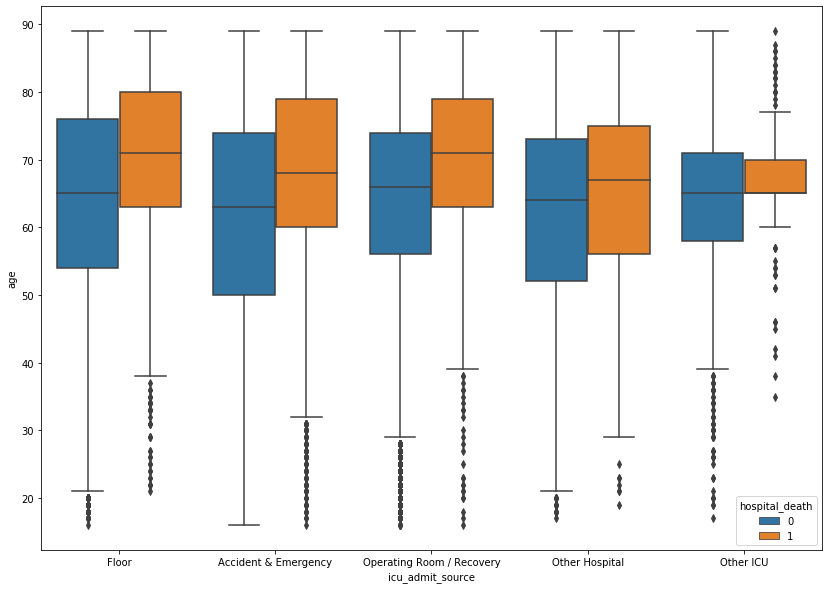

In [154]:
plt.figure(figsize=(14,10))
sns.boxplot(x='icu_admit_source',y='age',data=patient_records,hue='hospital_death')

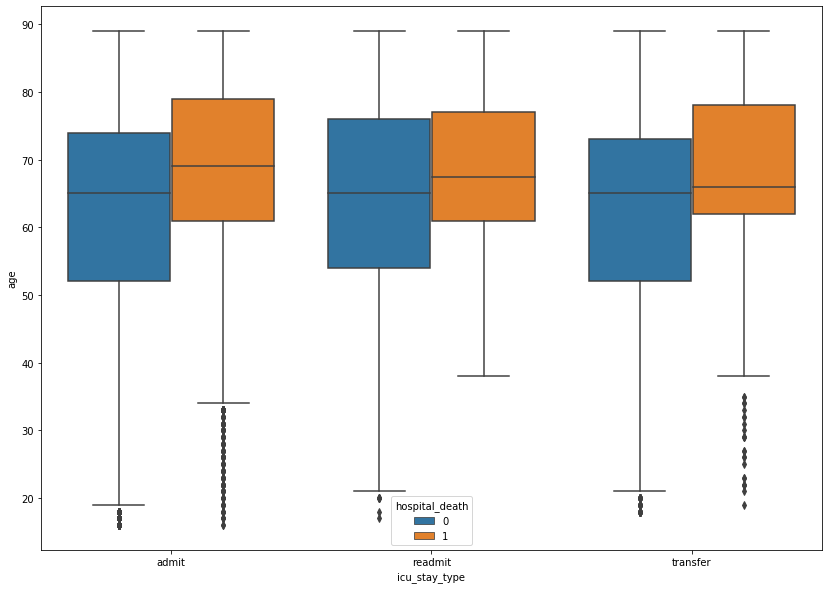

In [155]:
plt.figure(figsize=(14,10))
sns.boxplot(x='icu_stay_type',y='age',data=patient_records,hue='hospital_death')

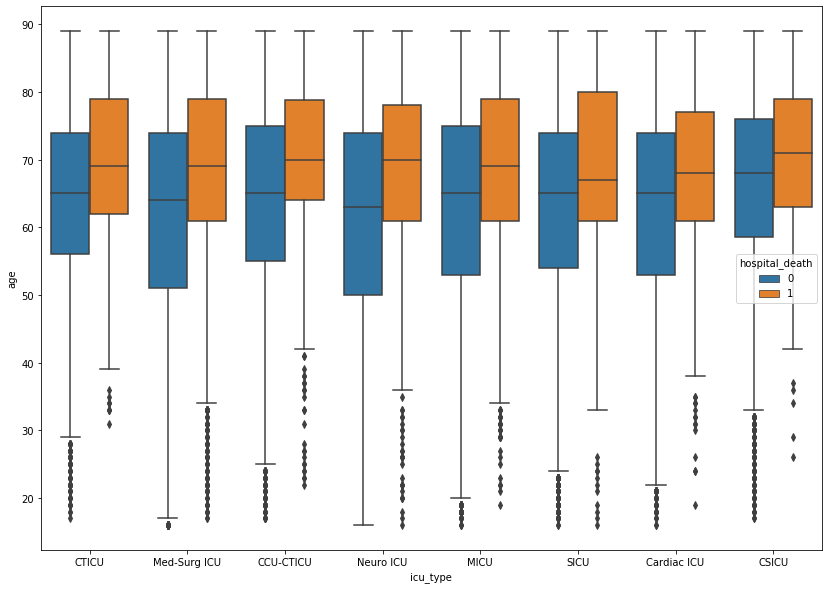

In [156]:
plt.figure(figsize=(14,10))
sns.boxplot(x='icu_type',y='age',data=patient_records,hue='hospital_death')

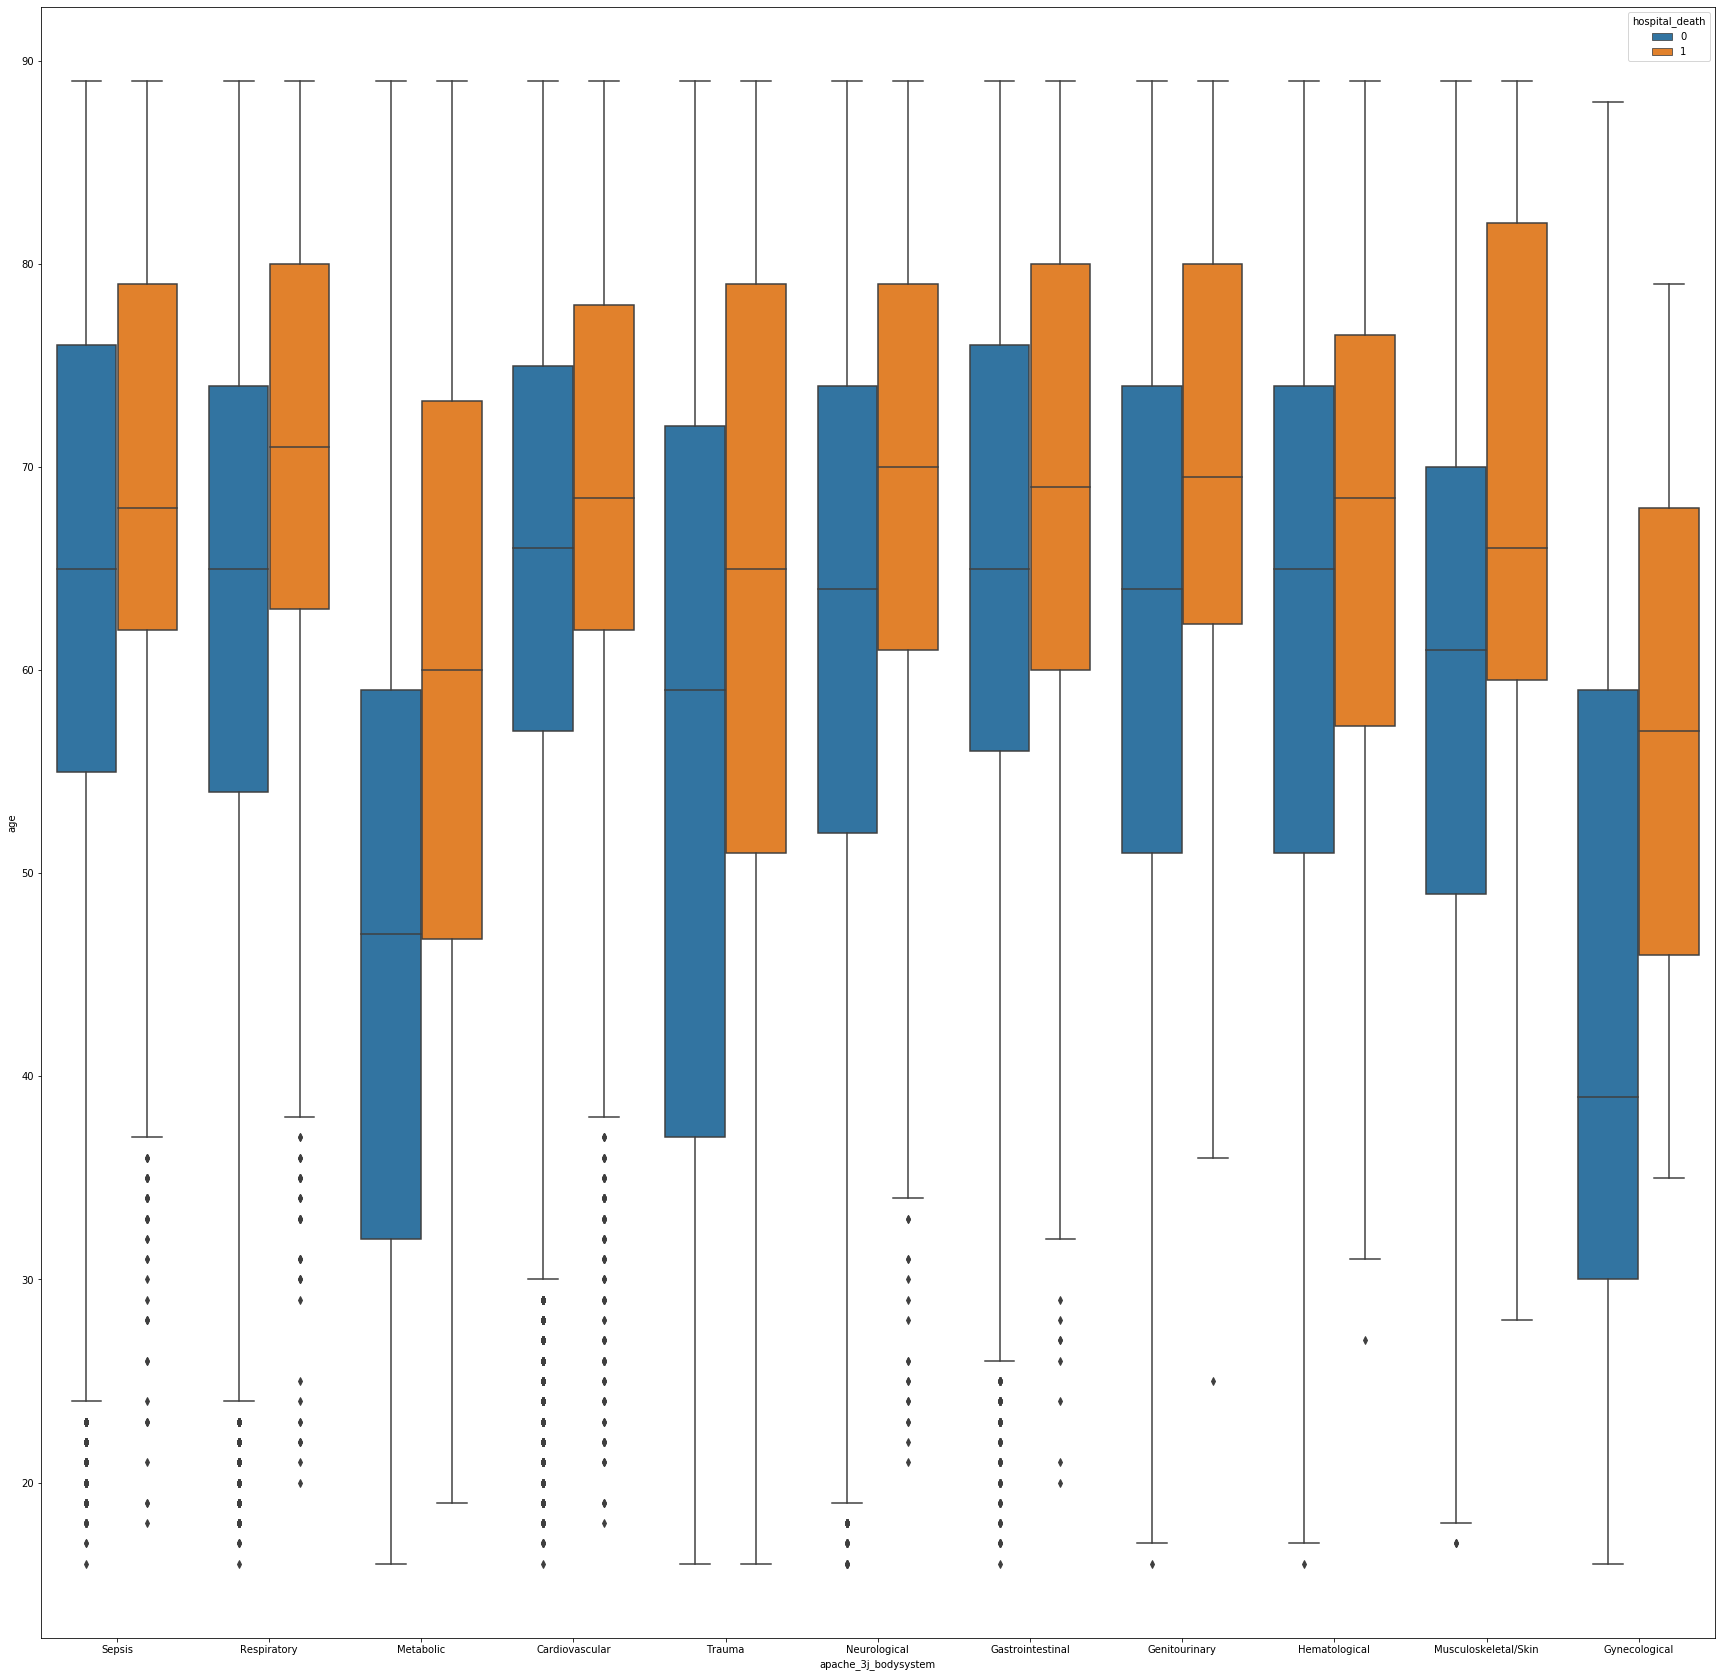

In [157]:
plt.figure(figsize=(30,30))
sns.boxplot(x='apache_3j_bodysystem',y='age',data=patient_records,hue='hospital_death')

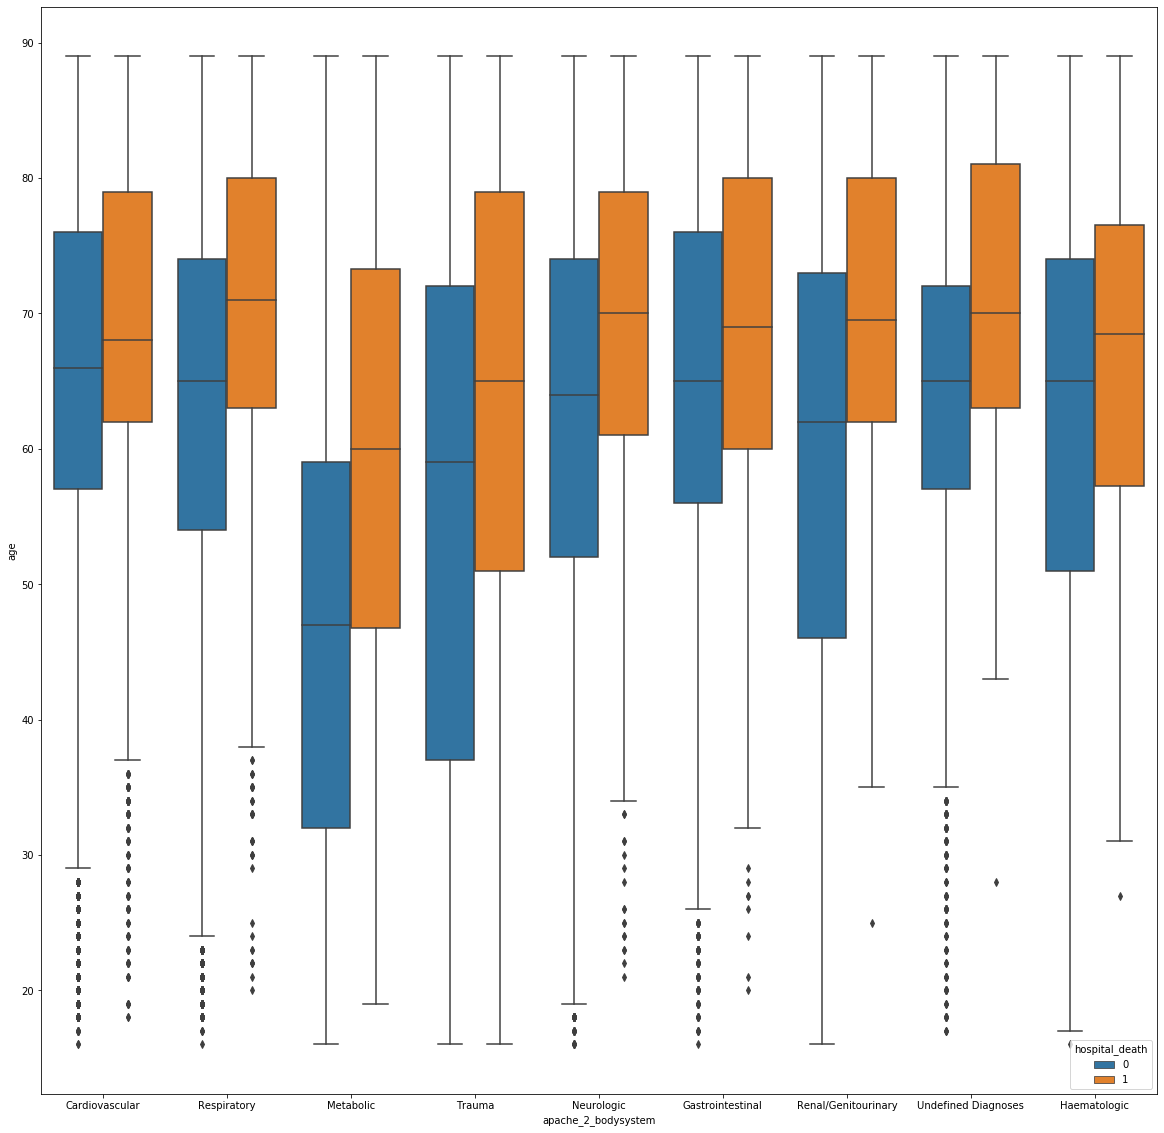

In [158]:
plt.figure(figsize=(20,20))
sns.boxplot(x='apache_2_bodysystem',y='age',data=patient_records,hue='hospital_death')

In [159]:
patient_records.drop(['readmission_status'],axis=1,inplace=True)

In [160]:
patient_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            91713 non-null  float64
 1   bmi                            91713 non-null  float64
 2   elective_surgery               91713 non-null  int64  
 3   ethnicity                      91713 non-null  object 
 4   gender                         91713 non-null  object 
 5   height                         91713 non-null  float64
 6   hospital_admit_source          91713 non-null  object 
 7   icu_admit_source               91713 non-null  object 
 8   icu_stay_type                  91713 non-null  object 
 9   icu_type                       91713 non-null  object 
 10  weight                         91713 non-null  float64
 11  apache_2_diagnosis             91713 non-null  float64
 12  apache_3j_diagnosis            91713 non-null 

## Outliers Detection And Treatment :

Checking the outliers by its skweness

In [161]:
df_numerical = patient_records.select_dtypes(include=np.number)

In [162]:
print(df_numerical)

        age        bmi  elective_surgery  height  weight  apache_2_diagnosis  \
0      68.0  22.730000                 0   180.3    73.9               113.0   
1      77.0  27.420000                 0   160.0    70.2               108.0   
2      25.0  31.950000                 0   172.7    95.3               122.0   
3      81.0  22.640000                 1   165.1    61.7               203.0   
4      19.0  27.654655                 0   188.0    80.3               119.0   
...     ...        ...               ...     ...     ...                 ...   
91708  75.0  23.060250                 0   177.8    72.9               113.0   
91709  56.0  47.179671                 0   183.0   158.0               113.0   
91710  48.0  27.236914                 0   170.2    78.9               123.0   
91711  65.0  23.297481                 0   154.9    55.9               108.0   
91712  82.0  22.031250                 1   160.0    56.4               304.0   

       apache_3j_diagnosis  arf_apache 

In [163]:
df_numerical.skew()

age                              -0.660745
bmi                               1.486622
elective_surgery                  1.633330
height                           -0.102201
weight                            1.097569
apache_2_diagnosis                0.537495
apache_3j_diagnosis               1.028888
arf_apache                        5.749089
bun_apache                        2.536929
creatinine_apache                 4.065598
gcs_eyes_apache                  -1.716982
gcs_motor_apache                 -2.750912
gcs_unable_apache                10.156879
gcs_verbal_apache                -1.235312
glucose_apache                    2.043882
heart_rate_apache                -0.268589
hematocrit_apache                -0.000896
intubated_apache                  1.959939
map_apache                        0.714243
resprate_apache                   0.260251
sodium_apache                    -0.327955
temp_apache                      -1.002049
ventilated_apache                 0.756143
wbc_apache 

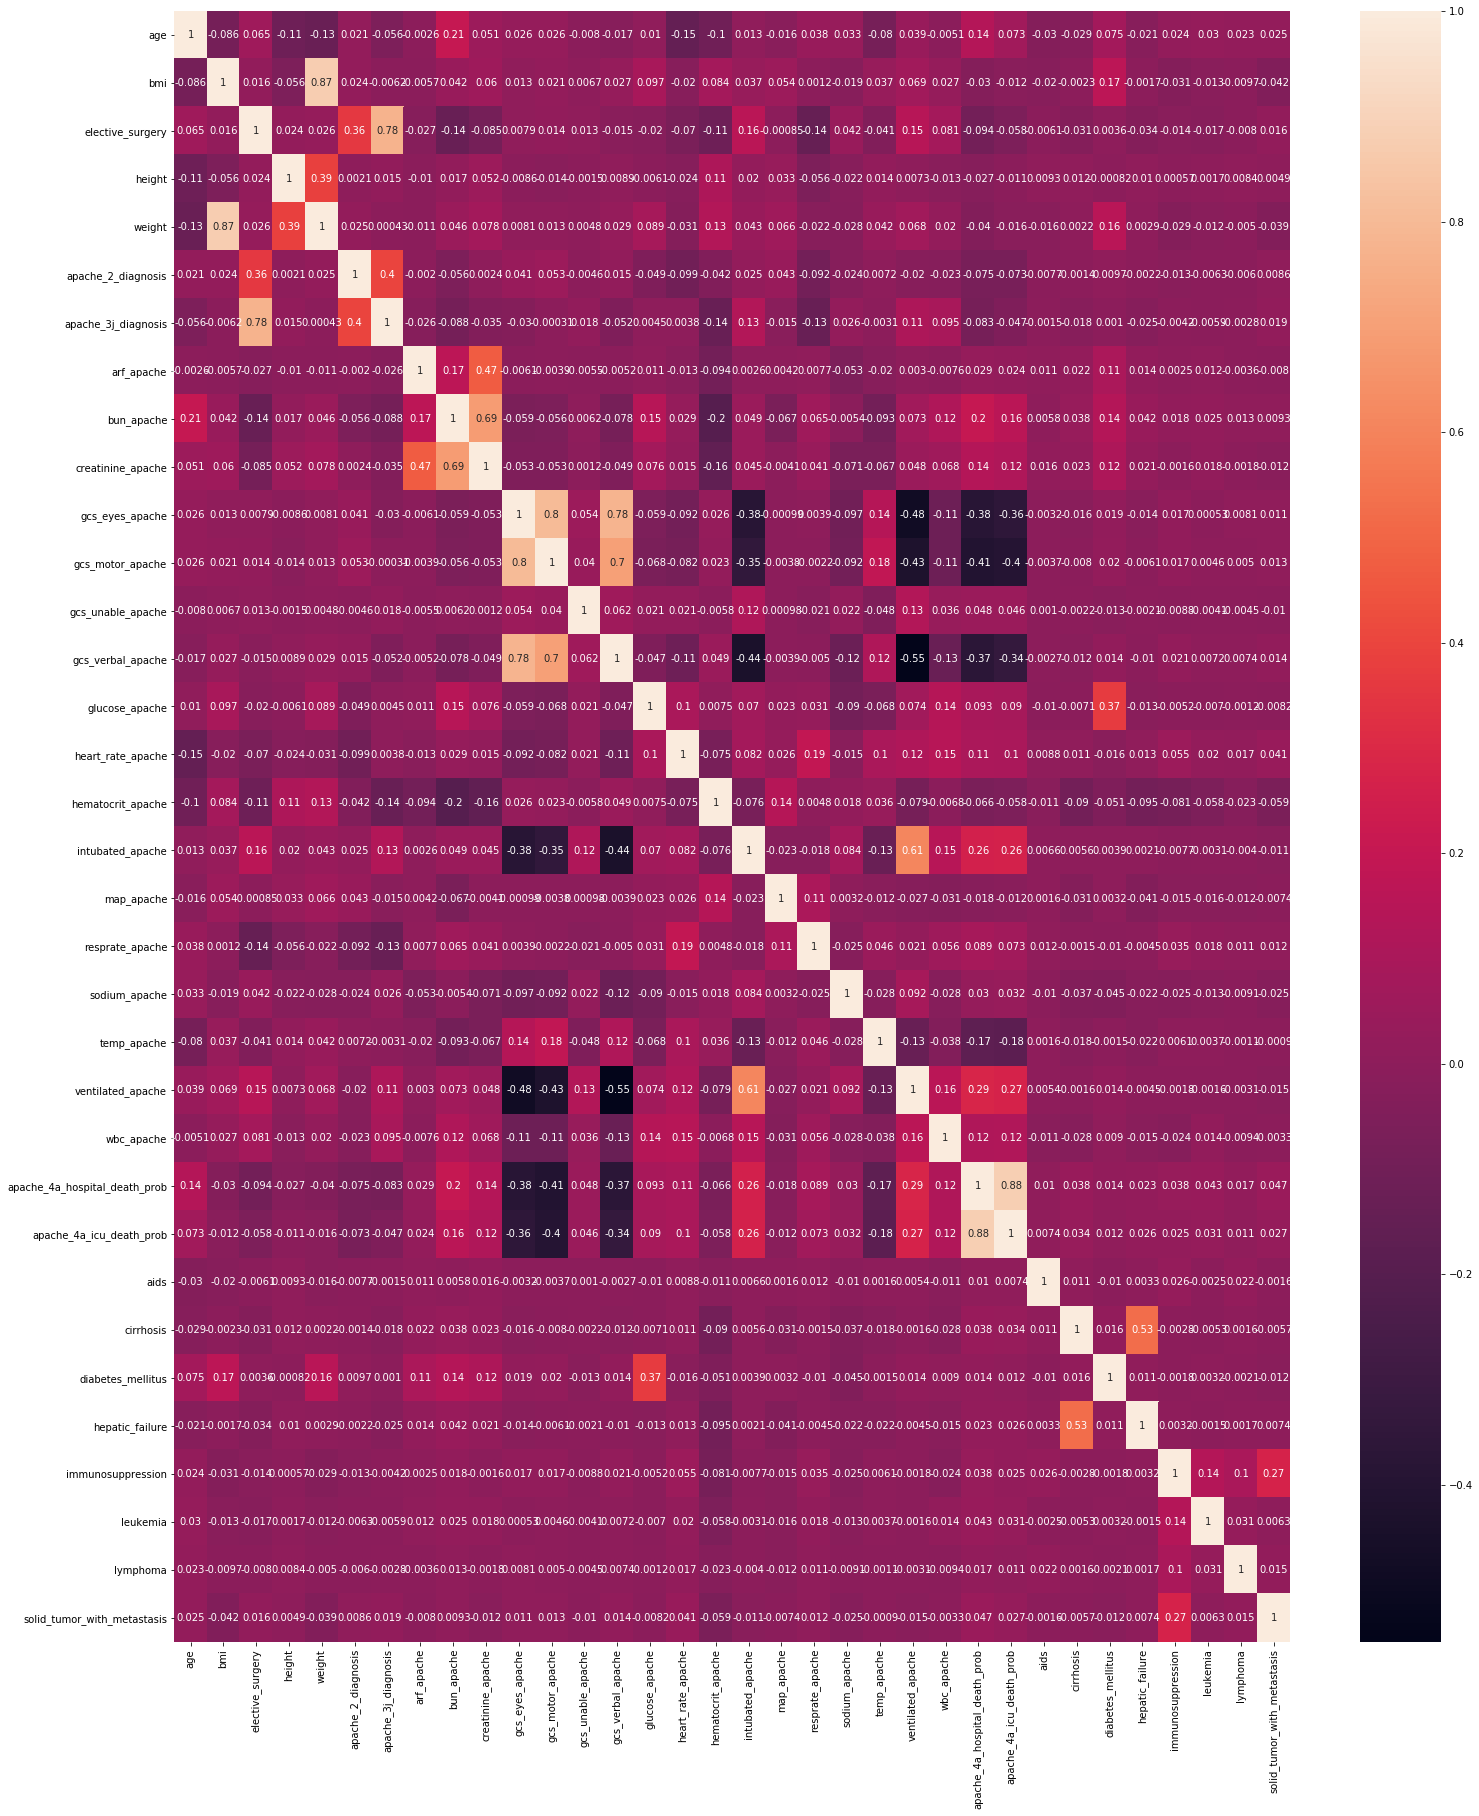

In [164]:
plt.figure(figsize=(25,30))
sns.heatmap(df_numerical.corr(),annot=True)

### Graphical Representation of Outliers

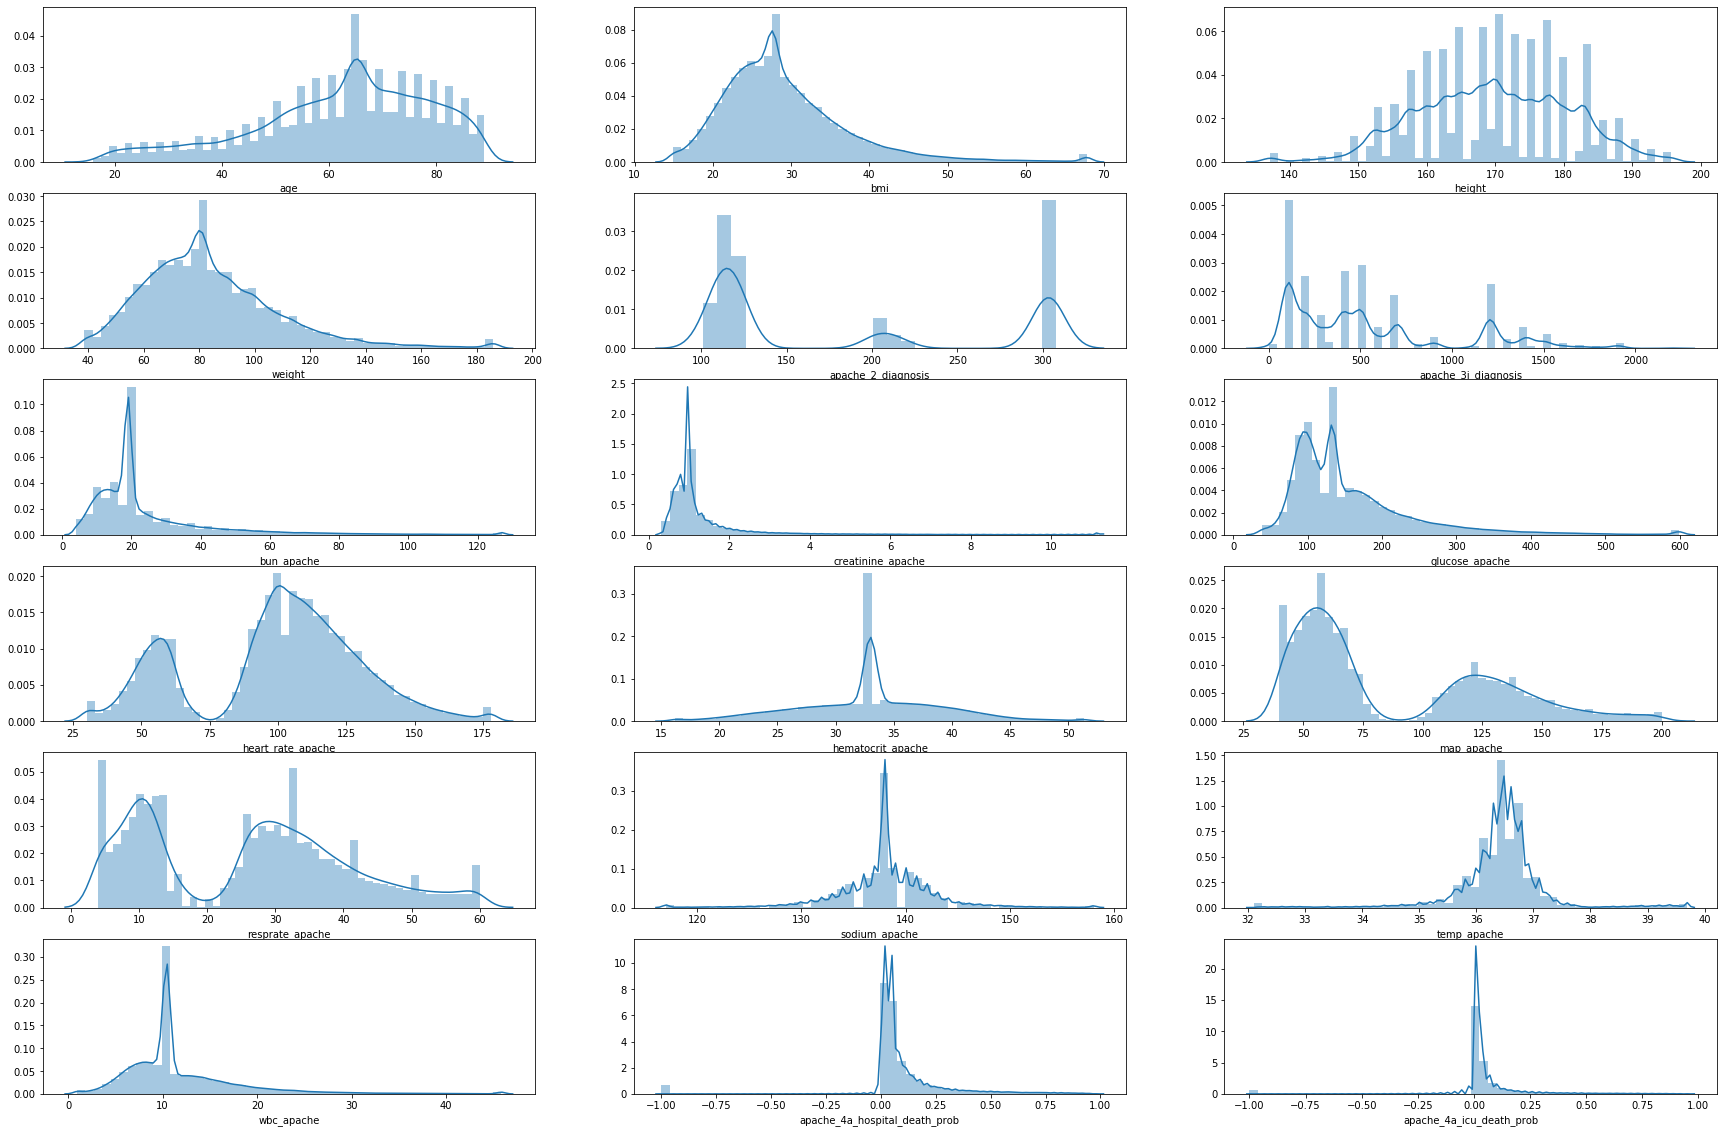

In [165]:
outlier_columns=[]

plt.figure(figsize=(30,20))
s=1
for p in pr_continuous:
    plt.subplot(6,3,s)
    sns.distplot(pr_continuous[p])  
    s+=1


### Treatment of Outliers by Powertransform :

In [166]:
from sklearn.preprocessing import PowerTransformer

In [167]:
pt=PowerTransformer()

In [168]:
patient_pwrtransformed_data_num=pd.DataFrame(pt.fit_transform(df_numerical),columns=df_numerical.columns)

In [169]:
patient_pwrtransformed_data_num.head()

age       bmi  elective_surgery    height    weight  \
0  0.262608 -0.828257         -0.474441  0.996207 -0.291082   
1  0.924492 -0.039544         -0.474441 -0.904887 -0.476735   
2 -1.946906  0.550684         -0.474441  0.269207  0.608360   
3  1.239563 -0.845741          2.107744 -0.439605 -0.949178   
4 -2.119224 -0.005437         -0.474441  1.750986  0.006275   

   apache_2_diagnosis  apache_3j_diagnosis  arf_apache  bun_apache  \
0           -0.881672             0.201098   -0.168977    0.766959   
1           -1.049900            -0.719084   -0.168977   -1.376419   
2           -0.615472             0.598680   -0.168977   -0.026352   
3            0.676168             1.307726   -0.168977   -0.026352   
4           -0.699475             0.409529   -0.168977   -0.026352   

   creatinine_apache  ...  apache_4a_hospital_death_prob  \
0           1.527208  ...                       0.011450   
1          -1.431400  ...                       1.836706   
2          -0.066231  ...                      -0.422030   
3          -0.066231  ...                      -0.251831   
4          -0.066231  ...                      -0.208612   

   apache_4a_icu_death_prob      aids  cirrhosis  diabetes_mellitus  \
0                 -0.023581 -0.029175  -0.125764           1.864283   
1                  1.324603 -0.029175  -0.125764           1.864283   
2                 -0.277090 -0.029175  -0.125764          -0.536399   
3                 -0.126137 -0.029175  -0.125764          -0.536399   
4                 -0.176840 -0.029175  -0.125764          -0.536399   

   hepatic_failure  immunosuppression  leukemia  lymphoma  \
0        -0.114264          -0.163259 -0.084027 -0.064161   
1        -0.114264          -0.163259 -0.084027 -0.064161   
2        -0.114264          -0.163259 -0.084027 -0.064161   
3        -0.114264          -0.163259 -0.084027 -0.064161   
4        -0.114264          -0.163259 -0.084027 -0.064161   

   solid_tumor_with_metastasis  
0                    -0.144586  
1                    -0.144586  
2                    -0.144586  
3                    -0.144586  
4                    -0.144586  

[5 rows x 34 columns]

## Graphical Representation after Outlier Treatment :

In [ ]:
plt.figure(figsize=(50,20))
s=1
for p in patient_pwrtransformed_data_num:   
    plt.subplot(6,5,s)
    sns.distplot(patient_pwrtransformed_data_num[p])
    s+=1

# Encoding the categorical variables:

In [175]:
df_categorical = patient_records.select_dtypes(object)
df_categorical=df_categorical.drop('hospital_death',axis=1)
Encode=pd.get_dummies(data=df_categorical,drop_first=True)

In [176]:
print(df_categorical)

       ethnicity gender hospital_admit_source           icu_admit_source  \
0      Caucasian      M                 Floor                      Floor   
1      Caucasian      F                 Floor                      Floor   
2      Caucasian      F  Emergency Department       Accident & Emergency   
3      Caucasian      F        Operating Room  Operating Room / Recovery   
4      Caucasian      M                 Floor       Accident & Emergency   
...          ...    ...                   ...                        ...   
91708  Caucasian      M      Acute Care/Floor                      Floor   
91709  Caucasian      F  Emergency Department                      Floor   
91710  Caucasian      M  Emergency Department       Accident & Emergency   
91711  Caucasian      F  Emergency Department       Accident & Emergency   
91712  Caucasian      F                 Floor  Operating Room / Recovery   

      icu_stay_type      icu_type apache_3j_bodysystem apache_2_bodysystem  
0         

In [177]:
Encode=pd.get_dummies(patient_records,columns = ['hospital_death'],drop_first=True)  

In [178]:
patient_records['hospital_death']=patient_records['hospital_death'].astype(int)

#### Seperating the target variable and the dependent variables:

In [179]:
# Dependent variables:
X=patient_pwrtransformed_data_num

# Target variable:
y=patient_records[['hospital_death']].reset_index(drop=True)

In [180]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   hospital_death  91713 non-null  int32
dtypes: int32(1)
memory usage: 358.4 KB


#### Concatenating the powertransformed numerical features with One hot encoded categorical featues:

In [181]:
Encode=pd.get_dummies(data=patient_records,drop_first=True)

# Concatenating the Encoded categorical attributes to the powertransformed numerical attributes:
X=pd.concat([pd.DataFrame(X),Encode],axis=1)

In [182]:
#plot color scaled correlation matrix
plt.figure(figsize=(30,20))
corr=pr_continuous.corr()
corr.style.background_gradient(cmap='coolwarm')

<Figure size 2160x1440 with 0 Axes>

#### Removing features involved in multicollinearity uisng Variance Inflation Factor:

In [196]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [197]:
X =pr_continuous.iloc[:,:-1]
calc_vif(X)

variables          VIF
0                             age    17.505818
1                             bmi   193.883311
2                          height   904.542559
3                          weight   205.747372
4              apache_2_diagnosis     6.849582
5             apache_3j_diagnosis     3.123661
6                      bun_apache     5.923999
7               creatinine_apache     3.959432
8                  glucose_apache     4.647566
9               heart_rate_apache    13.152690
10              hematocrit_apache    34.362253
11                     map_apache     5.654721
12                resprate_apache     4.299213
13                  sodium_apache   686.289297
14                    temp_apache  1066.795779
15                     wbc_apache     5.083219
16  apache_4a_hospital_death_prob     1.252182

In [198]:
for i in range(len(X.columns)):
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['Features']=X.columns
    multi=vif[vif['VIF Factor']>10]
    if (multi.empty==False):
        df_numerical_sorted=multi.sort_values(by='VIF Factor',ascending=False)
    else:
        print(vif)
        break
    if (df_numerical_sorted.empty==False):
        X=X.drop(df_numerical_sorted['Features'].iloc[0],axis=1)
    else:
        print(vif)

    VIF Factor                       Features
0     9.501047                         weight
1     5.997191             apache_2_diagnosis
2     3.028062            apache_3j_diagnosis
3     5.402552                     bun_apache
4     3.857283              creatinine_apache
5     4.522258                 glucose_apache
6     9.734484              heart_rate_apache
7     5.163142                     map_apache
8     4.131536                resprate_apache
9     4.905888                     wbc_apache
10    1.211468  apache_4a_hospital_death_prob


In [199]:
# Checking the shape of the dependent dataset
X.shape

(91713, 11)

#### Splitting the data into training and testing set in the ratio (80:20):

In [187]:
rc=10    # Initialising the random state at 10.
X=sm.add_constant(X)        # Adding the constant.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=rc)

# Predictive Modeling:

# Logit model summary for full model:

In [200]:
# using statsmodels:
logit_model=sm.Logit(y_train,X_train).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.236484
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         hospital_death   No. Observations:                73370
Model:                          Logit   Df Residuals:                    73358
Method:                           MLE   Df Model:                           11
Date:                Wed, 31 Aug 2022   Pseudo R-squ.:                  0.1985
Time:                        21:41:53   Log-Likelihood:                -17351.
converged:                       True   LL-Null:                       -21648.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -3.5776      0.090    -39.540      0.000      -3.755      -3.400
weight                           -0.0040      0.001     -6.559      0.000      -0.005      -0.003
apache_2_diagnosis               -0.0012      0.000     -5.931      0.000      -0.002      -0.001
apache_3j_diagnosis              -0.0004   4.16e-05     -8.779      0.000      -0.000      -0.000
bun_apache                        0.0108      0.001     12.493      0.000       0.009       0.012
creatinine_apache                -0.0030      0.012     -0.241      0.809      -0.027       0.021
glucose_apache                 9.253e-05      0.000      0.595      0.552      -0.000       0.000
heart_rate_apache                 0.0063      0.000     13.032      0.000       0.005       0.007
map_apache                       -0.0030      0.000     -8.763      0.000      -0.004      -0.002
resprate_apache                   0.0097      0.001      9.859      0.000       0.008       0.012
wbc_apache                        0.0180      0.002      9.095      0.000       0.014       0.022
apache_4a_hospital_death_prob     4.3290      0.066     65.322      0.000       4.199       4.459
=================================================================================================
"""

# Statistical Analysis of the features:

#### Significant features affecting the model:

In [201]:
# If the p value for Wald test statistic is less than 0.05, we are considering the feature to 
# be significant.

significant=logit_model.pvalues[logit_model.pvalues<0.05]
significant_features=pd.DataFrame(data=significant,columns=['p-value'])
significant_features.drop('const',axis=0)

p-value
weight                         5.402360e-11
apache_2_diagnosis             3.002090e-09
apache_3j_diagnosis            1.656055e-18
bun_apache                     8.146312e-36
heart_rate_apache              8.087324e-39
map_apache                     1.893591e-18
resprate_apache                6.241141e-23
wbc_apache                     9.430939e-20
apache_4a_hospital_death_prob  0.000000e+00

The following dependent variables contribute significantly to the overall model performance:

* weight
* apache_2_diagnosis
* bun_apache
* heart_rate_apache
* map_apache
* resprate_apache
* wbc_apache
* apache_4a_hospital_death_prob


#### Log odds value for each feature:

In [202]:
log_odds=round(logit_model.params,2)
log_odds_data=pd.DataFrame(log_odds,columns=['Log odds'])
log_odds_data.drop('const',axis=0)

Log odds
weight                            -0.00
apache_2_diagnosis                -0.00
apache_3j_diagnosis               -0.00
bun_apache                         0.01
creatinine_apache                 -0.00
glucose_apache                     0.00
heart_rate_apache                  0.01
map_apache                        -0.00
resprate_apache                    0.01
wbc_apache                         0.02
apache_4a_hospital_death_prob      4.33

#### Odds Value for each feature:

In [203]:
odds=round(np.exp(logit_model.params),2)
odds_data=pd.DataFrame(odds,columns=['Odds value'])
odds_data.sort_values(by='Odds value',ascending=False).drop('const',axis=0)

Odds value
apache_4a_hospital_death_prob       75.87
wbc_apache                           1.02
bun_apache                           1.01
heart_rate_apache                    1.01
resprate_apache                      1.01
weight                               1.00
apache_2_diagnosis                   1.00
apache_3j_diagnosis                  1.00
creatinine_apache                    1.00
glucose_apache                       1.00
map_apache                           1.00

Higher the odds value, greater is the relation of the feature with the target variable.

#### Model Evaluation : McFadden's R^2 value(Pseudo R^2)


In [205]:
accuracy=logit_model.prsquared
print('Logit model accuracy : ',accuracy)

Logit model accuracy :  0.19850561996678096


# Model Performance:

## Accuracy using Confusion Matrix:

#### Considering the probability threshold to be 0.5:

In [206]:
# Initializing the probability threshold:
th=0.5
ypred_prob=logit_model.predict(X_test)
ypred=[0 if p<th else 1 for p in ypred_prob]

# Computing the Confusion matrix:
confusion_mat=confusion_matrix(y_test,ypred)
tn = confusion_mat[0,0]
tp = confusion_mat[1,1]
fp = confusion_mat[0,1]
fn = confusion_mat[1,0]
print('Confusion Matrix for Logit Model : ')
print('---------------------------------','\n')
print(confusion_mat)

Confusion Matrix for Logit Model : 
--------------------------------- 

[[16634   162]
 [ 1237   310]]


#### Graphical Representation of Confusion Matrix:

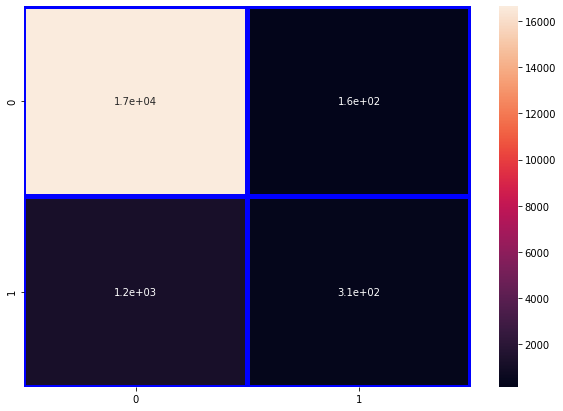

In [207]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_mat,annot=True,linewidth=3.5,linecolor='blue')
plt.show()

#### Calculating optimal value threshold for full model using the Youden's index:

In [208]:
# Computing the True Positive rate(TPR),False Positive rate(FPR) and probability threshold:
fpr, tpr, th= roc_curve(y_test, ypred_prob)

# Creating a Dataframe of the data:
youden= pd.DataFrame({'TPR': tpr,
                       'FPR': fpr,
                        'thres':th})

# Calculating the Younden's index:
youden['YI']= youden.TPR-youden.FPR
youden= youden.sort_values(by='YI',ascending=False).reset_index(drop=True)
print(youden.head(5))
print('-----------------------------------------','\n')
# or
print('Optimal threshold for probability: ',round(youden['YI'].max(),2))

        TPR       FPR     thres        YI
0  0.729800  0.222672  0.077511  0.507128
1  0.729153  0.222077  0.077651  0.507077
2  0.730446  0.223565  0.077294  0.506881
3  0.731092  0.224280  0.077155  0.506813
4  0.732385  0.225828  0.076793  0.506558
----------------------------------------- 

Optimal threshold for probability:  0.51


#### Considering the Optimal probability threshold:

In [209]:
# Initialising the optimal probability threshold:
opt_th=0.51
ypred_prob=logit_model.predict(X_test)
ypred_optimal=[0 if p<opt_th else 1 for p in ypred_prob]

# Computing the Confusion matrix:
confusion_mat_optimal=confusion_matrix(y_test,ypred_optimal)
tn = confusion_mat_optimal[0,0]
tp = confusion_mat_optimal[1,1]
fp = confusion_mat_optimal[0,1]
fn = confusion_mat_optimal[1,0]
print('Confusion Matrix from Logit Model : ')
print('------------------------------------','\n')
print(confusion_mat_optimal)

Confusion Matrix from Logit Model : 
------------------------------------ 

[[16641   155]
 [ 1245   302]]


#### Graphical Representation of Confusion Matrix:

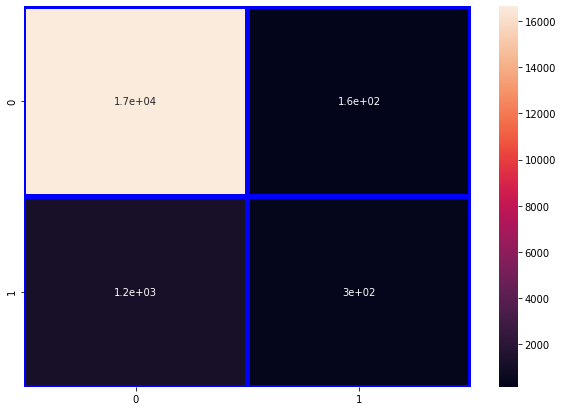

In [210]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_mat_optimal,annot=True,linewidth=3.5,linecolor='blue')
plt.show()

#### Logit model accuracy from confusion matrix :

In [211]:
# For probability threshold as 0.5:
logit_model_accuracy_test=accuracy_score(y_test,ypred)
print('Logit model accuracy for test data using confusion matrix : ',logit_model_accuracy_test)

Logit model accuracy for test data using confusion matrix :  0.9237311235893801


In [212]:
# For optimal probability threshold as 0.51:
logit_model_optimal_accuracy=accuracy_score(y_test,ypred_optimal)
print('Logit model accuracy using confusion matrix : ',logit_model_optimal_accuracy)

Logit model accuracy using confusion matrix :  0.9236766068800087


#### Logit model classification report:

In [213]:
# Computing the classification report:

logit_classification=classification_report(y_test,ypred)
print('Logit model classification report: ')
print('------------------------------------','\n')
print(logit_classification)

Logit model classification report: 
------------------------------------ 

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     16796
           1       0.66      0.20      0.31      1547

    accuracy                           0.92     18343
   macro avg       0.79      0.60      0.63     18343
weighted avg       0.91      0.92      0.90     18343



# 1. Logistic Regression Model using Scikit-learn:

In [214]:
# Logistic Regression Model using sklearn:
log_reg=LogisticRegression()
log_model=log_reg.fit(X_train,y_train)
ypred_lr_test=log_model.predict(X_test)
ypred_lr_train=log_model.predict(X_train)
ypred_lr_probability=log_model.predict_proba(X_test)[:,1]

## 1.a) Model Performance Evaluation:

#### 1.a).1. Confusion Matrix for Logistic Regression Model:

In [215]:
# Computing the Confusion matrix: 

confusion_mat=confusion_matrix(y_test,ypred_lr_test)
tn = confusion_mat[0,0]
tp = confusion_mat[1,1]
fp = confusion_mat[0,1]
fn = confusion_mat[1,0]
print('Confusion Matrix form Logistic Regression Model : ')
print('------------------------------------------------','\n')
print(confusion_mat)

Confusion Matrix form Logistic Regression Model : 
------------------------------------------------ 

[[16655   141]
 [ 1485    62]]


#### 1.a).2. Graphical Representation of Confusion Matrix:

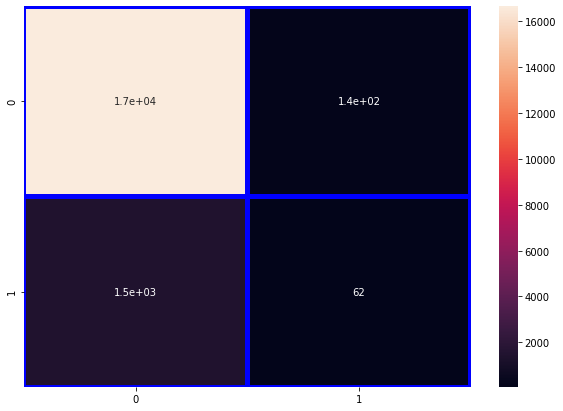

In [216]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_mat,annot=True,linewidth=3.5,linecolor='blue')
plt.show()

#### 1.a).3. Sensitivity and Specificity:

In [217]:
Sensitivity_Logistic=(tp/(tp+fn))
print('Sensitivity of the Logistic Regression Model: ')
print('---------------------------------------------','\n')
print(Sensitivity_Logistic)
print('\n')
Specificity_Logistic=(tn/(tn+fp))
print('Specificity of the Logistic Regression Model: ')
print('---------------------------------------------','\n')
print(Specificity_Logistic)

Sensitivity of the Logistic Regression Model: 
--------------------------------------------- 

0.0400775694893342


Specificity of the Logistic Regression Model: 
--------------------------------------------- 

0.9916051440819242


#### 1.a).4. Accuracy Analysis:

In [218]:
print('The Accuracy score of the test data for Logistic Regression model : ')
print(accuracy_score(y_test,ypred_lr_test),'\n')
print('The Accuracy score of the train data for Logistic Regression model : ')
print(accuracy_score(y_train,ypred_lr_train))

The Accuracy score of the test data for Logistic Regression model : 
0.9113558305620673 

The Accuracy score of the train data for Logistic Regression model : 
0.9091863159329426


#### 1.a).5. Logistic Regression model classification report:

In [219]:
# Computing the classification report:

logistic_report=classification_report(y_test,ypred_lr_test)
print('Logit model classification report: ')
print('------------------------------------','\n')
print(logistic_report)

Logit model classification report: 
------------------------------------ 

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     16796
           1       0.31      0.04      0.07      1547

    accuracy                           0.91     18343
   macro avg       0.61      0.52      0.51     18343
weighted avg       0.87      0.91      0.88     18343



#### 1.a).6. ROC Curve for Logistic Regression Model:

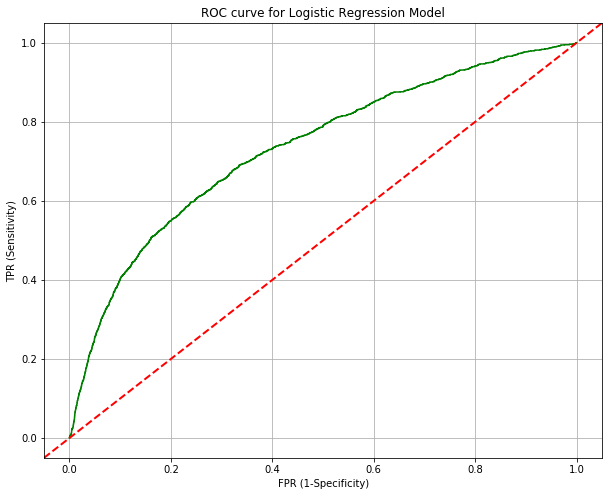

In [220]:
fpr,tpr,th=roc_curve(y_test,ypred_lr_probability)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='green')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('FPR (1-Specificity)')
plt.ylabel('TPR (Sensitivity)')
plt.title('ROC curve for Logistic Regression Model')
plt.grid()
plt.plot([-0.05,1.05],[-0.05,1.05],'r--',linewidth=2)
plt.show()

#### 1.a).7. ROC AUC Score:

In [221]:
print('The ROC AUC score of the Logistic Regression model: ')
print('--------------------------------------------------- ','\n')
print('ROC AUC : ',roc_auc_score(y_test,ypred_lr_probability))

The ROC AUC score of the Logistic Regression model: 
---------------------------------------------------  

ROC AUC :  0.7332307627651058


#### 1.a).8. Cross Entropy:

In [222]:
cross_entropy=log_loss(y_test,ypred_lr_test)
print('The Cross Entropy score of the Logistic Regression model ')
print('--------------------------------------------------- ','\n')
print('Cross Entropy : ',cross_entropy)

The Cross Entropy score of the Logistic Regression model 
---------------------------------------------------  

Cross Entropy :  3.061667293319655


## 1.b) Inferences for Logistic Regression Model:

* Cross Entropy for the Logistic Regression Model is 3.06


* ROC AUC Score for the Logistic Regression Model is 73.32


* The Model Accuracy for the Logistic Regression Model is coming out to be around 92%.


* f1 weighted avg for the Logistic Regression Model is around 91%.


* Specificity : 99.16%


* Sensitivity : 40.07%

# 2. K-Nearest Neighbors Classification Model using Scikit-learn:

In [224]:
# Classification Model using sklearn:
knn_algorithm=KNeighborsClassifier()
knn_model=knn_algorithm.fit(X_train,y_train)
ypred_knn_test=knn_model.predict(X_test)
ypred_knn_train=knn_model.predict(X_train)
ypred_probability_knn=knn_model.predict_proba(X_test)[:,1]

## 2.a) Model Performance Evaluation:

#### 2.a).1. Confusion Matrix for K-Nearest Neighbors Model:

In [225]:
# Computing the Confusion matrix:

knn_confusion_mat=confusion_matrix(y_test,ypred_knn_test)
tn = knn_confusion_mat[0,0]
tp = knn_confusion_mat[1,1]
fp = knn_confusion_mat[0,1]
fn = knn_confusion_mat[1,0]
print('Confusion Matrix for K-Nearest Neighbors Model : ')
print('------------------------------------------------','\n')
print(knn_confusion_mat)

Confusion Matrix for K-Nearest Neighbors Model : 
------------------------------------------------ 

[[16550   246]
 [ 1420   127]]


#### 2.a).2. Graphical Representation of Confusion Matrix:

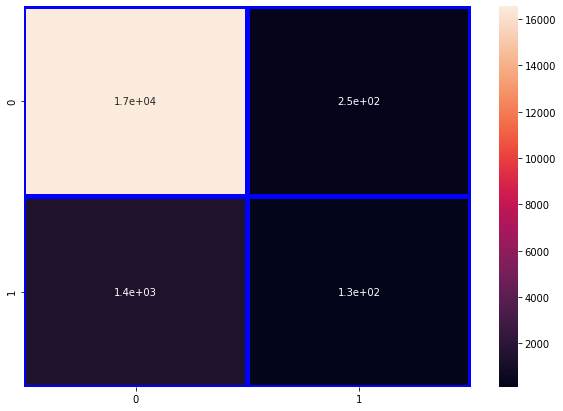

In [226]:
plt.figure(figsize=(10,7))
sns.heatmap(knn_confusion_mat,annot=True,linewidth=3.5,linecolor='blue')
plt.show()

#### 2.a).3. Sensitivity and Specificity:

In [248]:
Sensitivity_KNN=(tp/(tp+fn))
print('Sensitivity of the KNN Model: ')
print('---------------------------------------------','\n')
print(Sensitivity_KNN)
print('\n')
Specificity_KNN=(tn/(tn+fp))
print('Specificity of the KNN Model: ')
print('---------------------------------------------','\n')
print(Specificity_KNN)

Sensitivity of the KNN Model: 
--------------------------------------------- 

0.34195216548157725


Specificity of the KNN Model: 
--------------------------------------------- 

0.9241486068111455


#### 2.a).4. Accuracy Analysis:

In [228]:
print('The Accuracy score of the test data for K-Nearest Neighbors Model : ')
print(accuracy_score(y_test,ypred_knn_test),'\n')
print('The Accuracy score of the train data for K-Nearest Neighbors Model : ')
print(accuracy_score(y_train,ypred_knn_train))

The Accuracy score of the test data for K-Nearest Neighbors Model : 
0.9091751621872104 

The Accuracy score of the train data for K-Nearest Neighbors Model : 
0.9223252010358457


#### 2.a).5. K-Nearest Neighbors Model classification report:

In [229]:
# Computing the classification report:

knn_report=classification_report(y_test,ypred_knn_test)
print('K-Nearest Neighbors Model classification report: ')
print('------------------------------------------------','\n')
print(knn_report)

K-Nearest Neighbors Model classification report: 
------------------------------------------------ 

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     16796
           1       0.34      0.08      0.13      1547

    accuracy                           0.91     18343
   macro avg       0.63      0.53      0.54     18343
weighted avg       0.87      0.91      0.88     18343



#### 2.a).6. ROC Curve for K-Nearest Neighbors Model:

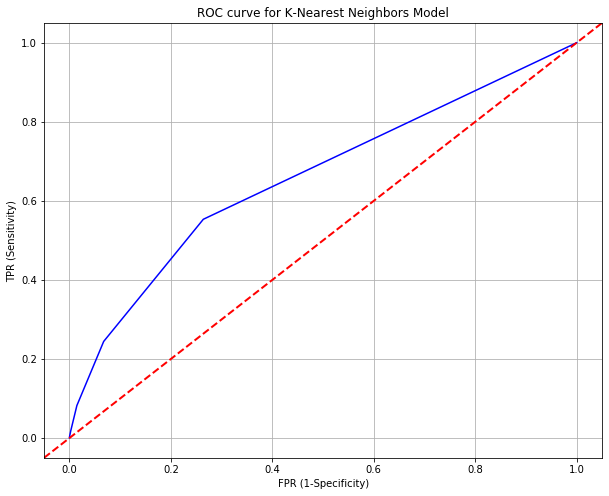

In [230]:
fpr,tpr,th=roc_curve(y_test,ypred_probability_knn)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='blue')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('FPR (1-Specificity)')
plt.ylabel('TPR (Sensitivity)')
plt.title('ROC curve for K-Nearest Neighbors Model')
plt.grid()
plt.plot([-0.05,1.05],[-0.05,1.05],'r--',linewidth=2)
plt.show()

#### 2.a).7. ROC AUC Score:

In [231]:
print('The ROC AUC score of the K-Nearest Neighbors Model ')
print('--------------------------------------------------','\n')
print('ROC AUC : ',roc_auc_score(y_test,ypred_probability_knn))

The ROC AUC score of the K-Nearest Neighbors Model 
-------------------------------------------------- 

ROC AUC :  0.6592765799964995


#### 2.a).8. Cross Entropy:

In [232]:
cross_entropy=log_loss(y_test,ypred_knn_test)
print('The Cross Entropy score of K-Nearest Neighbors Model ')
print('----------------------------------------------------','\n')
print('Cross Entropy : ',cross_entropy)

The Cross Entropy score of K-Nearest Neighbors Model 
---------------------------------------------------- 

Cross Entropy :  3.136989487809466


## 2.b) Inferences for K-Nearest Neighbors Classification Model:

* Cross Entropy for K-Nearest Neighbors Model is 3.13


* ROC AUC Score for the K-Nearest Neighbors Model is 65.92 


* The Model Accuracy for the K-Nearest Neighbors Model is coming out to be around 91%.


* f1 weighted avg for the K-Nearest Neighbors Model is around 91%.


* Specificity : 98%


* Sensitivity : 34.19%

# 3. Decision Tree Classification Model using Scikit-learn:

In [233]:
# Classification Model using sklearn:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_test_dt=dt.predict(X_test)
y_pred_train_dt=dt.predict(X_train)
y_test_prob_dt=dt.predict_proba(X_test)[:,1]

## 3.a) Model Performance Evaluation:


#### 3.a).1. Confusion Matrix for Decision Tree classification:

In [234]:
# Computing the Confusion matrix:

dt_confusion_mat=confusion_matrix(y_test,y_pred_test_dt)
tn = dt_confusion_mat[0,0]
tp = dt_confusion_mat[1,1]
fp = dt_confusion_mat[0,1]
fn = dt_confusion_mat[1,0]
print('Confusion Matrix for Decision Tree Model : ')
print('------------------------------------------------','\n')
print(dt_confusion_mat)

Confusion Matrix for Decision Tree Model : 
------------------------------------------------ 

[[15522  1274]
 [ 1018   529]]


#### 3.a).2. Graphical Representation of Confusion Matrix:

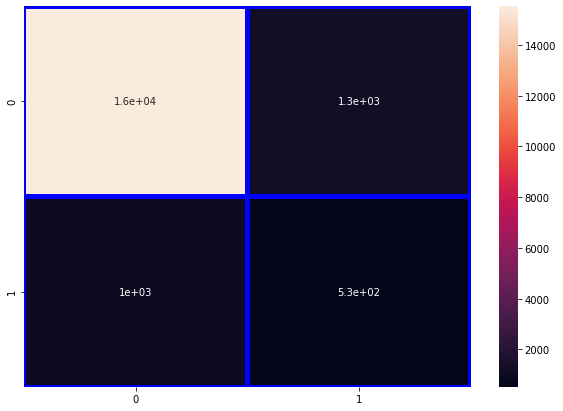

In [235]:
plt.figure(figsize=(10,7))
sns.heatmap(dt_confusion_mat,annot=True,linewidth=3.5,linecolor='blue')
plt.show()

#### 3.a).3. Sensitivity and Specificity:

In [236]:
Sensitivity_Decision_tree=(tp/(tp+fn))
print('Sensitivity of the Decision Tree Model: ')
print('---------------------------------------------','\n')
print(Sensitivity_Decision_tree)
print('\n')
Specificity_Decision_tree=(tn/(tn+fp))
print('Specificity of the Decision Tree Model: ')
print('---------------------------------------------','\n')
print(Specificity_Decision_tree)

Sensitivity of the Decision Tree Model: 
--------------------------------------------- 

0.34195216548157725


Specificity of the Decision Tree Model: 
--------------------------------------------- 

0.9241486068111455


#### 3.a).4. Accuracy Analysis:

In [237]:
print('The Accuracy score of test data for the Decision Tree Model: ')
print(accuracy_score(y_test,y_pred_test_dt),'\n')
print('The Accuracy score of the train data for the Decision Tree Model: ')
print(accuracy_score(y_train,y_pred_train_dt))

The Accuracy score of test data for the Decision Tree Model: 
0.8750477021207 

The Accuracy score of the train data for the Decision Tree Model: 
0.9995093362409704


#### 3.a).5. Decision Tree Model classification report:

In [238]:
# Computing the classification report:

dt_report=classification_report(y_test,y_pred_test_dt)
print('Decision Tree Model classification report: ')
print('-----------------------------------------','\n')
print(dt_report)

Decision Tree Model classification report: 
----------------------------------------- 

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     16796
           1       0.29      0.34      0.32      1547

    accuracy                           0.88     18343
   macro avg       0.62      0.63      0.62     18343
weighted avg       0.88      0.88      0.88     18343



#### 3.a).6. ROC Curve for Decision Tree Model:

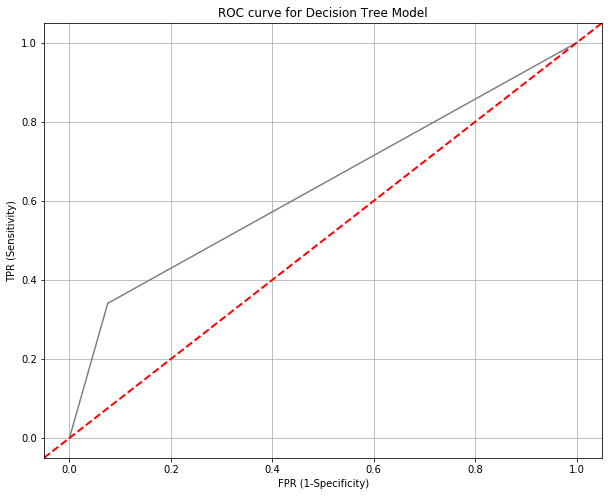

In [239]:
fpr,tpr,th=roc_curve(y_test,y_test_prob_dt)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='grey')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('FPR (1-Specificity)')
plt.ylabel('TPR (Sensitivity)')
plt.title('ROC curve for Decision Tree Model')
plt.grid()
plt.plot([-0.05,1.05],[-0.05,1.05],'r--',linewidth=2)
plt.show()

#### 3.a).7. ROC AUC Score:

In [240]:
print('The ROC AUC score of the Decision Tree Model ')
print('--------------------------------------------------','\n')
print('ROC AUC : ',roc_auc_score(y_test,y_test_prob_dt))

The ROC AUC score of the Decision Tree Model 
-------------------------------------------------- 

ROC AUC :  0.6326194188815543


#### 3.a).7. Cross Entropy:

In [241]:
cross_entropy=log_loss(y_test,y_pred_test_dt)
print('The Cross Entropy score of Decision Tree Model ')
print('----------------------------------------------------','\n')
print('Cross Entropy : ',cross_entropy)

The Cross Entropy score of Decision Tree Model 
---------------------------------------------------- 

Cross Entropy :  4.315755011953408


# 3.b) Inferences for Decision Tree Classification Model:

* The Cross entropy for the Decision Tree model is 4.31


* ROC AUC Score for the Decision Tree Model is 63.26


* The Model Accuracy for the Decision Tree Model is coming out to be around 87%.


* f1 weighted avg for the Decision Tree Model is around 88%.


* Specificity : 92.41%


* Sensitivity : 34.19%

# Tabular representation of derived Inferences:

## Model Comparison:

In [243]:
# Initializing the structure of the table:

columns=['Overall Accuracy Score','Accuracy for train data','Accuracy for test data','Specificity',
         'Sensitivity','f1 score weighted avg','ROC AUC Score','Cross Entropy']
indexes=['Logistic Regresion Model','K-Nearest Neighbors Model','Descision Tree Model']

In [249]:
# Creating a Dataframe for compariosn of Models:
model_data=pd.DataFrame(columns=columns,index=indexes)

# Inserting observed readings to the data fields:
model_data['Overall Accuracy Score']=['91%','91%','88%']
model_data['Accuracy for train data']=['91.29%','92.23%','99.95%']
model_data['Accuracy for test data']=['90.91%','90.91%','87.50%']
model_data['Specificity']=['99.16%','98.53%','92.41%']
model_data['Sensitivity']=['40.07%','34.19%','34.19%']
model_data['f1 score weighted avg']=['88%','88%','88%']
model_data['ROC AUC Score']=[73.32,65.92,63.26]
model_data['Cross Entropy']=[3.06,3.13,4.31]
model_data

Overall Accuracy Score Accuracy for train data  \
Logistic Regresion Model                     91%                  91.29%   
K-Nearest Neighbors Model                    91%                  92.23%   
Descision Tree Model                         88%                  99.95%   

                          Accuracy for test data Specificity Sensitivity  \
Logistic Regresion Model                  90.91%      99.16%      40.07%   
K-Nearest Neighbors Model                 90.91%      98.53%      34.19%   
Descision Tree Model                      87.50%      92.41%      34.19%   

                          f1 score weighted avg  ROC AUC Score  Cross Entropy  
Logistic Regresion Model                    88%          73.32           3.06  
K-Nearest Neighbors Model                   88%          65.92           3.13  
Descision Tree Model                        88%          63.26           4.31

# Inferences based on model comparison:

#### 1. Overall Accuracy Score: 

    1. Logistic Regression Model has the highest overall accuracy of about 91%.

    2. Decision Tree Model yeilds the lowest overall model accuracy of about 88%.

#### 2. Overfitting/Underfitting:

    1. All the classification models exhibit overfitting of the trained data with respect to the test data.

    2. The model accuracy for train data and test data for both Logistic Regression Model and K-Nearest Neighbors Model has very less overfitting.
    
    3. As observed,the model accuracy for train data and test data for the      Decision Tree Model has a considerably high difference in accuracies which can be considered a high overfitting condition in comparison to other models.

#### 3. f1 score weighted avg:

    1. The Logistic Regression Model has the highest weighted harmonic mean between precison and recall of about 88% based on the classification report.
    
    2. Both K-Nearest Neighbors Model and Descision Tree Model have nearly similar weighted harmonic mean between precison and recall of about 88%.
    
    3. We can further look at the recall values of the positive class and negative class to get more insights on the specificity and sensitivity.

#### 4. Sensitivity and Specificity:

    1. Logistic Regression Model :
      * Specificity = 99.16%
      * Sensitivity = 40.07% 
    
    2. K-Nearest Neigbors Model :
      * Specificity = 98.53%
      * Sensitivity = 34.19% 
    
    3. Decision Tree Model :
      * Specificity = 92.41%
      * Sensitivity = 34.19% 

#### 5. ROC AUC Score:

    1. The Logistic Regression Model has the maximum area under the ROC curve with a ROC AUC Score of 73.32.
    
    2. The Decision Tree Model has the minimum area under the ROC curve with a ROC AUC Score of 63.26.

#### 6. Cross Entropy:

    1. Minimum Cross Entropy score for Logistic Regression model : 
    H_logistic(y) = 3.06
    
    2. Maximum Cross Entropy score for Decision Tree Model : 
    H_Decisiontree(y) = 4.31